In [2]:
using LinearAlgebra, Plots
using Dates
import Dates: DateTime
using Test
using Random
import Convex as cvx 
import ECOS 
import SCS
import Mosek
using ProgressMeter
using JuMP
using Statistics
using MosekTools
using Distributions
using Noise
using CSV
using DataFrames
using ScenTrees
using LaTeXStrings

In [3]:

TB_MPC = [1155.00003696,1154.9997113426346,1154.999386324335,1154.9990616375233,1154.998735915587,1154.998410829411,1154.9980870757297,1154.997762600194,1154.997437337101,1154.9971105713305,1154.9967871663066,1154.9964618068648,1154.9961375031685,1154.995812860022,1154.9954881449478,1154.995163367057,1154.994838548068,1154.9945137019452,1154.994188491258,1154.9938640342596,1154.9935405462772,1154.9932160410647,1154.9928912627056,1154.9925655775614,1154.992239946382,1154.9919144853163,1154.9915773134792,1154.9912400431278,1154.9909038858927,1154.9905669410552,1154.9902297601977,1154.98989246825,1154.9895550362749,1154.9892176819126,1154.988880266669,1154.9885427614324,1154.988205320936,1154.9878666615466,1154.9875312211648,1154.9871936798481,1154.986854910558,1154.9865171777708,1154.9861781511368,1154.98584026045,1154.9855023214784,1154.9851643417198,1154.9848263174158,1154.9844882528382,1154.98415016986,1154.9838127781013,1154.9834743069302,1154.9831359858217,1154.9827965242546,1154.9824587943801,1154.9821208047924,1154.9817817936873,1154.9814434294346,1154.9811049572754,1154.9807667163118,1154.9804277316778,1154.9800893586964,1154.9797504547375,1154.979411662437,1154.9790732159402,1154.9787343595121,1154.9783947540877,1154.9780552995078,1154.977715455348,1154.9773754871671,1154.977035646523,1154.9766962882738,1154.9763569304614,1154.9760179527138,1154.9756786242633,1154.975339230904,1154.9750002803023,1154.974661933019,1154.9743219515963,1154.9739819980239,1154.9736420277238,1154.973301897315,1154.9729617257303,1154.972621426782,1154.9722812380983,1154.9719410097377,1154.9716007582172,1154.9712603873209,1154.9709199821707,1154.9705797140293,1154.9702395750205,1154.9698997973262,1154.9695602730374,1154.9692218294156,1154.9688832920529,1154.968544742595,1154.968206528844,1154.9678663503869,1154.9675257823956,1154.9671851116857,1154.9668444680638,1154.9665048538166,1154.9661664735945,1154.9658256084324,1154.9654843465416,1154.9651433512793,1154.964802660717,1154.9644635071368,1154.9641220821507,1154.963781017225,1154.9634398156227,1154.96309889865,1154.9627581540335,1154.9624166412223,1154.9620755179858,1154.9617356585723,1154.9613953178548,1154.9610537550554,1154.9607122191362,1154.9603712691742,1154.960031372985,1154.9596914670794,1154.9593516128523,1154.9590106125956,1154.958669898575,1154.9583286912462,1154.9579872481506,1154.9576462416023,1154.957305410201,1154.9569633432614,1154.9566231605352,1154.9562811263174,1154.9559404028855,1154.955599176034,1154.9552581899363,1154.954917036477,1154.9545761933452,1154.954235336962,1154.9538943633333,1154.9535531250751,1154.9532117716192,1154.9528701743182,1154.9525278578503,1154.9521857550656,1154.9518429983486,1154.9515001996588,1154.9511574984356,1154.9508157596604,1154.9504742749832,1154.9501313610835,1154.9497900366257,1154.949448822983,1154.9491068129093,1154.9487637223142,1154.9484213224657,1154.9480781418952,1154.947734985446,1154.9473925500963,1154.9470496169765,1154.9467064081737,1154.9463631215478,1154.9460193843129,1154.9456759773636,1154.9453323441992,1154.9449887061478,1154.9446462205221,1154.9443044684122,1154.9439628796688,1154.9436187415492,1154.9432751372292,1154.9429315377322,1154.9425878414297,1154.9422440117544,1154.9419000402563,1154.9415579458944,1154.9412156489439,1154.9408715880015,1154.9405273983618,1154.9401839774205,1154.9398397483183,1154.9394953945894,1154.939150751164,1154.938806149522,1154.9384617545713,1154.938117234882,1154.9377751338775,1154.937431737467,1154.937088318163,1154.9367445049022,1154.936400289167,1154.9360560373045,1154.9357120170816,1154.9353677414254,1154.9350234567876,1154.9346792217634,1154.934335549367,1154.9339917441962,1154.9336474769393,1154.933302562961,1154.9329581749864,1154.932614021197,1154.9322700984158,1154.931925248051,1154.931581198386,1154.9312366220404,1154.9308939466325,1154.9305503997005,1154.930207091435,1154.9298629122586,1154.9295190475207,1154.9291745055014,1154.9288326058315,1154.9284882889954,1154.9281443528848,1154.9277997028857,1154.927455680064,1154.9271112157833,1154.9267668542025,1154.9264224393082,1154.9260781783353,1154.9257363648758,1154.925392096672,1154.9250477802675,1154.9247039318043,1154.9243587587684,1154.9240138477608,1154.9236687692953,1154.9233237542653,1154.9229808962223,1154.922635039199,1154.922289249204,1154.9219432031073,1154.9215977149477,1154.9212504004126,1154.9209034769085,1154.9205573340535,1154.920210080452,1154.9198623326859,1154.919514690857,1154.9191681649152,1154.9188218230724,1154.9184775558444,1154.918130229161,1154.9177831078064,1154.9174361593496,1154.9170890914543,1154.9167422646462,1154.9163956245166,1154.91604940248,1154.9157025377244,1154.915355373534,1154.9150088168876,1154.914663619652,1154.9143176624095,1154.9139700550547,1154.9136223622438,1154.9132754675165,1154.9129294135807,1154.9125818993382,1154.9122354779493,1154.9118884748987,1154.9115399265545,1154.9111933707252,1154.910847098781,1154.9105000990276,1154.910150977771,1154.9098018668358,1154.909453395077,1154.9091052598792,1154.9087568703148,1154.9084087769265,1154.9080599634522,1154.9077116924177,1154.907362364558,1154.9070151433687,1154.9066679495904,1154.9063198316042,1154.9059724570832,1154.9056245791458,1154.9052766613977,1154.9049298763828,1154.904582401952,1154.904234920036,1154.9038872952253,1154.9035399326176,1154.9031926295352,1154.9028453505762,1154.9024976211006,1154.902149886797,1154.9018011904554,1154.9014516848536,1154.901102142696,1154.9007535111527,1154.900405030696,1154.9000562780245,1154.8997072370912,1154.8993588475466,1154.899012583361,1154.8986640514397,1154.898314766208,1154.897965672293,1154.897617396532,1154.8972679164672,1154.896919618199,1154.8965708938729,1154.8962224216052,1154.895873722399,1154.8955254462805,1154.8951763766393,1154.894828043331,1154.8944789183852,1154.8941296426353,1154.893780257631,1154.8934314183882,1154.8930829582562,1154.8927349641929,1154.8923863385567,1154.8920383282186,1154.8916897262693,1154.8913400126849,1154.8909910141383,1154.8906420139556,1154.8902921613837,1154.8899439326617,1154.8895944864012,1154.8892439322824,1154.8888940468428,1154.8885449921677,1154.888195571501,1154.8878474842993,1154.8874999566829,1154.8871506811815,1154.8868013621116,1154.8864537939196,1154.8861059660699,1154.8857581089935,1154.8854094906194,1154.8850605927198,1154.8847093979502,1154.8843599397724,1154.8840100527698,1154.8836598039038,1154.883309556753,1154.8829592764089,1154.8826089313593,1154.8822570753011,1154.8819062896475,1154.8815562725024,1154.8812062864765,1154.8808552155256,1154.8805044743654,1154.880153995188,1154.8798034832112,1154.8794530338366,1154.8791026099702,1154.8787521237684,1154.8784014204987,1154.878051601323,1154.8777009055661,1154.8773502573222,1154.8769994342574,1154.8766487136286,1154.876297718321,1154.8759466036913,1154.8755956550335,1154.8752448205248,1154.8748939877337,1154.874542889811,1154.8741913401295,1154.8738396668227,1154.873488029322,1154.8731370129692,1154.8727854323063,1154.8724338792215,1154.872082177315,1154.8717308584662,1154.871379491819,1154.8710280850682,1154.8706766347277,1154.8703251397292,1154.8699736015005,1154.8696220044137,1154.8692725588605,1154.8689222208607,1154.8685715059949,1154.8682214865494,1154.8678696814961,1154.8675177139603,1154.8671655380952,1154.8668136892475,1154.8664617395905,1154.8661088960484,1154.865755734561,1154.8654039286757,1154.8650516558896,1154.864698662791,1154.864346387147,1154.863993850238,1154.8636416826766,1154.8632884138606,1154.8629357171064,1154.8625824930332,1154.8622301159576,1154.8618777377737,1154.8615252664604,1154.8611718315585,1154.8608183570086,1154.860464841085,1154.8601114393493,1154.85975777439,1154.9224696583706,1154.9840676015165,1155.0451413321982,1155.1071515464885,1155.1734378521573,1155.2506299067338,1155.3497627768943,1155.4854778477159,1155.6716362945467,1155.913939447943,1156.2037865545863,1156.518346425629,1156.8274636035414,1157.1033768873415,1157.3283511697734,1157.4975019674653,1157.616821451535,1157.6983587260545,1157.7551432489843,1157.797788438697,1157.833336632586,1157.8657113487202,1157.8967789348867,1157.9273044142706,1157.9614036910216,1157.9953369811547,1158.0291879181366,1158.0632178741835,1158.0981471258694,1158.1357021535591,1158.179434404561,1158.2355044358735,1158.3126468862047,1158.4203090646413,1158.5646821126895,1158.7441444514207,1158.9471250435313,1159.1545676557746,1159.3461446247416,1159.506832213408,1159.6305499563107,1159.719743120208,1159.7820982957599,1159.826626874136,1159.860901818295,1159.8900212252793,1159.9168472920192,1159.9427465240567,1160.1034870082194,1160.2610785808224,1160.4157042783715,1160.56752922818,1160.7167158331574,1160.863453186678,1161.008036138307,1161.151048068727,1161.2937088900965,1161.4383849513517,1161.5890636972074,1161.7513170449256,1161.93115736881,1162.1326212031388,1162.3549295083628,1162.5909790946075,1162.8286229023665,1163.0545196012476,1163.2585638150902,1163.436573153422,1163.5901885719336,1163.7246719394118,1163.8461916794136,1163.9599108120328,1163.9598245715176,1163.9597383303756,1163.9596520887071,1163.9595658465137,1163.9594796037936,1163.9593933605388,1163.9593071167258,1163.9592208723052,1163.9591346271907,1163.95904838126,1163.9589621343798,1163.9588758864527,1163.95878963746,1163.958703387465,1163.958617136575,1163.9585308848932,1163.958444632496,1163.958358379431,1163.9582721257257,1163.958185871397,1163.9580996164545,1163.9580133609045,1163.9579271047498,1163.9578408479942,1163.957754590639,1163.9576683326854,1163.9575820741022,1163.9574958148892,1163.9574095550458,1163.9573232945713,1163.957237033463,1163.9571507717158,1163.957064509322,1163.956978246271,1163.956891982554,1163.9568057181689,1163.9567194531235,1163.9566331874335,1163.956546921115,1163.9564606541778,1163.9563743866245,1163.956288118453,1163.9562018496592,1163.95611558024,1163.9560293101938,1163.9559430395193,1163.9558567682159,1163.9557704962838,1163.9556842237225,1163.9555979505326,1163.9555116767137,1163.9554254022662,1163.9553391271897,1163.955252851486,1163.955166575157,1163.955080298206,1163.9549940206398,1163.954907742468,1163.9548214637043,1163.954735184365,1163.9546489044671,1163.9545626240215,1163.9544763430297,1163.954390061481,1163.954303779358,1163.9542174966418,1163.954131213316,1163.9540449293702,1163.953958644798,1163.9538723595958,1163.9537860737626,1163.9536997872979,1163.9536135002013,1163.9535272124729,1163.9534409241094,1163.9533546351113,1163.9532683454793,1163.9531820552154,1163.9530957643237,1163.9530094728123,1163.9529231806946,1163.9528368879892,1163.952750594721,1163.952664300915,1163.9525780065928,1163.9524917117633,1163.9524054164215,1163.9523191205476,1163.952232824115,1163.9521465270966,1163.9520602294701,1163.9519739312213,1163.9518876323418,1163.9518013328272,1163.9517150326758,1163.9516287318866,1163.9515424304595,1163.951456128395,1163.9513698256671,1163.951283522305,1163.951197218331,1163.9511109135115,1163.9510246061054,1163.9509382968233,1163.9508519877836,1163.9507656545636,1163.9506793243486,1163.95059299317,1163.9505066601646,1163.950420308303,1163.9503339639025,1163.9502476335306,1163.950161281028,1163.950074928827,1163.949988572314,1163.949902228203,1163.9498158750487,1163.9497295273754,1163.9496431769342,1163.949556826465,1163.9632035881023,1163.9768347779811,1163.9904504084138,1164.0040505490238,1164.0176353544744,1164.0312054290798,1164.044763453978,1164.0583204923134,1164.0719170236669,1164.0856828381534,1164.099980491942,1164.1156868834214,1164.1346224200963,1164.159985289909,1164.1964085763686,1164.2491249892187,1164.322014134957,1164.4151267028162,1164.523120068628,1164.6359791250986,1164.7420940039447,1164.8321476982292,1164.9017315581425,1164.950990730361,1165.0871412352399,1165.220287600021,1165.3512919815314,1165.480212322077,1165.6071035860232,1165.732018515424,1165.8550095283783,1165.9761345746347,1166.0954751357524,1166.2131859664657,1166.3296124856558,1166.445393425228,1166.5619698639555,1166.6819514003955,1166.8090914028858,1166.9475720461635,1167.100404008303,1167.2674553837112,1167.4442286884007,1167.6225228285978,1167.793871579782,1167.9511375090551,1168.0909344204683,1168.2140303532524,1168.2436667246116,1168.2780619346038,1168.3206736892107,1168.3754202923383,1168.4452391795633,1168.5302418796373,1168.6265122237517,1168.7265819158356,1168.821692403656,1168.9047338623295,1168.9722809891393,1169.024818044323,1169.0654360730564,1169.098037436473,1169.1259935559974,1169.1516034302258,1169.1761664512921,1169.2003055696746,1169.2242774458139,1169.2481737423336,1169.272023046821,1169.2958332405274,1169.3196063220216,1169.3433428353471,1169.3266127043412,1169.3098690445381,1169.2931118200613,1169.2763409948755,1169.2595565327822,1169.2427583974215,1169.2259465522695,1169.2091209606385,1169.1922815856742,1169.1754283903567,1169.1585613374978,1169.1416803897405,1169.1247855095583,1169.1078766592539,1169.090953800957,1169.074016896626,1169.0570659080436,1169.0401007968173,1169.0231215243787,1169.0061280519815,1168.9891203407003,1168.9720983519596,1168.9550620454152,1168.938011382608,1168.9209463229254,1168.9038668276103,1168.8867728554417,1168.869664366809,1168.8525413213144,1168.8354036783703,1168.8182513971985,1168.8010844368284,1168.7839027560963,1168.7667063136432,1168.749495068616,1168.7322689786095,1168.7150280014223,1168.697772094565,1168.680501216229,1168.6632153238604,1168.645914374701,1168.6285983257876,1168.61126713395,1168.5939207565186,1168.576559149061,1168.5591822678716,1168.5417900690045,1168.5243825082252,1168.5069595410996,1168.4895211229702,1168.4720672089613,1168.4545977539783,1168.4371127127083,1168.4196120396048,1168.4020956889021,1168.3845636146045,1168.3670157704412,1168.349452110024,1168.3318725866764,1168.314277153432,1168.2966657634008,1168.2790383689203,1168.2613949216973,1168.2437353755513,1168.2260596814006,1168.2083677909736,1168.1906596556046,1168.1729352264638,1168.155194454477,1168.137437290367,1168.1196636846053,1168.101873587363,1168.1373206571045,1168.1696088861406,1168.1936497269096,1168.2069139164569,1168.2096418592726,1168.2039533344168,1168.1925806897987,1168.1779061583097,1168.161563653065,1168.1444807045355,1168.127103574487,1168.1096166507127,1168.0920858857644,1168.0745317965736,1168.0569599359535,1168.039371592507,1168.0217669981812,1168.004146156093,1167.9865090253204,1167.968855557781,1167.9511857040395,1167.9334994143126,1167.9157966385078,1167.8980773262679,1167.8800786749255,1167.862062839653,1167.8440297667962,1167.8259794023418,1167.8079116920717,1167.7898265814672,1167.771724015681,1167.7536039396366,1167.7354662979112,1167.7173110347674,1167.6991380943186,1167.680947420212,1167.6627389558587,1167.648817066141,1167.6414047895867,1167.637208320539,1167.6351028634685,1167.6341349508484,1167.6338936803863,1167.6338277472366,1167.6337618134805,1167.6336958874112,1167.6336299669117,1167.633564046743,1167.6337650314968,1167.6339660136673,1167.634166993247,1167.634367970227,1167.6345689445993,1167.6347699164605,1167.6349708869282,1167.6351718644273,1167.6353729018094,1167.6355742871353,1167.6357773971245,1167.63598800684,1167.6362273476225,1167.6365636452408,1167.637187796636,1167.6385623080218,1167.641649355173,1167.6481443187463,1167.66051550583,1167.6815782741066,1167.7134762800652,1167.7563615950428,1167.8075119582631,1167.861631941236,1167.861566963192,1167.8615019848692,1167.8614370062623,1167.8613720273665,1167.8613070481708,1167.8612420686495,1167.8611770887524,1167.8611121083943,1167.8610471274505,1167.8609821457708,1167.8609171632081,1167.8608521796637,1167.860787195117,1167.8607222096357,1167.860657223352,1167.8605922364266,1167.8605272489935,1167.8604622611533,1167.86039727297,1167.8603322844792,1167.860267295698,1167.8602023066326,1167.8601373172858,1167.8600723276586,1167.8600073377509,1167.8599423475666,1167.8598773571173,1167.8598123664015,1167.8597473754137,1167.8596823841435,1167.8596173925696,1167.8595524006548,1167.8594874083462,1167.85942241558,1167.8593574222944,1167.8592924284471,1167.8592274340303,1167.859162439071,1167.8590974436238,1167.8590324477525,1167.858967451516,1167.8589024549585,1167.8588374581088,1167.8587724609827,1167.8587074635873,1167.8586424659259,1167.858577468,1167.8585124698095,1167.8620891511016,1167.868193564316,1167.8774569152274,1167.8899372609485,1167.9048574234532,1167.9206821509904,1167.9355734445444,1167.9480081794427,1167.9572250644503,1167.96329299431,1167.9668461388874,1167.9687032722104,1167.9695780556049,1167.9699594885608,1167.9701248127067,1167.9702072413215,1167.9702617489254,1167.9703079819462,1167.970352054052,1167.9703956282465,1167.9704391010673,1167.970482555575,1167.9705260070787,1167.9705694580641,1167.9705373528607,1167.9705052504937,1167.970473166269,1167.9704411832456,1167.9704096979542,1167.9703803733769,1167.9703593231015,1167.9703661932017,1167.9704559561665,1167.9707618124626,1167.9715609307955,1167.973341970706,1167.9768173467553,1167.982802318019,1167.9919236361593,1168.0042390655635,1168.018977133295,1168.0346136576343,1168.0493237526207,1168.061595044302,1168.0706715149481,1168.0766214485693,1168.0800744419143,1168.0818434330897,1168.088009344114,1168.0972908722504,1168.1097453445614,1168.1246063225424,1168.1403596274276,1168.1551923637107,1168.1676021063156,1168.1768378395257,1168.1829674562232,1168.186616478211,1168.1885925472739,1168.1895996266305,1168.1901200685043,1168.1904273432885,1168.1906528507348,1168.1908508162896,1168.1910406184031,1168.1912282872293,1168.1914154629935,1168.191602536768,1168.1917895904523,1168.191976639132,1168.1921636852535,1168.192350729166,1168.1922870884505,1168.1922234474864,1168.192159806271,1168.1920961648045,1168.1920325230874,1168.1919688811222,1168.1919052389153,1168.1918415964813,1168.1917779538473,1168.1917143110575,1168.1916506681698,1168.191587025246,1168.191523382333,1168.191459739448,1168.1913960965726,1168.1913324536386,1168.1912688105822,1168.191205167354,1168.191141523919,1168.1910778802553,1168.1910142363504,1168.1909505921988,1168.1908869477975,1168.1908233031454,1168.190759658242,1168.1906960130898,1168.1906323676849,1168.1905687220276,1168.1905050761175,1168.1904414299554,1168.190377783543,1168.1903141368844,1168.1902504899883,1168.1901868428688,1168.1901231955435,1168.1900595480292,1168.189995900333,1168.1899322524498,1168.1898686043626,1168.1898049560525,1168.1897413075044,1168.1896776587103,1168.189614009666,1168.189550360371,1168.1894867108251,1168.1894230610283,1168.1893594109804,1168.1892957606815,1168.1892321101318,1168.1891684593309,1168.1891048082791,1168.1890411569764,1168.1889775054224,1168.1889138536176,1168.1888502015618,1168.188786549255,1168.188722896697,1168.1886592438877,1168.188595590826,1168.18853193751,1168.188468283935,1168.1884046300952,1168.1883409759844,1168.1882773215998,1168.1882136669428,1168.188150012018,1168.188086356831,1168.1880227013862,1168.1879590456863,1168.1878953897333,1168.187831733528,1168.1877680770701,1168.187789638777,1168.187811510139,1168.187834903844,1168.1878649056757,1168.1879202122707,1168.1880609048458,1168.1884550951702,1168.1895100985664,1168.1920733264215,1168.1976381412098,1168.208379389058,1168.2267794666886,1168.254732407689,1168.2923811710634,1168.3373362785105,1168.3849345342205,1168.4296356726015,1168.4668834109145,1168.49442829053,1168.512508717048,1168.5230446893029,1168.5284977475153,1168.5310082529988,1168.5320413220713,1168.5319789821947,1168.5319166420832,1168.5318543017452,1168.5317919611798,1168.531729620388,1168.5316672793692,1168.5316049381238,1168.5315425966503,1168.5314802549435,1168.5314179129946,1168.531355570787,1168.5312932282968,1168.5312308854968,1168.5311685423587,1168.5311061988652,1168.5310438550152,1168.5309815108285,1168.5309191663353,1168.5308568215678,1168.5307944765514,1168.5307321313019,1168.5306697858275,1168.5306074401317,1168.530545094216,1168.5870781394362,1168.6584872630176,1168.7446464469003,1168.8413926393455,1168.9411767728348,1169.035009236375,1169.1026609047244,1169.1551217085305,1169.1928274024424,1169.218800779533,1169.2368813141338,1169.250395320208,1169.2616152057963,1169.271827151294,1169.2816484733562,1169.2913337136913,1169.3009737790833,1169.3105969478295,1169.320210916493,1169.329817529065,1169.3394171818509,1169.3490099584383,1169.3585958832336,1169.3681749707857,1169.3514648744847,1169.3347413023953,1169.318004218878,1169.3012535881346,1169.2844893742072,1169.267711540976,1169.2509200521604,1169.2341148713163,1169.217295961835,1169.2004632869437,1169.1836168097032,1169.166756493007,1169.14988229958,1169.1329941919787,1169.1160921325884,1169.0991760836237,1169.0822460071258,1169.0653018649625,1169.0483436188272,1169.0313712302373,1169.014384660532,1168.997383870874,1168.9927262765025,1168.9880919945922,1168.9834821484346,1168.9788931026314,1168.9743279475313,1168.9697934450005,1168.9653058276735,1168.9609032870192,1168.9566685011805,1168.9527623037222,1168.9494627547294,1168.9466901736203,1168.9442387810302,1168.9421815576504,1168.9403801712124,1168.938803885369,1168.937417769637,1168.9361761357775,1168.9350022623369,1168.933860986368,1168.9327376323633,1168.9316244216084,1168.9305174236295,1168.92941491918,1168.9283162644178,1168.9272212699245,1168.926129895585,1168.9250399108885,1168.923951506435,1168.9228652559716,1168.9217826434203,1168.920707081213,1168.9196446833112,1168.9186022971019,1168.9175937896114,1168.9166344819496,1168.915731672678,1168.9148968811548,1168.9141318893983,1168.9134199769271,1168.9127443248876,1168.9120951160382,1168.9114634165924,1168.910842319537,1168.9102274526042,1168.9096161273114,1168.909006670223,1168.9083983411151,1168.9077908605652,1168.9071841379148,1168.9065781505874,1168.905973410732,1168.9053699959488,1168.9047681078566,1168.9041682820011,1168.9035717228958,1168.9029808491966,1168.9023998578875,1168.9018350151844,1168.9012941077362,1168.9007734146626,1168.900269089139,1168.8997788712504,1168.8992987566314,1168.8988249176182,1168.8983542001595,1168.897884923447,1168.897416732912,1168.8969500630828,1168.8964854755454,1168.8960228513668,1168.8955616959554,1168.8951018326184,1168.894643194984,1168.8941857799184,1168.8937306101552,1168.8932777317345,1168.8928272588803,1168.8923794644993,1168.8919349587509,1168.891494955384,1168.8910615639084,1168.8906378902589,1168.8902222173367,1168.8898080354636,1168.8893927089357,1168.888973144555,1168.8885467113266,1168.8881123009053,1168.8876704269228,1168.8872230356335,1168.8867726419699,1168.886321608948,1168.8858717248243,1168.8854240909552,1168.884978761553,1168.8845356565116,1168.8840947563722,1168.8836560625214,1168.8832188022827,1168.8827830175453,1168.882348815882,1168.881916464499,1168.8814865662291,1168.8810603201161,1168.8806398075956,1168.8802281302867,1168.8798197248354,1168.8794122418706,1168.8790030428138,1168.8785890139222,1168.8781676281749,1168.8777376908295,1168.8772997648443,1168.8768557905278,1168.8764082921664,1168.8759596175603,1168.8755115710103,1168.8750652574347,1168.8746204678214,1168.8741771207983,1168.8737351903767,1168.8732946753391,1168.8728550266644,1168.8724162812036,1168.8719785431879,1168.8715420755568,1168.8711074781515,1168.8706759478225,1168.8702495612604,1168.8698314201422,1168.8694249351631,1168.8690198399743,1168.8686133174415,1168.8682022959215,1168.8677842097602,1168.867357922433,1168.8669239679198,1168.8664842820697,1168.866041388323,1168.8655976533169,1168.8651548489083,1168.864713260397,1168.8642726498279,1168.8638329343805,1168.8633940708235,1168.8911988719947,1168.9187834148167,1168.9461486710356,1168.9733025144571,1169.0002731765032,1169.011485906172,1169.0230781513212,1169.0356733449864,1169.050567094695,1169.0700393509346,1169.0974034386024,1169.1364267815666,1169.1899559524306,1169.2581459836913,1169.3372922499618,1169.4202621465454,1169.4986474986636,1169.5655872523732,1169.617741457064,1169.6555299244976,1169.6818936692969,1169.7005706262353,1169.71479975922,1169.7267939198343,1169.710367195746,1169.6939277304878,1169.677475491633,1169.661010446615,1169.644532562727,1169.6280418071217,1169.6115381468098,1169.59502154866,1169.5784919793969,1169.561949405601,1169.5453937937075,1169.528825110006,1169.5122433206384,1169.4956483915992,1169.479040288734,1169.4624189777387,1169.4457844241583,1169.4291365933868,1169.412475450665,1169.3958009610803,1169.3791130895665,1169.3624118009018,1169.3456970597067,1169.3289688304465,1169.3122270774263,1169.2954717647938,1169.2787028565342,1169.2619203164734,1169.2451241082738,1169.2283141954351,1169.2114905412918,1169.1946531090143,1169.177801861605,1169.1609367619,1169.1440577725662,1169.127164856101,1169.1102579748308,1169.0933370909104,1169.0764021663217,1169.0594531628726,1169.0424900421954,1169.025512765746,1169.0085212948038,1168.9915155904682,1168.9900513305054,1168.988592926138,1168.9871402730948,1168.9856920090133,1169.0093724397684,1169.0174802972558,1169.025585281632,1169.0336951922623,1169.0418386623908,1169.050107631404,1169.0587591768513,1169.0684157238372,1169.0803711279616,1169.0969029349262,1169.1213221998805,1169.1573958241286,1169.2079734363165,1169.27321740615,1169.3494331306056,1169.4294971238553,1169.5050058354961,1169.569096943124,1169.6184247476874,1169.6534017988304,1169.676962967554,1169.6928423440143,1169.704277153815,1169.7134797985782,1169.6970427492965,1169.680592932571,1169.664130315862,1169.6476548664891,1169.631166551632,1169.6146653383285,1169.5981511934735,1169.5816240838196,1169.5650839759746,1169.5485308364011,1169.5319646314165,1169.5153853271906,1169.498792889746,1169.4821872849566,1169.4655684785466,1169.44893643609,1169.4322911230088,1169.4156325045733,1169.3989605459003,1169.3822752119524,1169.3655764675373,1169.348864277306,1169.3321386057523,1169.3153994172128,1169.2986466758641,1169.2818803457233,1169.2651003906456,1169.248306774325,1169.2314994602918,1169.2146784119125,1169.1978435923875,1169.1809949647522,1169.1641324918737,1169.1472561364512,1169.1303658610143,1169.1134616279219,1169.0965433993615,1169.0796111373475,1169.062664803721,1169.0457043601477,1169.028729768117,1169.011740988942,1168.994737983756,1168.9934444473463,1168.99216634329,1168.990901258048,1168.9896486624423,1168.988408811735,1168.987182362793,1168.9859604191045,1168.9847438806312,1168.9835349634604,1168.9823393889951,1168.9811710316205,1168.980031259913,1168.9789099531229,1168.977820093334,1168.976772258206,1168.9757699354,1168.974810541442,1168.9738876930687,1168.9729936554065,1168.972123944873,1168.97126983052,1168.9704208517674,1168.9695762668478,1168.9687352124672,1168.967895931711,1168.9670576863305,1168.9662198855249,1168.9653825126518,1168.96454552464,1168.9637089123034,1168.9628742485563,1168.9620415761003,1168.9612110088453,1168.9603828130203,1168.959557610524,1168.9587366220644,1168.9579219649625,1168.9571167999102,1168.9563251020663,1168.9555509847326,1168.9547976700694,1168.954066473948,1168.953356345472,1168.952650877686,1168.9519477520125,1168.9512468569794,1168.9505489618261,1168.949854948087,1168.9491637538133,1168.9484748335874,1168.9477879488268,1168.9471030094544,1168.9464199981383,1168.945738914261,1168.9450591957018,1168.9443808850485,1168.9437040877744,1168.9430290750036,1168.9423564565884,1168.9416874417848,1168.9410241329592,1168.94036965836,1168.9397279763784,1168.9391031742505,1168.938498447852,1168.937915073438,1168.9373360350544,1168.9367588277294,1168.9361825933624,1168.9356072971243,1168.935033711162,1168.93446272619,1168.9338939967279,1168.933326982051,1168.9327614304202,1168.9321972481393,1168.9316344235617,1168.9310729560177,1168.9305123899019,1168.929952765495,1168.9293941899768,1168.9288369298777,1168.928281587827,1168.9277293736852,1168.927182383135,1168.9266437532942,1168.926117436067,1168.9256075220242,1168.9251171868345,1168.9246357029142,1168.9241568952307,1168.9236787037728,1168.92320039144,1168.9227220410244,1168.9222443713568,1168.9217681935847,1168.921293823476,1168.9208207258707,1168.92034862394,1168.919877434273,1168.919407142483,1168.918937744478,1168.9184688939463,1168.9180006289469,1168.9175330515754,1168.917066427532,1168.916601356744,1168.9161390655568,1168.915681614766,1168.9152150639397,1168.9147264804901,1168.914201729477,1168.9136254990958,1168.912985400025,1168.912275874904,1168.9114994557901,1168.9106669141768,1168.9097931986767,1168.9088933076002,1168.9079799101762,1168.9070614392842,1168.906142920891,1168.9052250189138,1168.904307641479,1168.9033907460937,1168.9024743506368,1168.901558219508,1168.9006423772819,1168.899726932606,1168.8988121406985,1168.8978985938186,1168.8969874780323,1168.8960808734464,1168.8951818613311,1168.8942752271175,1168.8933444928823,1168.8923779894517,1168.891365858935,1168.890303165951,1168.8891916133932,1168.8880389147487,1168.886856229109,1168.8856552222471,1168.8844452793546,1168.8832331448507,1168.8820215674925,1168.8808103435047,1168.879599360269,1168.878388593656,1168.8771780347806,1168.8759675929682,1168.8747573056585,1168.873547272447,1168.8723377548993,1168.8711293531835,1168.8699232643264,1168.8687215766724,1168.8675274100358,1168.8663447048525,1168.86517149457,1168.8639784211423,1168.8627582577367,1168.861506935276,1168.8602250546091,1168.8589174645274,1168.8575916782047,1168.8562556049462,1168.8549158737576,1168.8535771569298,1168.8522389125583,1168.8509008938806,1168.8495630060888,1168.8482252154458,1168.8468875184471,1168.8455498923286,1168.844212375609,1168.8428750694504,1168.841538234638,1168.8402024740014,1168.8388689975218,1168.8375398959276,1168.8362182865171,1168.8349081098806,1168.833613447539,1168.8323374744139,1168.8310546325229,1168.8297516915231,1168.8284284629754,1168.8270885101908,1168.8257374175969,1168.8243813042575,1168.8230253762406,1168.821670474155,1168.8203159797683,1168.8189616715465,1168.8176074500134,1168.8162532974773,1168.8148992063082,1168.813545186787,1168.8121912737408,1168.8108375681572,1168.8094843336876,1168.8081321778818,1168.8067823085635,1168.8054368335079,1168.8040989074773,1168.8027725085285,1168.8014617584074,1168.8001698540036,1168.7988980843527,1168.7976454330028,1168.7964040908942,1168.7951589769511,1168.793911974559,1168.7926656222674,1168.791421402613,1168.7901782100255,1168.7889354878032,1168.7876929750507,1168.7864505795715,1168.7852082700108,1168.7839660385896,1168.7827239351177,1168.7814819931532,1168.7802403179746,1168.778999173676,1168.7777591692877,1168.7765215271484,1168.7752883747082,1168.7740628782967,1168.77284906699,1168.7716510840041,1168.7704721718662,1168.7693135814457,1168.7681743503292,1168.7670323992354,1168.7658860331815,1168.764737366216,1168.7635888789491,1168.7624425880779,1168.7612973819673,1168.76015268633,1168.7590082570662,1168.7578639997237,1168.7567198839654,1168.7555758996718,1168.7544320674326,1168.7532884352377,1168.7521451017483,1168.7510023349653,1168.7498607471273,1168.7487215657475,1168.7475869140148,1168.7464599783184,1168.7453447787743,1168.744245439469,1168.7431651042593,1168.742105073948,1168.741059345049,1168.7400086802807,1168.73895349809,1168.7378955835582,1168.7368376228383,1168.7357818520502,1168.7347271940557,1168.7336730821016,1168.7326192672863,1168.731565655308,1168.7305122124146,1168.7295644166477,1168.7286188574583,1168.7276791858098,1168.7267587369738,1168.7259000037573,1168.7252211137968,1168.7250068442177,1168.7258470648162,1168.728777179221,1168.7352992388296,1168.7471198018768,1168.765529247237,1168.7906000912633,1168.82065045115,1168.8524262790017,1168.8820721981278,1168.9063897156868,1168.923709103632,1168.9342486631494,1168.9394059712226,1168.940947477778,1168.9403939255326,1168.9387815585594,1168.9367085017875,1168.9346335657879,1168.9330079515871,1168.9323956859569,1168.9337847125228,1168.9386002726799,1168.948440555733,1168.9644644575471,1168.9853241610635,1169.008163193119,1169.0237383936778,1169.0374088418123,1169.0460397537877,1169.0480604291783,1169.0436047315486,1169.0339687617075,1169.020830768321,1169.0056561315985,1168.9894504622082,1168.9871717438111,1168.9847529835306,1168.982299439609,1168.979847449375,1168.9774082011495,1168.9749852087834,1168.9725815392446,1168.970207887768,1168.9679057898688,1168.9657893343183,1168.964131490459,1168.963492121069,1168.9648365776402,1168.9695153591654,1168.9789329924965,1168.9937542186365,1169.0125519833612,1169.0262290431274,1169.0417804810384,1169.0554292331171,1169.0640438187468,1169.066055174048,1169.0615970059368,1169.051964044435,1169.0388327707687,1169.0236670222532,1169.0074713495176,1168.9908160924633,1168.98867545915,1168.9864840760254,1168.9845523598324,1168.9825962734585,1168.980615026715,1168.978609721931,1168.9765869991209,1168.9745671664316,1168.9725999688515,1168.9707915704362,1168.9693460234603,1168.9685349233293,1168.96824938842,1168.9690617856202,1168.9719740550868,1168.9784128151603,1168.9900314797108,1169.008027467321,1169.0169451913216,1169.030889033871,1169.0467062343369,1169.0606207962699,1169.0695023319731,1169.0717825400613,1169.0675953919902,1169.0582354507242,1169.0608092991993,1169.0633823358792,1169.0659545613012,1169.0685259760223,1169.0710965807873,1169.0736663777932,1169.0762353791938,1169.0788036570755,1169.0813716001317,1169.0839410616802,1169.0865198111032,1169.0891364039865,1169.0918825840718,1169.095015001242,1169.0991553271888,1169.1055964763807,1169.1166155895446,1169.1355253957634,1169.1660984863122,1169.2111951110383,1169.2709913483693,1169.3418044690893,1169.4165153365484,1169.4867144854077,1169.4703832720488,1169.4540393532639,1169.4376828257994,1169.4213142751287,1169.4049362638598,1169.3885583111426,1169.3722111144255,1169.355980730221,1169.3400759837632,1169.32493202475,1169.3113171988632,1169.3003536113786,1169.293328277322,1169.2912350273164,1169.2941741782795,1169.3009399264665,1169.3091379536481,1169.3158954367334,1169.318826432663,1169.3167321798012,1169.309710880831,1169.29874653066,1169.2851152345754,1169.2699317960896,1169.2534104487854,1169.236875891332,1169.2203280890542,1169.203767007201,1169.187192611474,1169.1706048715816,1169.1540037821583,1169.1373894703552,1169.1207626777123,1169.1041266312955,1169.0874933037876,1169.0709012938144,1169.054458801696,1169.0384283871208,1169.0233571729073,1169.0102111798178,1169.0004009930458,1168.995543825636,1169.012689794211,1169.0203455824337,1169.0327996172232,1169.0470437519493,1169.059473855951,1169.0671009176049,1169.0501441702318,1169.0331732844966,1169.0161882217583,1168.9991889431974,1168.9971819095701,1168.9952269015457,1168.9933502497215,1168.9916016272416,1168.9900668517982,1168.9888273535892,1168.9876189378058,1168.9864315621473,1168.9852665257274,1168.9841228992439,1168.9829976408184,1168.981876999955,1168.980759623311,1168.9796461649755,1168.9785368941716,1168.9774307162122,1168.9763270883948,1168.9752257784805,1168.9741266941535,1168.9730298462723,1168.9719352252357,1168.970842706689,1168.9697523363018,1168.968664226771,1168.9675786495266,1168.966496229057,1168.9654181804915,1168.9643466402472,1168.9632847387256,1168.962236470019,1168.9612059344545,1168.9601963811385,1168.959208939788,1168.9582361689347,1168.9572664883972,1168.9562988432046,1168.9553332988828,1168.9543707819107,1168.9534119326918,1168.9524560070536,1168.9515024495004,1168.9505511234597,1168.9496018784514,1168.9486547325025,1168.9477096767016,1168.9467666618746,1168.9458257343892,1168.9448870203719,1168.943950773526,1168.943017635195,1168.942088796897,1168.9411663704386,1168.940253506997,1168.9393541493685,1168.9384724130625,1168.937611484155,1168.9367660969692,1168.9359241113527,1168.9350841872656,1168.934245532013,1168.9334083106235,1168.9325731204947,1168.9317406474486,1168.9309111260789,1168.9300839778723,1168.9292589262373,1168.928435901226,1168.927614904509,1168.9267959469353,1168.9259790016415,1168.9251641141614,1168.924351401505,1168.9235411333386,1168.9227339254048,1168.9219309932944,1168.9211344432017,1168.9203474176286,1168.9195738829264,1168.9188179563519,1168.918078894986,1168.9173454313327,1168.9166149476068,1168.915885868365,1168.9151573165243,1168.914429411772,1168.9137025407986,1168.9129778041513,1168.9122559057287,1168.9115363445271,1168.9108188860841,1168.9101034465627,1168.9093900024714,1168.9086785572867,1168.9079691455945,1168.9072618138584,1168.9065566735314,1168.9058539985551,1168.9051543939993,1168.9044590628966,1168.9037700960093,1168.9030906269384,1168.902424589562,1168.9017753982291,1168.901132735369,1168.9004947132128,1168.8998590337874,1168.899224131776,1168.8985891536545,1168.8979541879887,1168.897319933377,1168.8966872989279,1168.8960570919,1168.8954292216638,1168.8948034599857,1168.8941797205425,1168.8935579856459,1168.892938257519,1168.8923206072634,1168.8917050792932,1168.8910917876683,1168.890481004996,1168.88987334084,1168.8892700063723,1168.8886730990412,1168.8880857543252,1168.8875119080567,1168.8869458278373,1168.8863856316118,1168.885829541167,1168.8852755006317,1168.8847217309767,1168.8841673649977,1168.8836124896222,1168.8830578142306,1168.8825042747635,1168.8819526685747,1168.8814034527343,1168.880856396172,1168.880311416375,1168.8797684925535,1168.8792276272436,1168.878688881185,1168.8781522978986,1168.877617994565,1168.8770862326355,1168.876557614701,1168.876033346794,1168.8755155113702,1168.8750072194225,1168.8745061225216,1168.8740113741687,1168.8735219890973,1168.8730363396303,1168.872552322954,1168.8720682242672,1168.8715830573856,1168.8710970147688,1168.8706107601756,1168.870125124859,1168.869640999611,1168.869158929797,1168.868679045394,1168.8682012713587,1168.8677255817267,1168.867251980345,1168.866780509966,1168.8663112169422,1168.8658442137978,1168.8653797718407,1168.8649184991966,1168.86446160053,1168.8640110789809,1168.863565882876,1168.863126642075,1168.8626934096844,1168.862265298993,1168.8618405322593,1168.8614169993543,1168.8609929629731,1168.8605675633976,1168.8601408751485,1168.859713633084,1168.8592867658967,1168.8588610264,1168.8584370002727,1168.8580149874665,1168.857595084714,1168.857177273526,1168.8567615642796,1168.8563480288838,1168.8559367155883,1168.8555277261041,1168.8551213246474,1168.8547181143967,1168.8543182804503,1168.8539225718027,1168.8535318956822,1168.8531469406096,1168.8527677305672,1168.852393367105,1168.852022100256,1168.8516518315187,1168.8512808226753,1168.850908204609,1168.850534054625,1168.8501590987046,1168.8497842698791,1168.8494103314333,1168.8490378607269,1168.8486671914686,1168.8482984381142,1168.8479316656008,1168.8475668855815,1168.8472042828964,1168.8468439029868,1168.8464858558968,1168.846130407505,1168.8457781511665,1168.8454302623782,1168.8450887784672,1168.8447567364847,1168.844437964494,1168.8441364247299,1168.8438551875402,1168.8435955188997,1168.8433564175298,1168.8431349912385,1168.8429273692523,1168.84272969787,1168.8425388550818,1168.8423527486898,1168.8421701296033,1168.841990399309,1168.8418133000944,1168.8416387378866,1168.8414666938347,1168.8412971740522,1168.8411302120219,1168.8409658586588,1168.8408042456601,1168.8406456862094,1168.8404908793443,1168.8403412214184,1168.8401991056296,1168.8400681211351,1168.8399527936754,1168.8398578198696,1168.8397868507527,1168.8397256290446,1168.839664454131,1168.839603245885,1168.8395420368513,1168.8394808272124,1168.839419637466,1168.8393584468677,1168.8392972556617,1168.8392360639787,1168.8391748719303,1168.8391136795892,1168.839052487013,1168.8389912942498,1168.8389301013399,1168.8388689083183,1168.8388077152156,1168.8387465220605,1168.8386853288905,1168.8386241357568,1168.8385629427255,1168.8385017498463,1168.8384405570876,1168.8383793642993,1168.838318250115,1168.838257138004,1168.8381960235065,1168.8381348966932,1168.838073819259,1168.8380127452315,1168.8379516714217,1168.8378905967747,1168.8378295206287,1168.8377684423883,1168.837707361385,1168.837646276861,1168.8375851941325,1168.8375240689743,1168.8374629409684,1168.8374017998578,1168.8373406609437,1168.8372795215682,1168.837218382972,1168.8371572469139,1168.837096145219,1168.8370349985853,1168.8369738883073,1168.836912749957,1168.8368516298206,1168.8367905175178,1168.8367294097711,1168.836668305994,1168.8366072054475,1168.836546107173,1168.8364850103635,1168.8364239145328,1168.8363628193847,1168.8363017247502,1168.8362406305293,1168.83617953665,1168.8361184430476,1168.8360573496543,1168.8359962564052,1168.835935163213,1168.8358740699837,1168.8358129766198,1168.8357518830326,1168.8356907891311,1168.8356296947163,1168.8355685991949,1168.835507467436,1168.8354463556618,1168.8353852611006,1168.8353241989953,1168.8352631673563,1168.8352021401909,1168.835141113353,1168.8350800860535,1168.8350190583446,1168.8349580308382,1168.8348970043548,1168.8348657844206,1168.8348345930817,1168.834803446328,1168.8347725610179,1168.8347413669248,1168.8347103468277,1168.8346792954947,1168.8346484166693,1168.8346174574588,1168.8345863763761,1168.8345553510146,1168.8345243491876,1168.8344934903048,1168.834462539134,1168.834431600794,1168.834400745079,1168.834369734426,1168.834338306472,1168.834307318402,1168.834276366898,1168.8342454164901,1168.834214477651,1168.8341823705669,1168.8341504263603,1168.8341196228778,1168.8340884488646,1168.834056029442,1168.8340248172146,1168.8339919659095,1168.8339309518371,1168.8338700214879,1168.8338090877417,1168.8337481697329,1168.833687247693,1168.8336263136193,1168.8335652809367,1168.8335043313657,1168.833443395371,1168.8333824207766,1168.8333215185316,1168.8332606296312,1168.8331999297693,1168.8331392813618,1168.8330784478392,1168.8330178643866,1168.8329571164109,1168.8328961522195,1168.8328352598335,1168.8327743154875,1168.8327130702817,1168.8326518248527]
ASTB_MPC = [1155.00003696,1154.9997134304938,1154.9993898396922,1154.9990661618372,1154.9987424318595,1154.9984186574925,1154.9980948130456,1154.9977709425577,1154.9974470583695,1154.9971231344234,1154.9967991769372,1154.9964752216645,1154.9961512941468,1154.9958274906094,1154.9955037868633,1154.9951805453484,1154.99485681484,1154.994533068808,1154.9942093133889,1154.993885500479,1154.9935615464099,1154.9932374978387,1154.9929134088795,1154.9925890086033,1154.9922646159182,1154.9919403041604,1154.9916041974275,1154.991268118838,1154.9909319963538,1154.9905967405318,1154.9902614226608,1154.989926079423,1154.9895901670002,1154.9892546412814,1154.9889185494042,1154.988582035665,1154.9882454803678,1154.9879088612931,1154.9875721916394,1154.9872354966135,1154.9868991124517,1154.9865621793401,1154.9862252188288,1154.9858881824914,1154.985551110705,1154.9852140015196,1154.9848768973163,1154.9845396763533,1154.9842026090096,1154.9838653156503,1154.9835281852884,1154.9831910042155,1154.9828537711846,1154.9825165147026,1154.9821792203923,1154.981842059938,1154.9815049615436,1154.9811676728398,1154.9808297949528,1154.9804909162142,1154.980152049074,1154.9798142535376,1154.9794757590316,1154.9791371170086,1154.9787996126163,1154.9784618548758,1154.9781232460657,1154.9777842996803,1154.9774455310646,1154.9771076340485,1154.976769950198,1154.9764337831953,1154.97609488618,1154.975756246771,1154.9754172613027,1154.975078216618,1154.9747399665696,1154.9744006893814,1154.9740615027108,1154.973722190674,1154.973383047879,1154.973045292362,1154.9727064919666,1154.9723675832659,1154.9720285274768,1154.9716896708087,1154.9713516631896,1154.9710127121846,1154.9706734447966,1154.9703343023339,1154.9699980096048,1154.969660540737,1154.9693211270694,1154.9689833146592,1154.968644156077,1154.9683065443912,1154.967967332591,1154.9676277362873,1154.9672879358643,1154.9669484855085,1154.966608343734,1154.9662681010625,1154.96592792434,1154.965587721932,1154.9652476648705,1154.9649088865674,1154.9645688257344,1154.9642286945968,1154.963888370495,1154.9635483018847,1154.9632086451509,1154.9628691173034,1154.9625287383187,1154.9621881160508,1154.9618475201607,1154.961506076305,1154.9611651510254,1154.9608241881208,1154.9604831855493,1154.9601422193784,1154.9598014470182,1154.9594605014004,1154.9591202084878,1154.9587794958948,1154.9584387247849,1154.9581007133427,1154.9577621268932,1154.957419774973,1154.9570780308713,1154.9567360095994,1154.9563949046812,1154.9560537285115,1154.9557124579694,1154.9553711609628,1154.955031701063,1154.9546904666674,1154.95434922662,1154.9540078984057,1154.9536675353663,1154.9533267101574,1154.9529858829428,1154.9526442272781,1154.952302499705,1154.951960732055,1154.9516189494052,1154.9512771676416,1154.9509353993135,1154.9505926514275,1154.9502522828254,1154.9499106173375,1154.949569122748,1154.949227435747,1154.9488857395936,1154.9485443806848,1154.9482026049625,1154.9478606270416,1154.9475185660408,1154.9471766746742,1154.9468348133341,1154.9464929110397,1154.9461508917293,1154.9458087929859,1154.9454666189702,1154.9451244556062,1154.9447822311959,1154.9444400219786,1154.9440977808188,1154.9437555073093,1154.9434132336207,1154.94307089263,1154.9427285709173,1154.9423862031645,1154.9420438894397,1154.9417019138189,1154.9413595587644,1154.941017699458,1154.9406758352463,1154.940333781011,1154.9399916592636,1154.939649456791,1154.9393072128023,1154.9389657364686,1154.9386242114285,1154.9382826504782,1154.9379410524425,1154.9375990568867,1154.9372556021704,1154.9369120955942,1154.9365687756967,1154.936225820563,1154.9358831532688,1154.9355407580242,1154.9351981586528,1154.934855562455,1154.9345129979456,1154.9341705451627,1154.933827742037,1154.933483987818,1154.9331412063889,1154.9327971998662,1154.932453294214,1154.9321090803996,1154.931764941146,1154.9314207511263,1154.9310783021544,1154.9307336915629,1154.9303900649297,1154.9300465752112,1154.929702195871,1154.9293575402075,1154.9290130649406,1154.9286684090382,1154.928323959253,1154.9279797699212,1154.9276356000469,1154.927290256005,1154.9269439771638,1154.9265972342102,1154.926251200772,1154.9259052879977,1154.9255593662886,1154.9252133114142,1154.9248682652694,1154.9245222547302,1154.9241768441118,1154.9238299068147,1154.9234843534214,1154.9231394580713,1154.9227938646716,1154.9224495649466,1154.9221044987,1154.9217597637205,1154.9214150864377,1154.9210703590884,1154.9207255105962,1154.920380558407,1154.9200356410586,1154.9196907675375,1154.9193458616496,1154.919000915067,1154.9186559590853,1154.9183109752048,1154.9179657125112,1154.9176204553148,1154.9172746422444,1154.9169292163324,1154.916583879214,1154.9162376256274,1154.9158922724234,1154.9155461634837,1154.915203230558,1154.9148576634748,1154.9145121097968,1154.9141660665775,1154.913820007631,1154.9134739059396,1154.913127718236,1154.9127814990309,1154.9124352308197,1154.9120888932441,1154.9117425221482,1154.9113961516123,1154.9110496833594,1154.9107032348018,1154.9103567509508,1154.9100107284814,1154.9096629339435,1154.9093156355787,1154.9089689548423,1154.9086220913987,1154.9082752602415,1154.9079290535485,1154.9075821943059,1154.9072351369825,1154.9068904971305,1154.9065436269968,1154.906196402964,1154.9058489822366,1154.9055012611425,1154.9051533264997,1154.9048048085824,1154.9044572624466,1154.9041095795005,1154.9037624456628,1154.903414329047,1154.9030678165736,1154.9027184629863,1154.9023699251131,1154.9020218797066,1154.9016736994663,1154.9013245835768,1154.9009767073014,1154.9006287088228,1154.9002803690496,1154.8999319884408,1154.8995835874737,1154.8992345026147,1154.8988862486437,1154.898538534273,1154.8981898030413,1154.8978418778372,1154.897494079032,1154.8971464166393,1154.8967978128096,1154.8964482329345,1154.896099573585,1154.8957509807603,1154.895402177127,1154.8950542414955,1154.8947055532683,1154.8943568623413,1154.8940080307702,1154.8936589751809,1154.8933101826099,1154.8929601067373,1154.8926113314085,1154.892262451824,1154.891915051279,1154.8915676198187,1154.8912217745285,1154.8908758915252,1154.8905299754422,1154.8901823858173,1154.8898350878994,1154.889486806505,1154.8891378114938,1154.8887888202362,1154.8884397357392,1154.8880898707173,1154.8877399418448,1154.88738993011,1154.8870398349397,1154.8866896587035,1154.8863395066667,1154.8859893205174,1154.8856391382458,1154.8852889539842,1154.8849386939125,1154.8845892429408,1154.884240120505,1154.8838909221618,1154.8835418052477,1154.8831926137862,1154.8828434040477,1154.8824941368832,1154.8821449562172,1154.8817957323097,1154.8814464818508,1154.8810971897503,1154.8807478832148,1154.8803984931599,1154.8800487913295,1154.879699125148,1154.8793493670562,1154.8789995866841,1154.8786497424337,1154.8782998316824,1154.877949687818,1154.8775994807847,1154.877249149531,1154.8768987701603,1154.8765482767312,1154.876197756675,1154.8758471714343,1154.8754970960028,1154.8751469982742,1154.8747968993348,1154.8744468754785,1154.8740967877034,1154.8737465221122,1154.8733965705994,1154.8730464428788,1154.8726964433863,1154.8723464435427,1154.8719957812095,1154.8716451691873,1154.8712945028171,1154.870943819974,1154.870593012268,1154.8702420522668,1154.8698910154453,1154.8695398771692,1154.8691886938054,1154.8688374704075,1154.8684861959146,1154.8681348776522,1154.8677834903433,1154.867432073733,1154.86708066996,1154.8667302969336,1154.8663798299544,1154.866029202265,1154.8656785475607,1154.8653279144842,1154.8649772717754,1154.8646267201048,1154.8642762441777,1154.8639244641408,1154.8635726215991,1154.863220701444,1154.8628687861687,1154.8625168330566,1154.8621648564808,1154.8618127716072,1154.8614606535239,1154.8611084774295,1154.8607562345303,1154.8604039744794,1154.8600516584854,1154.9227580808326,1154.9588082097412,1155.0204002191344,1155.0829173331856,1155.0942046393297,1155.1733540502587,1155.184760815496,1155.327310168663,1155.4384212069913,1155.6167873500804,1155.8542892602275,1156.1954327516057,1156.462403758174,1156.7597360327445,1156.9421006925402,1157.1241352515146,1157.1966259525216,1157.2296642215188,1157.2365536070135,1157.2458191840674,1157.2851140993903,1157.3208557342618,1157.3551133976275,1157.388735602335,1157.426250422335,1157.463537201806,1157.500689529991,1157.5379956780005,1157.5762433982757,1157.6173180333358,1157.6650868636539,1157.7262369546634,1157.8101997227034,1157.896083083161,1158.0051274310304,1158.2009281429566,1158.3760760114003,1158.5577128876312,1158.7235083734315,1158.856826539135,1158.9921320089522,1159.0485720599927,1159.076165550909,1159.0845006285492,1159.1223712872652,1159.1545170739664,1159.1841079711346,1159.2126558488153,1159.389395717952,1159.5237193850462,1159.693269556721,1159.8223518961802,1159.9493479068926,1160.110061328366,1160.232947191788,1160.3892559587314,1160.5109010108067,1160.6353965492897,1160.7999086880393,1160.944339271668,1161.1085609726008,1161.2969468248807,1161.508586031528,1161.7356599232207,1161.993758549358,1162.2099984907875,1162.4306504037406,1162.5954525131585,1162.7611338025044,1162.879447886328,1162.9841511308418,1163.1067371127992,1163.0806841330043,1163.080591024268,1163.080497914846,1163.0804048047412,1163.0803116939528,1163.0802185824725,1163.0801254702774,1163.0800323573142,1163.0799392434915,1163.079846128682,1163.079753012755,1163.0796598956292,1163.0795667772643,1163.079473657739,1163.0793805371975,1163.079287415754,1163.0791942934752,1163.0791011703923,1163.0790080465163,1163.0789149218524,1163.0788217964043,1163.0787286701745,1163.0786355431658,1163.0785424153805,1163.0784492868208,1163.0783561574883,1163.0782630273643,1163.0781698964483,1163.0780767647407,1163.077983632241,1163.0778904989484,1163.0777973648615,1163.0777042299778,1163.0776110942961,1163.0775179578193,1163.0774248205587,1163.0773316825328,1163.0772385437615,1163.077145404257,1163.077052264019,1163.0769591230369,1163.0768659812968,1163.0767728387852,1163.0766796954933,1163.0765865514154,1163.0764934065485,1163.0764002608917,1163.0763071144443,1163.076213967206,1163.076120819178,1163.0760276703566,1163.0759345207427,1163.0758413703365,1163.0757482191402,1163.0756550671579,1163.0755619143968,1163.0754687608694,1163.075375606595,1163.075282451597,1163.0751892959024,1163.0750961395333,1163.075002982501,1163.0749098248002,1163.0748166664125,1163.0747235073104,1163.0746303474664,1163.074537186858,1163.0744440254705,1163.0743508632952,1163.0742577003275,1163.0741645365658,1163.0740713720093,1163.0739782066576,1163.0738850405105,1163.0737918735638,1163.0736987058178,1163.0736055372731,1163.0735123679328,1163.0734191978022,1163.0733260268914,1163.0732328552185,1163.0731396828082,1163.0730465096924,1163.0729533359026,1163.0728601614635,1163.072766986385,1163.0726738106578,1163.0725806342573,1163.0724874571501,1163.0723942793036,1163.0723011006912,1163.0722079212958,1163.0721147411064,1163.0720215601189,1163.0719283783305,1163.0718351957405,1163.0717420123487,1163.071648828155,1163.0715556433563,1163.071462458053,1163.0713692724503,1163.0712760865829,1163.0711828970836,1163.0710896988405,1163.070996508506,1163.070903289606,1163.070810075131,1163.0707168589915,1163.0706236384028,1163.07053040044,1163.0704371616373,1163.0703439270715,1163.070250702219,1163.0701574441155,1163.0700641919966,1163.069970949311,1163.0698777084701,1163.069784467224,1163.0696912248823,1163.06959798105,1163.084332739495,1163.099047849562,1163.1137434584168,1163.1284195456142,1163.1430763398039,1163.1577145382034,1163.1723370723655,1163.1869558203239,1163.2016144718898,1163.2164529179952,1163.2318617276617,1163.2487853316738,1163.2691836739752,1163.2964978135835,1163.3281542515729,1163.3749198182222,1163.4533964120567,1163.5285901605307,1163.6448410590926,1163.7416648329483,1163.855818423448,1163.9284657701683,1163.9793006413038,1164.0329719591075,1164.157558196771,1164.3042943307757,1164.4261503498426,1164.5697397793872,1164.689037684052,1164.807220976417,1164.944890950494,1165.060767302031,1165.1942525861864,1165.308167548312,1165.4216057615367,1165.535365530345,1165.6510611659485,1165.7714796514242,1165.9005961027133,1166.0536230152431,1166.2119807978809,1166.3863984014345,1166.5792934373903,1166.7675115875732,1166.9484617914047,1167.1143567128063,1167.2616785386488,1167.391290562804,1167.422398517637,1167.458518157901,1167.503287591708,1167.560825236975,1167.6342100703187,1167.7235409129023,1167.8246799012622,1167.929765549125,1168.0295996315685,1168.1167327480944,1168.1875903749478,1168.2426971966634,1168.2853048447469,1168.3195092924273,1168.3488461317188,1168.3757251914528,1168.4015081071288,1168.4268475306203,1168.4520123131508,1168.4770984582215,1168.502135905592,1168.5271329112315,1168.5520915716695,1168.5770124606524,1168.5595922580917,1168.5421536590206,1168.524696605033,1168.507221037413,1168.4897268971336,1168.472214124852,1168.4546826609098,1168.4371324453296,1168.4195634178113,1168.4019755177324,1168.3843686841433,1168.366742855766,1168.3490979709911,1168.3314339678752,1168.3137507841386,1168.2960483576628,1168.2783266244894,1168.2605855223117,1168.242824986992,1168.225044954506,1168.2072453600197,1168.189426139746,1168.1715872282618,1168.1537285600828,1168.1358500694244,1168.1179516901273,1168.1000333556663,1168.0820949991457,1168.0641365532956,1168.0461579504647,1168.0281591221355,1168.0101400003955,1167.9921005164476,1167.9740406011058,1167.9559601847911,1167.9378591982015,1167.9197375701162,1167.9015952294355,1167.8834321054758,1167.865248126647,1167.847043220947,1167.828817315959,1167.8105703388464,1167.7923022169648,1167.7740128754056,1167.755702241158,1167.7373702386992,1167.7190167935378,1167.7006418302526,1167.6822452729812,1167.6638270454127,1167.6453870707865,1167.6269252718878,1167.6084415710432,1167.589935890118,1167.5714081505123,1167.5528582731554,1167.534286178504,1167.5156917873176,1167.4970750183231,1167.478435790376,1167.4597740223674,1167.4410896320908,1167.4223825367812,1167.403652654015,1167.3848998999872,1167.3661241907935,1167.3473254418932,1167.3285035683123,1167.3096584844998,1167.2907901043775,1167.2718983413308,1167.3091368642588,1167.3430440464006,1167.368258859443,1167.3821185699226,1167.3848773151533,1167.3787673715299,1167.366665603692,1167.3510803559996,1167.3337322629554,1167.3155982408764,1167.2971483815961,1167.2785769347472,1167.2599533709722,1167.2412992822449,1167.2226204885035,1167.2039183149532,1167.1851929719085,1167.1664444280304,1167.1476726057574,1167.1288774199538,1167.110058782931,1167.0912166067083,1167.0723508027436,1167.0534612819354,1167.0342703749463,1167.015054863746,1166.9958146534602,1166.9765496485645,1166.9572597529923,1166.9379448699938,1166.9186049022221,1166.8992397516874,1166.8817622405488,1166.8696392868344,1166.8627467776234,1166.8592887249533,1166.8580894988004,1166.8580201011096,1166.8579507120241,1166.8578813341574,1166.8578119619838,1166.8577425876197,1166.8576732084296,1166.8576038242788,1166.8575344356104,1166.8574650431708,1166.8573956477355,1166.8573262504435,1166.857537748961,1166.8577492444601,1166.8579607369395,1166.8581722263987,1166.858383712851,1166.858595196452,1166.8588066784844,1166.859018168004,1166.8592297209266,1166.8594416408023,1166.8596553769148,1166.859877007241,1166.8601288755572,1166.8604827816105,1166.8611396213041,1166.8625861205342,1166.8658348067631,1166.8726696313734,1166.8856873246489,1166.9078482880498,1166.94140334671,1166.9672969093017,1167.0019791314917,1167.0398880550313,1167.0398195007676,1167.0397509461905,1167.0396823913,1167.039613836096,1167.0395452805783,1167.0394767247474,1167.0394081686034,1167.0393396121474,1167.0392710553826,1167.039202498317,1167.0391339409648,1167.0390653833472,1167.0389968254872,1167.038928267401,1167.038859709108,1167.0387911506016,1167.0387225918523,1167.0386540328334,1167.0385854735257,1167.0385169139174,1167.0384483540038,1167.0383797937823,1167.038311233252,1167.0382426724125,1167.0381741112642,1167.0381055498056,1167.0380369880324,1167.0379684259458,1167.0378998635472,1167.03783130084,1167.0377627378323,1167.0376941745365,1167.0376256109732,1167.0375570471651,1167.037488483146,1167.0374199189405,1167.0373513545549,1167.0372827899682,1167.0372142251756,1167.0371456601576,1167.0370770948712,1167.03700852929,1167.0369399634023,1167.0368713972036,1167.0368028306916,1167.0367342638656,1167.0366656967255,1167.036597129271,1167.0403698679277,1167.0468086785781,1167.0565789418158,1167.0697412474706,1167.0848768700068,1167.1015635126637,1167.113952143148,1167.1270643531177,1167.136782658958,1167.1431803485766,1167.1469264574193,1167.1488844073547,1167.1498066645877,1167.150208790303,1167.1503830774225,1167.150469969916,1167.1505274260408,1167.1505761584933,1167.1506226127378,1167.1506685420286,1167.1507143644214,1167.1507601674846,1167.1508059673574,1167.150851766661,1167.150817909311,1167.1507840549325,1167.1507502196655,1167.150716491078,1167.1506832872233,1167.150652361343,1167.1506301588313,1167.1506373920113,1167.1507320168146,1167.151054462257,1167.1518969358417,1167.1537745988899,1167.1574384591045,1167.1637478184523,1167.1733630137317,1167.1863443231816,1167.200123072491,1167.2103139181913,1167.225822838795,1167.2348259011956,1167.2440519139445,1167.250325353659,1167.2539659723561,1167.2558310370973,1167.2623316624133,1167.2721165174921,1167.2852454127828,1167.2968426047985,1167.3134500489869,1167.323825624518,1167.3302367797023,1167.33997818737,1167.3464430808922,1167.3502915669956,1167.352375591474,1167.3534376684788,1167.3539865197463,1167.3543105584913,1167.3545483628518,1167.3547571203874,1167.3549572681163,1167.3551551656353,1167.355352542817,1167.3555498121334,1167.3557470599796,1167.3559443022784,1167.3561415416145,1167.3563387783581,1167.3562716414324,1167.3562045042127,1167.3561373666985,1167.3560702288898,1167.3560030907865,1167.3559359523897,1167.3558688136993,1167.3558016747184,1167.3557345354502,1167.3556673959022,1167.3556002560836,1167.3555331160062,1167.355465975681,1167.3553988351157,1167.3553316943119,1167.3552645532723,1167.355197411987,1167.3551302704411,1167.355063128621,1167.3549959865172,1167.3549288441238,1167.3548617014378,1167.3547945584583,1167.3547274151838,1167.3546602716153,1167.3545931277529,1167.3545259835953,1167.3544588391421,1167.3543916943938,1167.3543245493504,1167.354257404013,1167.3541902583831,1167.3541231124657,1167.3540559662683,1167.3539888198018,1167.3539216730794,1167.3538545261138,1167.3537873789132,1167.3537202314792,1167.353653083805,1167.3535859358783,1167.3535187876864,1167.3534516392165,1167.353384490461,1167.3533173414141,1167.3532501920733,1167.3531830424379,1167.353115892507,1167.3530487422804,1167.3529815917593,1167.3529144409447,1167.3528472898363,1167.3527801384341,1167.352712986738,1167.3526458347478,1167.3525786824644,1167.3525115298894,1167.3524443770268,1167.3523772238834,1167.3523100704672,1167.352242916787,1167.3521757628494,1167.3521086086562,1167.3520414542038,1167.3519742994856,1167.3519071444935,1167.3518399892196,1167.3517728336583,1167.3517056778066,1167.3516385216622,1167.351571365224,1167.351504208492,1167.3515269262082,1167.3515499704915,1167.3515746202943,1167.3516062392805,1167.3516645456434,1167.3518129032757,1167.3522286085256,1167.3533412255358,1167.3560444285981,1167.3619129947588,1167.373239938965,1167.3896013249857,1167.4085023383636,1167.4297120362965,1167.4766048192512,1167.5083129572276,1167.5555409397798,1167.5764271354856,1167.5871055136554,1167.5877981026686,1167.5856884175237,1167.5914702902369,1167.5941321071036,1167.5952274186125,1167.5951613191598,1167.5950952188327,1167.5950291182203,1167.5949630173227,1167.5948969161393,1167.5948308146703,1167.5947647129158,1167.5946986108763,1167.5946325085542,1167.594566405955,1167.5945003030863,1167.594434199959,1167.594368096584,1167.5943019929687,1167.5942358891152,1167.5941697850185,1167.5941036806705,1167.5940375760601,1167.593971471179,1167.59390536602,1167.5938392605794,1167.593773154855,1167.5937070488453,1167.593640942551,1167.6535680654256,1167.7109309766975,1167.7843115032874,1167.869630748081,1167.977087173092,1168.0613794412498,1168.1331614544533,1168.2065764971119,1168.2465458018378,1168.2740959276714,1168.2932942897567,1168.3076619853427,1168.337217374884,1168.3480819437195,1168.3585346784473,1168.3688445260361,1168.3791075292604,1168.3893535606237,1168.39959074871,1168.4098210395362,1168.4375506613071,1168.4477571725736,1168.4579573340475,1168.4681511595559,1168.4680885827556,1168.4680260057537,1168.467963428562,1168.4679008511878,1168.4678382736488,1168.4677756959852,1168.4677131182757,1168.467650540653,1168.4675879520273,1168.4675253636983,1168.4674627758225,1168.467400188504,1168.4673376017367,1168.467275015448,1168.467212429502,1168.4671498437372,1168.4670872580054,1168.4670246721973,1168.466962086244,1168.4668995001084,1168.4668369137744,1168.466774327235,1168.4667117404886,1168.4666491535343,1168.466586566372,1168.4665239789958,1168.4664613913797,1168.4663988035272,1168.4663362154497,1168.4662736271723,1168.466211038744,1168.4661484502494,1168.4660858618115,1168.4660232735807,1168.4659606857208,1168.4658980983713,1168.4658355115616,1168.4657729252256,1168.4657103392256,1168.465647753396,1168.4655851675861,1168.4655225816803,1168.4654599956054,1168.4653974093198,1168.4653348228044,1168.4652722360509,1168.465209649056,1168.4651470618194,1168.4650844743405,1168.4650218866052,1168.4649592986182,1168.4648967103824,1168.464834121906,1168.464771533207,1168.4647089443213,1168.4646463553088,1168.464583766257,1168.4645211772693,1168.4644585884419,1168.4643959998361,1168.4643334114555,1168.464270823247,1168.4642082351195,1168.464145646973,1168.46408305872,1168.464020470296,1168.46395788166,1168.4638952927905,1168.463832703677,1168.4637701143154,1168.463707524704,1168.4636449348425,1168.4635823447309,1168.4635197543735,1168.4634571637864,1168.4633945729715,1168.463331981932,1168.4632693906742,1168.4632067992113,1168.463144207563,1168.463081615754,1168.463019023809,1168.4629564317436,1168.4628938395563,1168.4628312472275,1168.4627686547256,1168.4627060620167,1168.4626434690747,1168.4625808758854,1168.4625182824466,1168.4624556887613,1168.4623930948349,1168.4623305006724,1168.4622679062766,1168.4622053116486,1168.4621427167895,1168.4620801216995,1168.4620175263865,1168.4619549308431,1168.4618923350697,1168.461829739067,1168.4617671428364,1168.4617045463806,1168.4616419497013,1168.4615793527983,1168.4615167556658,1168.4614541582896,1168.4613915606478,1168.4613289627146,1168.461266364468,1168.4612037658962,1168.4611411670032,1168.4610785678037,1168.4610159683193,1168.4609533685702,1168.4608907685722,1168.4608281683347,1168.4607655678633,1168.4607029671604,1168.4606403662265,1168.4605777650622,1168.4605151636608,1168.4604525620252,1168.4603899601555,1168.4603273580524,1168.4602647557178,1168.4602021531541,1168.4601395503635,1168.4600769473457,1168.4600143440944,1168.4599517405945,1168.459889136823,1168.459826532752,1168.4597639283577,1168.4597013236285,1168.4596387185677,1168.4595761131914,1168.4595135075226,1168.4594509015826,1168.459388295388,1168.4593256889495,1168.4592630822722,1168.4592004753588,1168.4591378682105,1168.4590752608278,1168.4590126532053,1168.4589500453517,1168.4588874372673,1168.4588248289535,1168.458762220412,1168.4586996116448,1168.4586370026548,1168.4585743934413,1168.458511783998,1168.4584491743087,1168.4583865643485,1168.4583239540884,1168.4582613435034,1168.4581987325805,1168.4581361213243,1168.4580735097516,1168.4580108978867,1168.4579482857525,1168.457885673366,1168.4578230607387,1168.4577604478761,1168.4576978347811,1168.4576352214544,1168.4865118535538,1168.4979152946155,1168.5267242399418,1168.5381127107091,1168.5669018466767,1168.5784369580706,1168.6056930097022,1168.6186376554585,1168.6512204928147,1168.6711972513938,1168.7073450671185,1168.747324259975,1168.8021472999008,1168.8889996116795,1168.9699426266477,1169.0547874444674,1169.1349451902586,1169.2034121223348,1169.256782367809,1169.2954881415048,1169.3225336473652,1169.3417350290567,1169.3563983280526,1169.3687819950674,1169.3521588189449,1169.3355196598955,1169.3188644717277,1169.3021932080285,1169.2855058221592,1169.268802267256,1169.2520824962266,1169.2353464617513,1169.2185941162782,1169.2018254120242,1169.1850403009717,1169.1682387348683,1169.1514206652246,1169.1345860433125,1169.1177348201634,1169.100866946567,1169.0839823730696,1169.0670810499716,1169.0501629273267,1169.0332279549407,1169.016276082367,1168.999307258909,1168.9978907434893,1168.9964780178875,1168.995069078113,1168.9936635350452,1168.9922614432255,1168.9908629150289,1168.9894681704561,1168.9880776733416,1168.9866923444758,1168.985313758722,1168.9839442620487,1168.982586812577,1168.9812444770773,1168.9799196773824,1168.978613465889,1168.9773251572428,1168.9760526067307,1168.9747928850898,1168.9735430164656,1168.972300634304,1168.971064111505,1168.9698325736229,1168.968605523909,1168.9673827933511,1168.966164311111,1168.9649501290874,1168.9888950897266,1168.99704198829,1169.0051873102161,1169.0133388615748,1169.0215253084405,1169.0298387029313,1169.0385364457484,1169.048241757257,1169.0602501748808,1169.0768422734304,1169.1013336677868,1169.1374967809804,1169.1881861303546,1169.2535661299053,1169.3299397312132,1169.410176666799,1169.4858644263231,1169.550132568727,1169.5996303656016,1169.634768966989,1169.6584845222026,1169.674513552231,1169.686095632231,1169.695444849688,1169.6791296371484,1169.6627993144336,1169.646453839483,1169.6300931700414,1169.6137172636554,1169.5973260776748,1169.5809195692495,1169.5644976953286,1169.5480604126599,1169.5316076777872,1169.51513944705,1169.4986556765816,1169.482156322308,1169.4656413399466,1169.4491106850048,1169.4325643127781,1169.4160021783493,1169.3994242365866,1169.3828304421431,1169.366220749454,1169.3495951127354,1169.3329534859847,1169.3162958229764,1169.299622077262,1169.2829322021691,1169.2662261507983,1169.2495038760223,1169.232765330486,1169.2160104666018,1169.1992392365503,1169.1824515922783,1169.165647485497,1169.1488268676799,1169.131989690062,1169.115135903638,1169.0982654591596,1169.0813783071353,1169.0644743978282,1169.0475536812537,1169.0306161071783,1169.0136616251175,1168.9966901843354,1168.9953464486864,1168.9940239867924,1168.992716935424,1168.9914228918365,1168.9901413552263,1168.9888725586682,1168.9876171589162,1168.9863662633359,1168.9851207555187,1168.9838828661411,1168.9826583207662,1168.9814609897267,1168.9803149851703,1168.9791887196634,1168.9780938972956,1168.9770426133782,1168.9760368401153,1168.9750748103038,1168.9741501819817,1168.9732543724178,1168.972382891198,1168.9715272483206,1168.9706767531143,1168.9698306501116,1168.9689880717149,1168.9681472710208,1168.9673074990212,1168.9664681792128,1168.9656292856157,1168.9647907769654,1168.963952643696,1168.9631164589548,1168.962282264521,1168.9614501756432,1168.9606204582908,1168.9597937339224,1168.9589712235272,1168.9581550444661,1168.9573483465012,1168.956555126302,1168.9557794864852,1168.9550246615106,1168.9542919194919,1168.953580266227,1168.9528734668277,1168.9521690197014,1168.9514668098573,1168.9507675975688,1168.9500722772648,1168.949379777323,1168.948689551732,1168.9480013623904,1168.947315125204,1168.9466308111753,1168.9459484252568,1168.9452674048669,1168.9445877922255,1168.9439096909816,1168.943233379013,1168.942559458764,1168.9418891395624,1168.9412245263318,1168.9405687504334,1168.9399257675611,1168.9392996605561,1168.9386936170433,1168.938108939229,1168.937528747206,1168.9369503929918,1168.936373018771,1168.9357965890079,1168.9352218774013,1168.9346497722772,1168.9340799223496,1168.9335117870296,1168.932945115196,1168.9323798121368,1168.9318158666574,1168.9312532781314,1168.930691590982,1168.9301308454544,1168.9295711484915,1168.929012766617,1168.9284563032438,1168.9279029675934,1168.927354855375,1168.926815103772,1168.9262876645485,1168.9257766282515,1168.9252851706744,1168.9248026778287,1168.9243228750954,1168.9238436944288,1168.9233644009942,1168.9228850721395,1168.9224064296116,1168.9219292860473,1168.9214539498068,1168.920979885592,1168.920506817606,1168.9200346618495,1168.9195634038847,1168.919093039643,1168.918623222819,1168.9181539914757,1168.9176854476625,1168.9172178571832,1168.916751817285,1168.916288559673,1168.9158301423506,1168.9153627026592,1168.9148732401943,1168.9143476142556,1168.9137705267688,1168.9131295647467,1168.912419182174,1168.9116419099907,1168.9108085147561,1168.9099339886254,1168.909033456001,1168.9081192222573,1168.9071999248772,1168.9062805846622,1168.9053618608716,1168.9044436616418,1168.9035259457985,1168.9026087299983,1168.9016917763634,1168.9007751175793,1168.8998588504892,1168.8989432364629,1168.8980288674543,1168.8971169322708,1168.8962095054924,1168.895309679021,1168.8944024518382,1168.8934709432947,1168.8925036901671,1168.891490814479,1168.8904273810897,1168.889315093088,1168.8881616633694,1168.8869782512531,1168.8857765233834,1168.8845658626149,1168.8833530154877,1168.8821407246346,1168.8809287869642,1168.8797170899409,1168.878505609532,1168.877294336725,1168.8760831808606,1168.8748721793932,1168.873661431918,1168.8724512000051,1168.8712420838208,1168.8700352803496,1168.8688328779629,1168.8676379964431,1168.866454576178,1168.8652807153715,1168.8640869957956,1168.8628661901905,1168.8616142294507,1168.8603317145012,1168.859023494025,1168.8576970810902,1168.8563603851278,1168.8550200348184,1168.8536806984503,1168.8523418350896,1168.851003197054,1168.849664686088,1168.848326276445,1168.8469879600427,1168.845649714375,1168.8443115780608,1168.8429736514754,1168.8416361973027,1168.8402998181825,1168.8389657220869,1168.8376360026898,1168.8363137765748,1168.8350029825672,1168.833707703382,1168.8324311131823,1168.831147717962,1168.829844226471,1168.8285204511685,1168.8271799546692,1168.825828321905,1168.8244716716426,1168.8231152098097,1168.8217597738917,1168.8204047455677,1168.8190499032373,1168.8176951474857,1168.8163404606473,1168.8149858350798,1168.8136312810782,1168.8122768334697,1168.8109225932387,1168.8095688240248,1168.8082161333984,1168.8068657291335,1168.8055197190326,1168.8041812578376,1168.8028543235946,1168.8015430380365,1168.8002505980305,1168.7989782925615,1168.7977251051702,1168.7964832918394,1168.7952377095223,1168.7939902403084,1168.792743425179,1168.7914987425772,1168.7902550869098,1168.7890119017068,1168.787768925774,1168.7865260670883,1168.7852832941219,1168.7840405993425,1168.7827980324428,1168.7815556262876,1168.7803134875758,1168.7790718796577,1168.777831411278,1168.7765933054893,1168.7753596893374,1168.7741337293216,1168.7729194539152,1168.7717210068042,1168.770541630194,1168.769382572895,1168.768242890229,1168.7671005316993,1168.7659537574225,1168.7648046623995,1168.7636557768974,1168.762509087642,1168.7613634830886,1168.7602183874844,1168.7590735597075,1168.7579289037299,1168.756784389421,1168.755640004687,1168.7544957743194,1168.753351743426,1168.7522080111207,1168.7510648454722,1168.7499228586028,1168.7487832781292,1168.7476482272532,1168.7465208923861,1168.7454052934595,1168.744305556317,1168.7432248241603,1168.7421643967994,1168.7411183168151,1168.7400673071807,1168.7390117821492,1168.7379535215675,1168.7368952177583,1168.7358391037812,1168.7347841026285,1168.7337296472795,1168.732675489295,1168.7316215337507,1168.730567747369,1168.7296196077057,1168.7286737045365,1168.727733690768,1168.7268128980234,1168.7259538217015,1168.725274591791,1168.725059972099,1168.7258998450504,1168.7288296090783,1168.735351303102,1168.7471714847109,1168.7655805286772,1168.7874727812098,1168.8024124005003,1168.8182080307356,1168.8320777943484,1168.8550242809474,1168.8571035053,1168.8684716490757,1168.8649441441164,1168.8674848014032,1168.8649751100222,1168.8635445481289,1168.8625503414441,1168.8615573518766,1168.8610033516738,1168.8611370006013,1168.8636562875959,1168.8672296617378,1168.8700844779744,1168.8740682044283,1168.8828169523388,1168.896633534968,1168.912340923455,1168.9413274361855,1168.950517728346,1168.9535358563246,1168.949090969889,1168.954637939548,1168.9566869580258,1168.9567064441167,1168.9557297537965,1168.954326129133,1168.9527654385504,1168.9511573600316,1168.9495404009915,1168.9479263379828,1168.9463184108617,1168.9447189622292,1168.9431416132168,1168.941627206243,1168.940289594195,1168.9394038217836,1168.9395214164992,1168.9414341522156,1168.9466482356006,1168.9550981638192,1168.970386726335,1168.979834078115,1168.9935673198393,1169.0091807068927,1169.0228902084111,1169.0315580648657,1169.0336114462214,1169.0291832815426,1169.0195697323816,1169.0064496284836,1168.991289014721,1168.9881587214677,1168.986434438597,1168.984518541496,1168.9825712031,1168.9808836482116,1168.9790591882793,1168.9773302300837,1168.9755021420879,1168.9737380651397,1168.9719769353621,1168.970268507043,1168.9687189533895,1168.9675305886385,1168.9667524432705,1168.966489770507,1168.967325116669,1168.9702494381531,1168.9767005835258,1168.9873890207894,1168.9997740845058,1169.0087251523091,1169.022706196457,1169.0385637301408,1169.0525202433835,1169.0614435626799,1169.063763858324,1169.0596141282483,1169.0502885190679,1169.0529007525788,1169.0555125849057,1169.0581240162362,1169.0607350467778,1169.063345676926,1169.0659559085304,1169.068565753402,1169.0711752833136,1169.073784886798,1169.0763964177202,1169.0790176489013,1169.0816771496595,1169.084466709349,1169.0876431088448,1169.0918283469377,1169.0983160463852,1169.1093846684544,1169.1283490359579,1169.1589845014255,1169.204154211097,1169.2640363866292,1169.3349488360047,1169.409771045064,1169.4800907192891,1169.4638578762283,1169.4476099185174,1169.4313469331141,1169.4150694958403,1169.3987801603807,1169.3824884397065,1169.3662250337077,1169.3500760245654,1169.3342503168885,1169.319183245265,1169.305643513096,1169.2947538104524,1169.2878019540951,1169.2857826712368,1169.288797040016,1169.2956396288541,1169.3039159568445,1169.310752553402,1169.3137625631678,1169.3117463165638,1169.3048013049809,1169.293911070584,1169.2803514834573,1169.2652372484242,1169.2487824175007,1169.2323118316851,1169.215825445646,1169.1993232139125,1169.1828050914012,1169.1662710369706,1169.149721034348,1169.133155199747,1169.116574263881,1169.0999814436434,1169.083388704094,1169.0668346444088,1169.0504274879795,1169.0344298709933,1169.019389101121,1169.0062715689812,1168.996488487727,1169.0036491011958,1169.0050184507081,1169.0127074667673,1169.0251981097044,1169.0394816450096,1169.0519526221588,1169.059620426564,1169.0426948775876,1169.0257524566487,1169.0087931131907,1168.9918167964045,1168.9904659132194,1168.9891624526017,1168.9879231922691,1168.9867032482534,1168.9854931240136,1168.984296752086,1168.983118225774,1168.981960728667,1168.980825658222,1168.9797119525497,1168.9786142305466,1168.977519548229,1168.9764279640224,1168.9753401644934,1168.9742565540346,1168.9731760512248,1168.9720981054202,1168.9710224830435,1168.969949094903,1168.9688779273686,1168.9678089814513,1168.9667421326128,1168.9656774335822,1168.9646150054657,1168.963555131294,1168.9624984140808,1168.9614460721725,1168.9604002459828,1168.9593640644434,1168.9583415196332,1168.9573367354483,1168.9563527762427,1168.9553909044462,1168.9544410310855,1168.953493864921,1168.9525490414158,1168.9516063128922,1168.9506661399346,1168.9497292550575,1168.9487953881383,1168.947863913168,1168.9469345382695,1168.9460072812142,1168.9450821208534,1168.9441590583244,1168.9432380404483,1168.9423191284518,1168.9414024238956,1168.94048820165,1168.9395770705871,1168.9386702481484,1168.9377698372255,1168.936878991415,1168.9360016569515,1168.935141948164,1168.934303058247,1168.9334769031004,1168.932654490321,1168.9318344536407,1168.9310152564667,1168.9301974993366,1168.9293813600682,1168.9285678893532,1168.9277572906826,1168.9269491077955,1168.9261430194554,1168.9253389810467,1168.9245369574548,1168.9237369719915,1168.9229390018418,1168.9221430937578,1168.9213493597838,1168.9205580746723,1168.9197698511625,1168.9189859030153,1168.9182083413714,1168.9174403068725,1168.916685772514,1168.9159488439368,1168.9152268239243,1168.9145101065797,1168.913796463603,1168.9130841224064,1168.912372203877,1168.911660806097,1168.9109503641473,1168.9102419920114,1168.9095364508432,1168.908833246794,1168.9081321401773,1168.9074330447058,1168.9067359392886,1168.9060408217779,1168.9053477312173,1168.9046567097034,1168.9039678691572,1168.903281482589,1168.9025981595973,1168.9019191122172,1168.9012464309374,1168.9005832461105,1168.899933499156,1168.8992991632886,1168.8986712358599,1168.898047783634,1168.8974266705666,1168.8968062684025,1168.8961856825624,1168.8955649824645,1168.8949449277454,1168.8943264341453,1168.893710274964,1168.8930964555109,1168.8924847440358,1168.8918750581072,1168.8912673786306,1168.8906617080145,1168.8900581157018,1168.8894566479428,1168.8888574169134,1168.8882606962713,1168.8876670956895,1168.8870778275164,1168.8864949872263,1168.8859217081176,1168.8853616730307,1168.884808405627,1168.8842609409705,1168.8837175040878,1168.8831760388885,1168.8826347694999,1168.8820928294574,1168.8815503062315,1168.8810079091488,1168.880466573817,1168.8799271005541,1168.8793900125868,1168.8788550846436,1168.8783222267953,1168.87779141852,1168.8772626570594,1168.876736006166,1168.8762115089635,1168.8756892788635,1168.8751695863393,1168.8746530411174,1168.874140846098,1168.8736350857835,1168.8731388390495,1168.8726488480468,1168.872165130958,1168.8716867358355,1168.8712120258413,1168.870738890035,1168.8702655603206,1168.869791136373,1168.869315708821,1168.8688400052185,1168.8683649596608,1168.8678913252604,1168.8674196817085,1168.8669502258574,1168.866482878025,1168.866017617493,1168.8655544469266,1168.865093407961,1168.8646345472366,1168.8641779767825,1168.8637239660306,1168.8632731210012,1168.8628266299957,1168.8623858980777,1168.861950385468,1168.861520787005,1168.861097156481,1168.8606785607258,1168.8602632540578,1168.8598491322998,1168.8594344532398,1168.8590183477568,1168.8586009061196,1168.8581828468807,1168.8577651141097,1168.8573484475173,1168.8569334372946,1168.856520390142,1168.8561094439524,1168.8557005795244,1168.8552938062155,1168.8548892018769,1168.8544868081997,1168.854086734795,1168.853689251902,1168.853294620931,1168.8529032769052,1168.8525160263387,1168.8521337366874,1168.8517571202015,1168.8513862003238,1168.8510200777648,1168.850657002442,1168.8502948759005,1168.8499319601638,1168.8495673866573,1168.8492012331592,1168.848834224732,1168.8484672953994,1168.8481012109041,1168.8477365500096,1168.8473736435724,1168.8470126079842,1168.846653508545,1168.8462963551126,1168.8459413798187,1168.845588628273,1168.8452382092244,1168.8448903891265,1168.8445457612356,1168.84420550235,1168.8438716502087,1168.843547237247,1168.843236098847,1168.8429421920491,1168.8426685911552,1168.842416559184,1168.842185096979,1168.841971317779,1168.8417713353504,1168.841581296679,1168.8413980956054,1168.8412196249556,1168.841044654006,1168.840872571572,1168.840703115247,1168.8405361995697,1168.8403718009606,1168.8402099272184,1168.8400506080727,1168.8398938988632,1168.8397399320336,1168.8395890221689,1168.8394418743098,1168.8392998645709,1168.8391654010536,1168.8390420642972,1168.8389343929598,1168.8388470692573,1168.8387837467258,1168.8387225243375,1168.8386612956313,1168.838600083488,1168.8385388705285,1168.8384776774333,1168.8384164832312,1168.8383552883427,1168.8382940930078,1168.8382328973576,1168.8381717014638,1168.8381105053777,1168.838049309139,1168.83798811278,1168.837926916329,1168.8378657198075,1168.8378045232348,1168.8377433266307,1168.8376821300217,1168.8376209334465,1168.8375597369513,1168.8374985405594,1168.8374373442175,1168.8373761477756,1168.837315031173,1168.8372539157808,1168.837192796477,1168.8371316727846,1168.8370705938437,1168.8370095167556,1168.8369484393536,1168.8368873606737,1168.836826280092,1168.8367651969647,1168.8367041105423,1168.8366430224507,1168.836581940887,1168.8365208089751,1168.8364596687447,1168.8363985114731,1168.8363373688685,1168.8362762269164,1168.8362150872526,1168.8361539474542,1168.8360928397271,1168.8360316869437,1168.8359706111248,1168.835909475684,1168.835848354159,1168.8357872396184,1168.8357261296367,1168.835665023667,1168.835603920934,1168.8355428204254,1168.8354817213713,1168.835420623285,1168.8353595258693,1168.8352984289536,1168.8352373324349,1168.8351762362392,1168.8351151403,1168.8350540445456,1168.8349929489077,1168.834931853294,1168.8348707576035,1168.8348096617297,1168.8347485655677,1168.8346874689944,1168.8346263717324,1168.8345652740627,1168.8345041435718,1168.8344430314316,1168.8343819362913,1168.8343208784552,1168.834259846444,1168.8341988159377,1168.8341377853264,1168.8340767539007,1168.8340157218956,1168.8339546901639,1168.8338936597224,1168.8338626997818,1168.8338316300615,1168.8338005605433,1168.8337696003305,1168.8337384597048,1168.833707458169,1168.8336763325483,1168.8336454577222,1168.833614546604,1168.8335835112637,1168.8335526431174,1168.833521727756,1168.8334907457768,1168.8334596938384,1168.8334286252812,1168.8333976067377,1168.8333666429533,1168.8333357095805,1168.8333043145453,1168.833271618389,1168.833240682996,1168.833209753561,1168.8331768723842,1168.8331440086592,1168.8331126795274,1168.8330808057135,1168.8330498986443,1168.8330186862308,1168.8329875781433,1168.8329265645532,1168.8328656214521,1168.8328046881795,1168.8327437671896,1168.8326828417314,1168.8326219040923,1168.8325608879636,1168.8324999347647,1168.8324389963107,1168.8323780198864,1168.8323171143904,1168.8322562188553,1168.8321955201986,1168.832134867495,1168.832074060974,1168.8320131212236,1168.8319523711507,1168.8318914062017,1168.8318305129637,1168.8317695667777,1168.8317083179063,1168.831647068811]
SFD_MPC = [1155.00003696,1154.9997124417694,1154.9993878878506,1154.9990635671068,1154.9987391850402,1154.998414793573,1154.998090367505,1154.9977658716894,1154.997441381702,1154.9971168098857,1154.9967921788366,1154.9964676307602,1154.9961429458317,1154.9958181855927,1154.9954934241457,1154.9951687154817,1154.9948439199645,1154.9945191664726,1154.9941943753472,1154.9938695308942,1154.993544447162,1154.993219493953,1154.9928945072406,1154.9925694052156,1154.9922443378734,1154.991918961349,1154.9915815177312,1154.991244300287,1154.9909070191502,1154.9905697252448,1154.9902323942397,1154.9898949932178,1154.9895575963492,1154.9892201135028,1154.9888825682583,1154.9885450900451,1154.9882074852962,1154.9878698025593,1154.9875321162783,1154.9871944777317,1154.9868567559008,1154.9865190661603,1154.9861813344405,1154.9858435455176,1154.9855055103467,1154.9851676079365,1154.9848296688963,1154.9844916149389,1154.9841535908631,1154.9838152565096,1154.9834768832297,1154.9831387355368,1154.9828005237796,1154.9824622991175,1154.982124036695,1154.9817857036478,1154.981447375569,1154.9811089598543,1154.980770469646,1154.9804320564801,1154.9800935184455,1154.9797548998984,1154.9794162806718,1154.9790777076844,1154.9787390510248,1154.9784004265393,1154.9780617594658,1154.9777230348152,1154.9773840442585,1154.977045205296,1154.9767063294103,1154.9763673381708,1154.9760283766268,1154.9756891067404,1154.975349797706,1154.975010711758,1154.9746715628562,1154.9743324004517,1154.973993207535,1154.97365393802,1154.9733146867493,1154.9729753289039,1154.9726360363647,1154.9722966871068,1154.971957209901,1154.9716176465981,1154.9712780936782,1154.9709385796102,1154.970598979781,1154.9702594129296,1154.9699198030553,1154.9695801351238,1154.969240310216,1154.968900527191,1154.968560707039,1154.968220777576,1154.9678808767553,1154.9675406825777,1154.9672004488846,1154.9668604036742,1154.9665203238167,1154.9661802123226,1154.9658400720116,1154.9654998573073,1154.9651596699296,1154.9648193628848,1154.9644791220092,1154.9641388189325,1154.963798396254,1154.963458039528,1154.963117542548,1154.9627770778209,1154.9624365256607,1154.9620960077777,1154.9617554465422,1154.9614148271646,1154.9610742307364,1154.9607334950379,1154.9603927220314,1154.9600518396112,1154.9597109849312,1154.959370068477,1154.959029104521,1154.9586881088478,1154.9583470649056,1154.958006062555,1154.9576649574517,1154.957323791034,1154.9569826201107,1154.956641372901,1154.9563001483098,1154.9559589076862,1154.9556176314986,1154.9552761792406,1154.9549347626698,1154.9545932810734,1154.9542517916998,1154.953910226185,1154.9535684819448,1154.9532269203767,1154.9528851962643,1154.9525434581767,1154.9522017417553,1154.951859948996,1154.9515181566283,1154.95117625126,1154.9508343098637,1154.950492339286,1154.9501503256718,1154.9498081173097,1154.94946603431,1154.949123903707,1154.9487815747927,1154.9484393720122,1154.948097127226,1154.9477548688906,1154.9474125559027,1154.947070077975,1154.946727693178,1154.946385149844,1154.9460425759728,1154.9457000701734,1154.9453574331724,1154.945014670064,1154.9446719755147,1154.9443291537382,1154.9439862494064,1154.9436434391082,1154.9433006760726,1154.942957848731,1154.9426149845692,1154.9422720894622,1154.941929139422,1154.9415859615074,1154.9412426871831,1154.9408993672143,1154.940556087957,1154.9402126968212,1154.939869282376,1154.9395258868744,1154.9391824198053,1154.938839024869,1154.938495607227,1154.9381521473574,1154.9378088661379,1154.9374655441572,1154.937122181401,1154.936778777855,1154.936435333504,1154.9360918483342,1154.9357483223303,1154.9354047554784,1154.9350611477635,1154.9347174991701,1154.9343738096845,1154.9340300792926,1154.933686307979,1154.93334249573,1154.93299864253,1154.9326547483652,1154.9323108132212,1154.9319668370822,1154.9316228199357,1154.9312787617637,1154.9309346625535,1154.9305905222898,1154.9302463409585,1154.9299021185445,1154.9295578550334,1154.9292135504104,1154.9288692046605,1154.9285248177694,1154.9281803897218,1154.9278359205032,1154.927491410099,1154.9271468584946,1154.9268022656745,1154.9264576316234,1154.9261129563274,1154.9257682397715,1154.9254234819412,1154.9250786828215,1154.924733842398,1154.9243889606548,1154.9240440375781,1154.9236990731526,1154.9233540673636,1154.9230090201963,1154.9226639316355,1154.9223188016663,1154.921973630274,1154.9216284174433,1154.9212831631598,1154.9209378674084,1154.9205925301737,1154.9202471514416,1154.9199017311962,1154.919556269423,1154.9192107661072,1154.9188652212335,1154.9185196347871,1154.9181740067515,1154.9178283371132,1154.917482625857,1154.9171368729678,1154.916791078431,1154.9164452422308,1154.9160993643527,1154.9157534447818,1154.9154074835021,1154.9150614804994,1154.9147154357584,1154.9143693492642,1154.9140232210011,1154.913677050954,1154.9133308391085,1154.9129845854488,1154.91263828996,1154.912291952627,1154.911945573434,1154.9115991523665,1154.9112526894091,1154.9109061845465,1154.9105596377638,1154.9102130490455,1154.9098664183755,1154.9095197457395,1154.909173031122,1154.9088262745083,1154.9084794758826,1154.90813263523,1154.9077857525351,1154.9074388277827,1154.9070918609577,1154.9067448520445,1154.906397801028,1154.906050707893,1154.9057035726241,1154.905356395206,1154.9050091756233,1154.9046619138605,1154.9043146099023,1154.9039672637327,1154.903619875337,1154.9032724446995,1154.902924971805,1154.9025774566376,1154.902229899182,1154.901882299423,1154.901534657344,1154.9011869729306,1154.9008392461672,1154.9004914776697,1154.9001436667913,1154.8997958135171,1154.8994479178314,1154.8990999797184,1154.898751999163,1154.89840397615,1154.8980559106628,1154.8977078384044,1154.8973597230515,1154.8970115656234,1154.8966633660239,1154.89631504598,1154.8959663760702,1154.8956178890123,1154.8952695783605,1154.8949211664772,1154.8945727119983,1154.8942242149033,1154.8938756751734,1154.893527092793,1154.8931785014279,1154.8928298673475,1154.8924809379678,1154.8921321989344,1154.8917833940939,1154.8914343337015,1154.891085052519,1154.8907360562357,1154.8903867292186,1154.89003731762,1154.8896880069428,1154.889338660323,1154.8889890879052,1154.8886395513055,1154.888290120604,1154.887940627142,1154.887591141961,1154.8872415982255,1154.8868918490489,1154.8865421788637,1154.8861924801492,1154.8858426953764,1154.8854927136526,1154.8851426859103,1154.8847928239575,1154.8844429189714,1154.884093090902,1154.8837430542421,1154.88339304511,1154.8830429837244,1154.88269275123,1154.8823425874123,1154.8819921976885,1154.8816419493542,1154.8812917369194,1154.8809414016134,1154.8805909998305,1154.8802403971908,1154.8798898161356,1154.879539210644,1154.8791886575848,1154.8788380174371,1154.8784873730592,1154.8781365233465,1154.877785729985,1154.8774349538382,1154.8770841390992,1154.8767330918938,1154.8763823686256,1154.8760316019652,1154.87568089385,1154.8753299572531,1154.874978877022,1154.874627740245,1154.8742766308826,1154.8739254262398,1154.8735741946805,1154.8732229085495,1154.8728715288223,1154.8725201079023,1154.8721686188085,1154.8718171931102,1154.8714657410803,1154.8711142179204,1154.8707625027089,1154.8704107548006,1154.870059018539,1154.8697073378985,1154.8693553686278,1154.8690035724815,1154.8686517399944,1154.8682998570025,1154.8679480908395,1154.8675962811378,1154.8672444946055,1154.8668924681979,1154.8665404213684,1154.8661883356713,1154.8658361592034,1154.86548399326,1154.865131699459,1154.8647793260006,1154.8644268602748,1154.8640743786145,1154.8637218191075,1154.8633692554577,1154.8630167465801,1154.8626641546016,1154.862311573803,1154.8619589508414,1154.861606050478,1154.8612532534485,1154.8609004405903,1154.860547585307,1154.8601946906974,1154.8598417404287,1155.421692144899,1155.9891950428637,1156.5132087961165,1156.956125291475,1157.2983064013092,1157.539247617828,1157.6934787830132,1157.7832604961393,1157.8312036194268,1157.8553770453486,1157.8677223172049,1157.8749072387395,1157.880115095459,1157.8846558053965,1157.8889967886237,1157.8932833504111,1157.8975549854342,1157.901821108347,1157.9060836949632,1157.910343114675,1157.9145994330675,1157.918852665283,1157.9231028190845,1157.9273499012638,1157.9283067247934,1157.9292654758588,1157.9302343096965,1157.931247420988,1157.9324304897305,1157.9341872496966,1157.9376465916794,1157.9455388911595,1157.9635186752994,1158.0014368491231,1158.0732510504643,1158.1938750804068,1158.3725838523226,1158.6057982709583,1158.874375364816,1159.1484017148227,1159.3971800999852,1159.5988213078185,1159.7449852720854,1159.8397771855953,1159.8947880619335,1159.9234148556582,1159.9368889463044,1159.9427833216996,1160.1024484868115,1160.2590066885637,1160.412640548849,1160.5635242382848,1160.7118586849465,1160.857953634488,1161.002417076533,1161.1465156770419,1161.2927015607443,1161.4451020910662,1161.6094769461665,1161.7920302775412,1161.9969076894786,1162.2232658991015,1162.4637321888267,1162.705750423529,1162.9355671253184,1163.1427937757405,1163.3231568874746,1163.4783775944163,1163.613895309321,1163.7360728948795,1163.8502314637885,1163.9599342486345,1163.9598479560045,1163.9597616627495,1163.9596753688695,1163.9595890743644,1163.959502779234,1163.959416483479,1163.9593301870982,1163.9592438900925,1163.9591575924612,1163.9590712942047,1163.9589849953227,1163.9588986958152,1163.9588123956821,1163.9587260949233,1163.9586397935395,1163.95855349153,1163.958467188895,1163.9583808856344,1163.9582945817485,1163.9582082772372,1163.9581219721008,1163.958035666339,1163.9579493599517,1163.9578630529393,1163.9577767453034,1163.957690437042,1163.9576041281555,1163.9575178186433,1163.9574315085056,1163.9573451977424,1163.9572588863534,1163.957172574339,1163.957086261699,1163.9569999484336,1163.9569136345424,1163.9568273200255,1163.9567410048828,1163.9566546891147,1163.956568372721,1163.9564820557014,1163.9563957380562,1163.9563094197852,1163.9562231008888,1163.9561367814863,1163.9560504613382,1163.9559641405642,1163.9558778191645,1163.955791497139,1163.9557051744898,1163.955618851215,1163.9555325273143,1163.9554462027882,1163.955359877636,1163.955273551858,1163.9551872254544,1163.9551008984247,1163.9550145707692,1163.9549282424875,1163.9548419135797,1163.9547555840459,1163.9546692538856,1163.9545829230992,1163.9544965916866,1163.954410259648,1163.9543239269833,1163.9542375936924,1163.9541512597757,1163.9540649252328,1163.953978590064,1163.9538922542733,1163.9538059178524,1163.9537195808057,1163.9536332431346,1163.9535469048378,1163.9534605659148,1163.9533742263657,1163.9532878861905,1163.9532015453892,1163.953115203962,1163.9530288619083,1163.9529425192284,1163.9528561759219,1163.9527698319894,1163.95268348743,1163.952597142244,1163.9525107964319,1163.9524244499928,1163.9523381029276,1163.9522517552357,1163.9521654069176,1163.9520790579734,1163.9519927084027,1163.9519063582056,1163.9518200073824,1163.9517336559327,1163.9516473038566,1163.9515609511561,1163.9514745978292,1163.951388243876,1163.9513018893035,1163.9512155340974,1163.9511291782649,1163.9510428218057,1163.9509564647203,1163.950870107008,1163.9507837486692,1163.9506973897035,1163.950611030111,1163.9505246698916,1163.9504383090455,1163.9503519475786,1163.9502655854787,1163.9501792227522,1163.950092859399,1163.950006495419,1163.9499201308124,1163.9498337655793,1163.9497473997194,1163.949661033233,1163.9495746661196,1163.9503153330947,1163.9518099147974,1163.9552693711892,1163.9632110537864,1163.980062245229,1164.012239363621,1164.066981021946,1164.1496223361844,1164.2601579647178,1164.3911179813342,1164.5286493608119,1164.656821373447,1164.7629490378083,1164.8410958443296,1164.8923058765215,1164.9222034557022,1164.9378011412025,1164.9451378959561,1164.9483310081955,1164.9497099904534,1164.9503932512812,1164.9508421938829,1164.9512216917326,1164.9515830480586,1165.085777512288,1165.2186049088702,1165.3501061857507,1165.4803202888345,1165.6092843113336,1165.7370336850954,1165.8636026740653,1165.9890261430767,1166.113346028107,1166.2366324979391,1166.3590434061355,1166.480964903322,1166.6032835998062,1166.727793641306,1166.8575933444552,1166.9971021876408,1167.1512196826063,1167.3234467832485,1167.5135694090038,1167.7162638950686,1167.9218816416735,1168.1194277716984,1168.3002423713037,1168.4596498923167,1168.4816483494385,1168.5034663255756,1168.5251027107913,1168.5465573401607,1168.5678306722434,1168.588925886297,1168.609857184337,1168.6306774714317,1168.6515571149428,1168.6729723700425,1168.6960746970797,1168.7232522664713,1168.7586942264168,1168.80845450396,1168.8793395042646,1168.9763283276952,1169.0993231440625,1169.2316080266494,1169.3705221661685,1169.50070860033,1169.609796016006,1169.6918859606185,1169.7478762860924,1169.7831695019981,1169.766786334461,1169.7503905361837,1169.7339820752113,1169.7175609194521,1169.701127036678,1169.6846803945216,1169.6682209604778,1169.6517487019016,1169.635263586007,1169.6187655798672,1169.602254650413,1169.5857307644324,1169.5691938885686,1169.5526439893213,1169.5360810330435,1169.5195049859417,1169.5029158140755,1169.4863134833554,1169.4696979595433,1169.4530692082503,1169.4364271949364,1169.4197718849093,1169.4031032433247,1169.3864212351834,1169.3697258253312,1169.3530169784583,1169.336294659098,1169.3195588316255,1169.3028094602578,1169.2860465090512,1169.2692699419017,1169.2524797225433,1169.2356758145468,1169.2188581813193,1169.2020267861035,1169.185181591975,1169.168322561843,1169.1514496584487,1169.1345628443637,1169.1176620819897,1169.1007473335565,1169.0838185611221,1169.0668757265705,1169.0499187916107,1169.0329477177768,1169.015962466425,1168.998962998734,1168.9875048474285,1168.9760443627229,1168.9645813390425,1168.95311585771,1168.941647997651,1168.930177842337,1168.9187054791603,1168.907230998552,1168.8957544944362,1168.8842760640223,1168.8727958098827,1168.861313836346,1168.8498302527992,1168.8383451745008,1168.8268587208647,1168.8153710156366,1168.8038821889709,1168.7923923765256,1168.7809017205534,1168.769410368393,1168.7579184755973,1168.7464262049643,1168.7349337272078,1168.7234412205612,1168.7119488731073,1168.7073713642615,1168.7074239565088,1168.713185381932,1168.7246096130425,1168.740058065194,1168.7564994820632,1168.7704343002001,1168.7791073758883,1168.7813572040386,1168.7777025180421,1168.7697620966617,1168.7594411482992,1168.7483050895291,1168.7373182195518,1168.7268872899492,1168.717050361735,1168.7076739589183,1168.6985901087876,1168.6896631353525,1168.680805922646,1168.6719712335757,1168.663136832297,1168.6542933954813,1168.6454372465582,1168.6363595145135,1168.627292129488,1168.618244713587,1168.6092464052401,1168.6003781944912,1168.5918389069375,1168.5839379705517,1168.576530779993,1168.5699967020298,1168.5648218198785,1168.5612443464504,1168.5589533641266,1168.5576806860063,1168.556914914868,1168.5565388314162,1168.5564466644562,1168.5563843965929,1168.556322128495,1168.5562598601632,1168.556197591597,1168.5561353227963,1168.5560730537607,1168.5560107844904,1168.555948514985,1168.5560332561924,1168.5561179969652,1168.5562027373044,1168.5562874772236,1168.5563722168445,1168.5564569571284,1168.5565417047892,1168.5566265011696,1168.5567115705783,1168.556797983868,1168.556890231962,1168.557004824573,1168.557194815101,1168.5576086508206,1168.5586060047788,1168.5609351909989,1168.5659150450058,1168.5754666426756,1168.5917838502503,1168.6165430985643,1168.6498765448673,1168.6896795338869,1168.7318346773882,1168.771442619339,1168.7712169569083,1168.7709919767626,1168.7707678159736,1168.770544877197,1168.7703242101888,1168.7701082225599,1168.7699017406014,1168.7697131567136,1168.7695549435794,1168.7694427174583,1168.769381208776,1168.7693197337812,1168.7692582585576,1168.769196783108,1168.7691353074335,1168.769073831534,1168.7690123554087,1168.7689508790577,1168.7688894024811,1168.7688279256784,1168.7687664486498,1168.7687049713954,1168.7686434939146,1168.7685820162083,1168.7685205382736,1168.768459060113,1168.768397581726,1168.7683361031134,1168.7682746242745,1168.7682131452098,1168.7681516659193,1168.7680901864028,1168.7680287066605,1168.7679672266927,1168.7679057464993,1168.7678442660806,1168.7677827854363,1168.767721304567,1168.767659823472,1168.7675983421514,1168.7675368606049,1168.7674753788324,1168.7674138968341,1168.76735241461,1168.7672909321598,1168.7672294494832,1168.7671679665807,1168.7671064834524,1168.7671694076796,1168.7672323316701,1168.767295255424,1168.7673581789418,1168.767421102232,1168.7674840253671,1168.767546948924,1168.767609876927,1168.7676728341603,1168.7677359550923,1168.7677998816798,1168.7678673061557,1168.7679481258374,1168.768074145563,1168.7683343586273,1168.768944394086,1168.770352917216,1168.7733508427825,1168.779090899745,1168.7888912917817,1168.8037633352692,1168.8237956416529,1168.8477348987324,1168.873113326784,1168.8734246678305,1168.8738047516374,1168.87436706791,1168.8753466345083,1168.8771572884264,1168.8804012058674,1168.8857650691602,1168.8937717457966,1168.9044565224524,1168.9171484689805,1168.9305394736052,1168.9430716130992,1168.9534610982969,1168.961074707288,1168.965984660693,1168.9687411443565,1168.970047591538,1168.9705147618242,1168.9705602189763,1168.9704203407573,1168.9702085427655,1168.969971583815,1168.969726144443,1168.9694773973417,1168.9689251509053,1168.9683734005173,1168.9678222022578,1168.9672716742393,1168.9667221206992,1168.966174257679,1168.9656295284508,1168.9650904327082,1168.9645607383354,1168.9640453066474,1168.9635471347372,1168.963071555136,1168.9626296514875,1168.9622517189582,1168.9620224309938,1168.9621499938626,1168.9630715561289,1168.9655603238177,1168.9707427798733,1168.9799019250788,1168.9940037408962,1169.0129770730123,1169.0197320866039,1169.0279430990147,1169.0109536616983,1168.9939499965662,1168.992654624619,1168.9913599026133,1168.9900660807907,1168.9887737789525,1168.9874841666544,1168.986199347814,1168.9849224016907,1168.983657243509,1168.982407931393,1168.9811775924181,1168.9799675232503,1168.9787767148473,1168.9776022034173,1168.9764399837875,1168.975286103128,1168.97413735816,1168.9729915733676,1168.9718474723113,1168.9707044316026,1168.9695621490623,1168.9684205284807,1168.9672795408605,1168.9657456223806,1168.964211641169,1168.9626776314656,1168.9611436921832,1168.9596100814572,1168.9580773932898,1168.9565468169706,1168.9550204339773,1168.9535013525483,1168.9519934857183,1168.9505008814187,1168.9490266941843,1168.947572200903,1168.9461363826008,1168.944716262433,1168.943307844663,1168.9419071539987,1168.940510980527,1168.9391171362988,1168.9377243476683,1168.9363319650397,1168.9349397047208,1168.9335474573224,1168.93215518097,1168.9305526306764,1168.92895227563,1168.927354146897,1168.9257583097412,1168.9241649108067,1168.9225742660851,1168.9209869931221,1168.9194041540813,1168.9178273304954,1168.9162585150025,1168.9146997691091,1168.913152697702,1168.911617964323,1168.9100950733437,1168.9085825415248,1168.907078369903,1168.905580572622,1168.9040875475205,1168.902598210346,1168.9011119378413,1168.8996284218779,1168.8981475356227,1168.8966692463105,1168.8951935539726,1168.9382150560418,1168.989564180025,1169.043647029258,1169.0795515267996,1169.1067246314892,1169.1224937158283,1169.1271163984898,1169.1228376095619,1169.112549115098,1169.0987713760828,1169.0832327587239,1169.0669142536844,1169.0502877814988,1169.0335483131362,1169.0167655860619,1168.9999613011103,1168.99775192216,1168.9955455036154,1168.993341022471,1168.9911377613219,1168.9889353415206,1168.986733601081,1168.9845324756222,1168.9823319579068,1168.979939526056,1168.9775487727024,1168.9751597353993,1168.972772507564,1168.9703873002456,1168.9680045678165,1168.9656252134243,1168.9632507870215,1168.9608836250939,1168.9585266726822,1168.9561829940415,1168.9538550102043,1168.9515437444684,1168.9492485045098,1168.9469671224658,1168.9446966362077,1168.9424340760945,1168.940177045851,1168.937923900959,1168.9356736998805,1168.9334259648845,1168.931180514826,1168.9289372888518,1168.9266962788993,1168.9490427293306,1168.9710796534728,1168.9928050321512,1169.0141205217049,1169.0215994839348,1169.0290739212328,1169.0365438436677,1169.0440092796414,1169.051470367968,1169.0589278306197,1169.0663850864178,1169.0738564439068,1169.0813944591944,1169.089167912361,1169.0976487631422,1169.1079796505717,1169.12253524479,1169.1454926374543,1169.182913364612,1169.2416625853814,1169.3268646585107,1169.4386596168079,1169.5701282130422,1169.7081943990286,1169.6917532467849,1169.6752993166465,1169.6588325760288,1169.642352992206,1169.6258605323128,1169.6093551633408,1169.5928368521395,1169.5763055654147,1169.5597612697277,1169.5432039314946,1169.5266335169854,1169.5100499923226,1169.4934533234812,1169.4768434762866,1169.4602204164153,1169.443584109392,1169.4269345205907,1169.4102716152324,1169.3935953583837,1169.3769057149582,1169.3602026497124,1169.3434861272476,1169.3267561120074,1169.3100125682763,1169.29325546018,1169.2764847516837,1169.2597004065908,1169.242902388543,1169.2260906610175,1169.209265187328,1169.1924259306215,1169.1755728538799,1169.158705919916,1169.1418250913748,1169.124930330731,1169.1080216002886,1169.0910988621793,1169.0741620783622,1169.0572112106217,1169.0402462205673,1169.0232670696319,1169.0062737190706,1168.9892661299593,1168.9867896202106,1168.9843356639708,1168.9818969227722,1168.979470803272,1168.9770568385352,1168.974655424866,1168.972258135757,1168.969866418676,1168.9674843309265,1168.9651228797584,1168.9628093044776,1168.960603925469,1168.9586188384426,1168.9567841099447,1168.9551181661989,1168.9536870356476,1168.9525222091586,1168.951489618561,1168.9505480513822,1168.9496783898533,1168.9488626972652,1168.9480718851125,1168.9472953264965,1168.9465263907623,1168.9457611809023,1168.9449977296472,1168.9442351775278,1168.9434731920428,1168.9427116667557,1168.9419478793698,1168.9411847690942,1168.9404224131858,1168.9396610149965,1168.9389011041744,1168.9381438800626,1168.9373917742025,1168.9366490073792,1168.9359218630475,1168.9352183107994,1168.9345465583494,1168.9339129153122,1168.9333197997307,1168.932765148318,1168.9322429623746,1168.9317451875695,1168.9312637858395,1168.9307922549478,1168.930326224738,1168.9298631448216,1168.9294017220766,1168.9289413921078,1168.9284819379245,1168.9280232918943,1168.9274222337,1168.9268231549052,1168.9262261091326,1168.9256312055234,1168.925038719734,1168.9244492669789,1168.9238640591477,1168.923285199742,1168.9227158328968,1168.9221599194634,1168.9216215620947,1168.9211038692156,1168.9206080715032,1168.9201331615463,1168.9196761689273,1168.9192331002607,1168.918799989513,1168.9183736356895,1168.9179518626304,1168.917533409285,1168.9171176402938,1168.9167042880867,1168.9162932588001,1168.9158845306997,1168.9153197954113,1168.914756170704,1168.914193695376,1168.913632476383,1168.9130727798301,1168.912515208851,1168.9119609658467,1168.9114121383318,1168.910871842929,1168.9103440157387,1168.9098327216354,1168.9093411243612,1168.9088705094675,1168.908419857887,1168.9079861933224,1168.9075655147901,1168.9071538444766,1168.9067479624284,1168.9063456738295,1168.9059457155313,1168.905547453485,1168.905150609622,1168.904755082953,1168.904360846415,1168.903806534118,1168.9032527342142,1168.90269947992,1168.902146876241,1168.9015951884444,1168.9010450130409,1168.9004975510718,1168.8999548853485,1168.899420130817,1168.8988972212708,1168.8983902216494,1168.8979022932504,1168.8974347171227,1168.8969864705407,1168.896554570529,1168.896135008089,1168.8957237996701,1168.8953177300118,1168.8949146078644,1168.8945131564296,1168.8941127340813,1168.8937130548236,1168.89331401321,1168.8929155765477,1168.9100636080484,1168.9270877165347,1168.9439872375226,1168.9607614688223,1168.9774101186595,1168.9939337588876,1169.0103349961198,1169.010919556253,1169.011564578959,1169.0124138751835,1169.0138698022417,1169.0169070549646,1169.0235526707247,1169.0373755360854,1169.0635620243763,1169.1080017713318,1169.1751217042151,1169.2651093822892,1169.3721113033782,1169.484962725766,1169.5905891404304,1169.67839136291,1169.7432589509415,1169.7858901294776,1169.7695090572863,1169.753115359651,1169.7367090046387,1169.7202899601812,1169.703858194072,1169.687413673968,1169.6709563673862,1169.6544862417052,1169.6380032641628,1169.6215074018553,1169.6049986217372,1169.5884768906203,1169.5719421751724,1169.5553944419164,1169.53883365723,1169.5222597873442,1169.505672798343,1169.489072656162,1169.4724593265873,1169.4558327752552,1169.4391929676515,1169.422539869109,1169.405873444808,1169.389193659776,1169.372500478884,1169.355793866849,1169.3390737882291,1169.3223402074273,1169.3055930886858,1169.288832396088,1169.2720580935568,1169.255270144853,1169.2384685135746,1169.2216531631564,1169.2048240568677,1169.1879811578126,1169.171124428928,1169.1542538329825,1169.1373693325766,1169.1204708901396,1169.1035584679307,1169.086632028036,1169.0696915323683,1169.0527369426668,1169.0357682204935,1169.018785327235,1169.001788224099,1168.9847768721154,1168.999196697643,1169.012955061064,1169.011717122801,1169.010534444195,1169.009537970032,1169.0090941120686,1169.010090632246,1169.0143741616553,1169.0251969707663,1169.0472878912283,1169.086022895236,1169.1454549979592,1169.2257824775713,1169.3216952959574,1169.4230221648074,1169.5178209465553,1169.5963853837804,1169.6540146348505,1169.6913225660421,1169.7124761549942,1169.722762226411,1169.7267615343428,1169.7276052753984,1169.7270670487408,1169.710640536311,1169.6942012832503,1169.6777492571327,1169.661284425395,1169.6448067553329,1169.6283162141006,1169.6118127687116,1169.5952963860373,1169.5787670328039,1169.562224675595,1169.5456692808482,1169.5291008148552,1169.5125192437604,1169.4959245335608,1169.4793166501047,1169.4626955590902,1169.446061226065,1169.4294136164256,1169.4127526954148,1169.396078428124,1169.3793907794882,1169.3626897142883,1169.3459751971484,1169.3292471925354,1169.3125056647577,1169.295750577965,1169.278981896146,1169.2621995831284,1169.245403602578,1169.228593917997,1169.2117704927227,1169.1949332899278,1169.1780822726182,1169.1612174036325,1169.1443386456401,1169.1274459611416,1169.1105393124662,1169.0936186617714,1169.0766839710425,1169.0597352020895,1169.042772316548,1169.025795275877,1169.0088040413586,1168.9917985740958,1168.9907098418166,1168.9896248131356,1168.9885430280735,1168.987464371735,1168.9863888688583,1168.9853238348821,1168.984265797404,1168.9832151039095,1168.9821725578993,1168.9811398526376,1168.9801203712123,1168.9791199231968,1168.9781445147798,1168.977196301136,1168.9762828717362,1168.975401234827,1168.9745534278154,1168.9737380561633,1168.9729489683257,1168.9721746886219,1168.971411213494,1168.9706553370734,1168.9699048475875,1168.9691584838092,1168.9684156035134,1168.967675943232,1168.9669394165137,1168.9662060076218,1168.9654607347125,1168.9647169291932,1168.9639746349403,1168.963233962109,1168.9624951841017,1168.961758911107,1168.9610263557292,1168.9602996343885,1168.9595819035997,1168.9588771016524,1168.95818926494,1168.9575215773093,1168.956875330585,1168.9562495004473,1168.9556411076514,1168.9550461401807,1168.9544606074412,1168.953881289177,1168.9533059990902,1168.952733458713,1168.952163032001,1168.9515944428513,1168.9510275944472,1168.9504624569583,1168.9498594990018,1168.9492574310493,1168.9486562923266,1168.9480561890223,1168.9474573844882,1168.9468604835108,1168.9462666940435,1168.9456781104334,1168.9450978622228,1168.9445299012168,1168.9439782930435,1168.9434461024384,1168.9429346171187,1168.9424428140978,1168.941967719355,1168.9415053329749,1168.9410516474513,1168.9406034658211,1168.9401586198126,1168.9397158513268,1168.9392745209873,1168.9388343524909,1168.9383952454843,1168.9379571704897,1168.937462209594,1168.9369676428817,1168.9364735049921,1168.9359798981598,1168.9354870834536,1168.9349956586764,1168.9345068204257,1168.9340226487666,1168.9335462491222,1168.9330815458475,1168.9326325236957,1168.9322022855233,1168.9317920742633,1168.9314007542487,1168.931025138304,1168.9306612381595,1168.930305222883,1168.929954003583,1168.9296054822812,1168.9292584379916,1168.9289122464686,1168.9285666390338,1168.928221512718,1168.9278768308511,1168.9274621059394,1168.9270474017287,1168.9266327536052,1168.9262182562672,1168.9258041661938,1168.9253910678508,1168.92498014381,1168.9245734494398,1168.9241740437553,1168.9237857204039,1168.9234122073956,1168.9230565008913,1168.9227198307324,1168.922401201995,1168.9220977449893,1168.9218056047334,1168.9215209521576,1168.9212407001469,1168.920962747128,1168.9206858626653,1168.920409424918,1168.9201331607085,1168.9198569618031,1168.9195807931455,1168.9186712440012,1168.9177641735744,1168.9168596148102,1168.915957633217,1168.9150583748326,1168.9141621535393,1168.913269583366,1168.9123817225936,1168.9115001436694,1168.9106268273624,1168.9097637978805,1168.9089125985317,1168.9080738774064,1168.9072471474988,1168.9064309433222,1168.9056232918902,1168.904822234487,1168.9040261909236,1168.9032340925035,1168.902445324574,1168.9016595836983,1168.9008767474872,1168.900096784829,1168.8993196946958,1168.898094203319,1168.8968710809077,1168.8956503586849,1168.8944321027568,1168.8932164582575,1168.8920037405144,1168.8907945649278,1168.8895899891625,1168.8883915871484,1168.8872013431255,1168.8860213067608,1168.8848530771031,1168.8836973123796,1168.8825535189214,1168.8814202206468,1168.880295428841,1168.879177168462,1168.8780638447524,1168.8769543831093,1168.8758481613531,1168.874744873497,1168.873644395879,1168.872546696697,1168.87145177353,1168.8700897055749,1168.8687299185228,1168.8673724465323,1168.8660173539822,1168.8646647898242,1168.8633150685043,1168.8619688113895,1168.860627084314,1168.859291473831,1168.8579639808377,1168.856646672775,1168.8553411605792,1168.8540481093482,1168.8527670219028,1168.8514964094811,1168.8502342663528,1168.8489785997137,1168.8477278023447,1168.8464807874425,1168.8452369276333,1168.8439959136624,1168.8427576220686,1168.8415220173092,1168.8402890992515,1168.8389258156994,1168.837564837582,1168.8362061964053,1168.8348499582073,1168.8334962698082,1168.8321454496454,1168.8307981189605,1168.8294553466726,1168.8281187215887,1168.8267902481593,1168.8254719980932,1168.8241655854915,1168.8228716768772,1168.8215897749649,1168.820318387877,1168.8190555059625,1168.8177991326872,1168.8165476596528,1168.815299995581,1168.814055513847,1168.8128139061753,1168.8115750465627,1168.8103388996121,1168.8091054671931,1168.8078329353298,1168.8065627326262,1168.8052948925063,1168.8040294806738,1168.8027666461892,1168.80150670884,1168.8002502942416,1168.7989984795272,1168.7977528673698,1168.7965154830372,1168.7952884145298,1168.7940732921047,1168.792870784089,1168.7916803879764,1168.7905006014096,1168.7893293977952,1168.7881647657764,1168.7870050784823,1168.7858492378148,1168.784696611899,1168.7835468853468,1168.7823999365523,1168.7812557264392,1168.7801142612423,1168.7789388733452,1168.7777658624618,1168.7765952633988,1168.7754271414506,1168.7742616431885,1168.7730990912585,1168.7719401163133,1168.7707857935295,1168.7696377297334,1168.7684979514534,1168.7673685469379,1168.7662511505082,1168.7651464349217,1168.764053894784,1168.7629720288148,1168.761898801623,1168.7608321995751,1168.759770596165,1168.7587128917435,1168.7576584519468,1168.7566069605416,1168.7555582973218,1168.7545124244057,1168.7534693449447,1168.754299994957,1168.757178358671,1168.7635847258534,1168.7752037516777,1168.7932993652985,1168.8179325274098,1168.8473727340854,1168.878327959174,1168.9069240711713,1168.9300083982785,1168.9461146771887,1168.9555202875258,1168.9597992304941,1168.9607853952127,1168.9598939170817,1168.9581202223148,1168.956000880141,1168.9537731348826,1168.9515212646145,1168.9492674626542,1168.9470145768114,1168.9447615592976,1168.9425074262583,1168.940251696337,1168.9378627239753,1168.9354804635807,1168.9331056564768,1168.9307402105017,1168.9283889364424,1168.926062872192,1168.9237845960004,1168.9215943631455,1168.9195196163532,1168.9175756379163,1168.915811180742,1168.9142684843316,1168.9129318303203,1168.9118173765055,1168.9111046863072,1168.9112345525207,1168.91320562272,1168.9187907885248,1168.9305748312822,1168.9514703611187,1168.983585748733,1169.0263865907482,1169.0635366391787,1169.1039338874061,1169.1442290936225,1169.1811044513174,1169.2090699876373,1169.2254001533042,1169.2303586914422,1169.2262363396462,1169.2159833630321,1169.202171058143,1169.1865626075453,1169.1701587528921,1169.1534409144285,1169.1366079877907,1169.1197311144679,1169.1028324325125,1169.085917943065,1169.0689890496924,1169.0520460165062,1169.0350888609275,1169.0181175534938,1169.0011320567965,1168.984132332115,1168.9825376973183,1168.9809528498565,1168.9793774705843,1169.0093609640012,1169.0300666731466,1169.0530589020261,1169.0737042982703,1169.0881681214564,1169.0945343066685,1169.0929728491087,1169.0850737114922,1169.0728922556561,1169.0582221173745,1169.0422938738618,1169.0258061226734,1169.009094957873,1168.992299232798,1168.991133266712,1168.990035254228,1168.9889864572722,1168.9879688973194,1168.9869696254932,1168.9859808794884,1168.9849966194206,1168.9840146376698,1168.9830345231155,1168.982055929321,1168.9816428694214,1168.9812226253152,1168.980786974674,1168.9803334745206,1168.9798633382502,1168.9793801909823,1168.978892467446,1168.9784177140834,1168.9779918421443,1168.9776716347606,1168.9776043616391,1168.9782370927362,1168.980656326683,1168.9871146957507,1169.0015698132074,1169.0139746496814,1169.046852216898,1169.105201286636,1169.189268991072,1169.2925195329472,1169.4024498161239,1169.5044057371745,1169.5864971005362,1169.6429718358152,1169.6502543166937,1169.6621639667983,1169.675800740079,1169.687689171316,1169.6949462499142,1169.6961263283697,1169.6913514907326,1169.6818132648657,1169.6690550140831,1169.6544244196743,1169.6388462884408,1169.6228456477409,1169.6066750754082,1169.5904389120692,1169.5741744686404,1169.5578933466163,1169.5415986819185,1169.5252911986825,1169.5089710233187,1169.4926381528041,1169.4762925594805,1169.4599342114764,1169.4435630761852,1169.427179120782,1169.412097247387,1169.398536912262,1169.3876145434706,1169.380610634284,1169.3785139766114,1169.38142438238,1169.3881421547062,1169.3962850589548,1169.402994711603,1169.405897113124,1169.403799481434,1169.3967995263897,1169.3858763402295,1169.3722996671288,1169.3571787452095,1169.3412749087156,1169.3250204214594,1169.308623244075,1169.2921692848856,1169.2756892596312,1169.2591927138528,1169.2426822218993,1169.2261583719758,1169.2096212600045,1169.1927822952503,1169.1759295112454,1169.1590628708068,1169.1421823365824,1169.1252878710513,1169.1083794365209,1169.0914569951265,1169.0745205088308,1169.057569939422,1169.040605248513,1169.0236263975407,1169.006633347764,1168.9896260602627,1168.9885445066127,1168.9874808158947,1168.9864309603383,1168.9853909329252,1168.9843575018324,1168.983328474496,1168.982302569275,1168.981279148312,1168.9802579370435,1168.9792388411383,1168.9782218353043,1168.9771895312322,1168.9761588019583,1168.975129693508,1168.9741023252009,1168.9730769593723,1168.972054216115,1168.9710353078685,1168.9700223438083,1168.9690184749895,1168.9680276881802,1168.9670540890336,1168.966100879098,1168.9651693679243,1168.964258530102,1168.9633653157716,1168.9624856425833,1168.961615530154,1168.960751764932,1168.9598921505979,1168.9590354190339,1168.9581809343224,1168.9573284216158,1168.9564777829526,1168.9556289923614,1168.9547389685952,1168.9538504353943,1168.95296344053,1168.9520780908047,1168.951194658521,1168.9503137501854,1168.949436580287,1168.9485652451015,1168.9477028736608,1168.9468534345262,1168.9460210021186,1168.9452087671343,1168.944418033065,1168.94364776305,1168.9428949831718,1168.9421556746427,1168.9414258469503,1168.9407022777173,1168.9399827804446,1168.939266079183,1168.9385515342738,1168.9378388696725,1168.9371279854713,1168.9364188618988,1168.9356467492155,1168.9348760788705,1168.9341068922488,1168.9333392988747,1168.9325735708123,1168.9318103123478,1168.9310507400287,1168.930296953152,1168.929552085501,1168.928820101297,1168.9281050908892,1168.9274102371314,1168.9267368385401,1168.9260838750072,1168.9254483570417,1168.9248262632466,1168.9242135982774,1168.9236071353603,1168.9230046838072,1168.9224049672523,1168.921807341763,1168.9212115354658,1168.9206174488036,1168.9200250427014,1168.919351540149,1168.9186794987359,1168.9180089567444,1168.9173400259115,1168.9166729781825,1168.916008423486,1168.9153475732764,1168.914692532828,1168.914046437087,1168.9134132529484,1168.9127970778936,1168.9122010871372,1168.9116264594627,1168.9110721653076,1168.910535231344,1168.9100116579477,1168.9094974744949,1168.9089894736167,1168.9084854750895,1168.9079842117142,1168.9074850447987,1168.9069877014758,1168.9064920825347,1168.905998162916,1168.9054077995925,1168.9048188755041,1168.9042314339133,1168.9036455820485,1168.9030615903473,1168.9024800650682,1168.9019022106181,1168.9013301196896,1168.9007669100522,1168.900216522992,1168.8996830321212,1168.8991695995758,1168.8986775178191,1168.8982057702412,1168.897751381363,1168.8973103483465,1168.8968786959674,1168.8964532132925,1168.8960317179647,1168.8956129326984,1168.8951962287895,1168.8947813213765,1168.8943681112682,1168.893956569523,1168.8934356280872,1168.8929161702179,1168.8923982383942,1168.8918819397397,1168.89136754447,1168.8908556597316,1168.890347492067,1168.8898451320006,1168.8893517032425,1168.888871148449,1168.8884075442058,1168.8879640573923,1168.887541970974,1168.8871401466477,1168.886755620738,1168.886384412131,1168.886022569915,1168.8856669049267,1168.885315248724,1168.8849663403976,1168.8846195457106,1168.8842745924478,1168.8839313831459,1168.8835898910052,1168.8831277409186,1168.882667086692,1168.882207971549,1168.8817505050001,1168.8812949551427,1168.880841929259,1168.8803926356134,1168.8799491657803,1168.8795146448833,1168.8790929504846,1168.8786881173537,1168.8783032935257,1168.8779397596418,1168.8775965023121,1168.8772704771025,1168.8769577021435,1168.8766542454453,1168.8763569277444,1168.8760635844874,1168.8757729662427,1168.8754844452476,1168.875197754713,1168.8749127949156,1168.8746295387505,1168.8742167514956,1168.8738054831924,1168.8733957757702,1168.8729877370754,1168.8725816345684,1168.8721780724868,1168.8717782517078,1168.8713842543164,1168.8709991831938,1168.8706269616482,1168.8702716408227,1168.8699363141827,1168.8696221800465,1168.8693281693202,1168.8690511655927,1168.8687871048894,1168.8685321530609,1168.868283226245,1168.8680382223376,1168.867795917508,1168.8675557018214,1168.867317311848,1168.8670806506143,1168.8668456960006,1168.866474921178,1168.866105694619,1168.8657380590225,1168.8653721228195,1168.865008154066,1168.8646467566343,1168.864289131263,1168.863937362568,1168.8635945173141,1168.8632644752754,1168.8629512646437,1168.8626579112142,1168.8623854460002,1168.8621328149081,1168.86189712569,1168.8616744973815,1168.8614610772258,1168.8612537463346,1168.8610503985199,1168.8608498045726,1168.8606513440147,1168.8604547527757,1168.8602599357307,1168.8600668680144,1168.8598755545208,1168.8596860351443,1168.8594983609432,1168.8593126661222,1168.8591292327887,1168.858948774297,1168.858772679814,1168.8586033203464,1168.8584442890608,1168.8583000972226,1168.8581754347824,1168.8580739316217,1168.8579971121103,1168.8579359274038,1168.8578747000672,1168.8578134721456,1168.8577523132194,1168.8576911555137,1168.8576299976066,1168.8575688395015,1168.8575076812015,1168.8574465227084,1168.8573853640248,1168.8573242051527,1168.8572630460947,1168.857201886851,1168.857140727424,1168.8570795678168,1168.857018408033,1168.856957248068,1168.8568960879159,1168.856834927573,1168.8567737670305,1168.8567126062758,1168.856651445295,1168.8565902840778,1168.8565291226225,1168.8564679609487,1168.856406799069,1168.8563456369973,1168.8562844747512,1168.8562233123503,1168.8561621498195,1168.8561009871785,1168.8560398244715,1168.8559786617786,1168.8559174984189,1168.8558563347467,1168.8557951708312,1168.855734006698,1168.8556728423687,1168.8556116778577,1168.8555505131583,1168.8554893482656,1168.8554281831812,1168.8553670179033,1168.8553058524285,1168.85524468675,1168.85518352086,1168.8551223547527,1168.8550611884275,1168.855000021889,1168.8549388551487,1168.8548776882205,1168.8548165211207,1168.8547553538654,1168.8546941864743,1168.8546330189645,1168.8545718513492,1168.8545106836434,1168.8544495158628,1168.8543883480247,1168.85432718015,1168.8542660122616,1168.8542048443867,1168.8541436765565,1168.854082508823,1168.8540213412962,1168.8539601731225,1168.8538990041757,1168.8538378352575,1168.8537766663019,1168.8537154972526,1168.853654328059,1168.853593158714,1168.8535319892262,1168.853470819614,1168.8534096498963,1168.8533484800514,1168.853287310086,1168.8532261399707,1168.8531649697086,1168.8530907730117,1168.8528889856873,1168.8526055177333,1168.852495916772,1168.852292531947,1168.8522238101996,1168.8521014851774,1168.8519781958169,1168.8518659836973,1168.8517443688083,1168.8516314707438,1168.8513809538376,1168.851270432184,1168.8511659559933,1168.8510335802766,1168.8509261632362,1168.850816528741,1168.8505625611697,1168.8504424714217,1168.8502553003773,1168.850027638785,1168.8499376567777,1168.8497057601078,1168.8495453730754,1168.8494108635768,1168.8492261734464,1168.8489834464053,1168.8487645796245,1168.8485988973312,1168.848537711171,1168.8484765247329,1168.8484153379807,1168.848354150936,1168.8482929636564,1168.8482317776175,1168.8481705904717,1168.8481094035365,1168.8480482162045,1168.8479870294645,1168.8479258424343,1168.8478646540132,1168.847803466551,1168.8477422789554,1168.8476810906748,1168.84761990247,1168.8475587139983,1168.8474975243737,1168.84743633448,1168.8473751446343,1168.847313952654,1168.8472527604508]
AS_MPC = [1155.00003696,1154.9997124417694,1154.9993878878506,1154.9990632980491,1154.998738672351,1154.998414010744,1154.9980893132172,1154.997764579759,1154.9974398103575,1154.9971150050023,1154.9967901636812,1154.9964652863837,1154.9961403730974,1154.9958154238116,1154.9954904385145,1154.995165417195,1154.9948403598416,1154.9945152664432,1154.9941901369875,1154.9938649714636,1154.993539769861,1154.993214532167,1154.992889258371,1154.9925639484613,1154.992238602427,1154.991913225265,1154.9915757809865,1154.9912382978193,1154.9909007757522,1154.9905632147709,1154.9902256148637,1154.9898879760165,1154.989550298217,1154.9892125814524,1154.9888748257094,1154.9885370309755,1154.9881991972375,1154.987861324483,1154.9875234126985,1154.9871856938078,1154.986847934323,1154.9865101342582,1154.9861722936284,1154.9858344124398,1154.9854964907015,1154.9851585284264,1154.9848205256221,1154.9844824823044,1154.984144398509,1154.9838060630927,1154.98346768875,1154.9831292752763,1154.9827908226591,1154.982452330845,1154.9821137997774,1154.9817752294423,1154.9814366198273,1154.9810979709187,1154.980759282704,1154.9804205551698,1154.9800817883024,1154.9797429820892,1154.9794041365167,1154.9790652515724,1154.9787263272424,1154.9783873635138,1154.978048360374,1154.9777093178088,1154.9773704696895,1154.9770315804985,1154.9766926502584,1154.9763536789915,1154.9760146667006,1154.97567539522,1154.9753360845912,1154.9749967344926,1154.9746573449115,1154.9743179158345,1154.9739784472483,1154.9736389391394,1154.9732993914947,1154.972959804301,1154.972620177545,1154.972280511213,1154.9719408052924,1154.9716010597695,1154.9712612746307,1154.9709214498632,1154.9705815854538,1154.970241681389,1154.969901737655,1154.969561754239,1154.9692217311276,1154.9688816683074,1154.9685415657655,1154.968201423488,1154.9678612414612,1154.9675210449907,1154.9671808090036,1154.9668405332673,1154.9665002177674,1154.9661598624907,1154.965819467423,1154.9654790325505,1154.96513855786,1154.9647980433367,1154.9644574889678,1154.964116894739,1154.9637762606365,1154.963435586646,1154.9630948727545,1154.9627541189475,1154.9624133252116,1154.9620724915326,1154.961731601505,1154.9613906714324,1154.961049701303,1154.9607086911092,1154.9603676408367,1154.9600265504728,1154.959685420003,1154.9593445005585,1154.9590035336118,1154.9586625267789,1154.9583214800452,1154.957980393397,1154.9576392668207,1154.9572981003016,1154.956956893826,1154.9566156473795,1154.9562743609488,1154.9559330345191,1154.955591668077,1154.9552502616077,1154.9549088150977,1154.9545673285327,1154.9542258018985,1154.9538842351808,1154.953542628366,1154.9532009814397,1154.952859294386,1154.9525175663957,1154.95217579825,1154.9518339899346,1154.9514921414352,1154.95115023301,1154.9508082885554,1154.9504663039006,1154.950124279032,1154.9497822139356,1154.9494401085976,1154.9490979630045,1154.948755777142,1154.9484135509967,1154.9480712845543,1154.9477289778017,1154.9473866307244,1154.9470442393872,1154.9467018073947,1154.9463593347348,1154.9460168213966,1154.9456742673678,1154.9453316726365,1154.9449890371918,1154.9446463610216,1154.9443036441137,1154.9439608864566,1154.943618088038,1154.9432752488462,1154.9429324184957,1154.9425895513239,1154.942246643563,1154.9419036951952,1154.9415607062058,1154.9412176765804,1154.9408746063048,1154.9405314953647,1154.9401883437456,1154.939845151433,1154.9395019184128,1154.9391586446704,1154.9388153301916,1154.9384719749617,1154.9381285789661,1154.937785140332,1154.9374416609037,1154.937098140667,1154.9367545796074,1154.9364109777102,1154.936067334961,1154.935723651346,1154.9353799268497,1154.935036161458,1154.9346925098916,1154.9343488174322,1154.9340050840651,1154.9336613097755,1154.933317494549,1154.9329736383713,1154.932629741227,1154.9322858031019,1154.9319418239816,1154.9315978038508,1154.9312537426952,1154.9309096405002,1154.9305654972509,1154.9302213129326,1154.9298770876267,1154.9295328211265,1154.9291885135133,1154.9288441647723,1154.9284997748887,1154.928155343848,1154.927810871635,1154.9274663582353,1154.927121803634,1154.9267772078163,1154.9264325707668,1154.926087892471,1154.9257431729145,1154.9253984120826,1154.92505360996,1154.9247087665324,1154.9243638817845,1154.9240189557015,1154.9236739882688,1154.9233289794713,1154.9229839292943,1154.9226388377226,1154.9222937047416,1154.9219485303363,1154.9216033144917,1154.921258057193,1154.9209127584254,1154.9205674181733,1154.9202220364225,1154.9198766131576,1154.9195311483638,1154.919185642026,1154.9188400941298,1154.918494504659,1154.9181488735992,1154.9178032009354,1154.9174574866522,1154.9171117307355,1154.9167659331695,1154.9164200939395,1154.91607421303,1154.9157282904266,1154.9153823261138,1154.915036320078,1154.9146902723012,1154.9143441827696,1154.9139980514685,1154.9136518783826,1154.9133056634964,1154.9129594067952,1154.9126131082637,1154.9122667678864,1154.9119203856487,1154.9115739615352,1154.9112274955307,1154.91088098762,1154.9105344377879,1154.910187846019,1154.909841212298,1154.9094945366098,1154.9091478189396,1154.9088010592718,1154.9084542575906,1154.9081074138815,1154.9077605281288,1154.9074136003173,1154.907066630432,1154.9067196184571,1154.9063725643775,1154.906025468178,1154.9056783298433,1154.9053311493578,1154.904983926706,1154.9046366618732,1154.9042893548437,1154.9039420056017,1154.903594614132,1154.9032471804196,1154.9028997044486,1154.9025521862038,1154.9022046256696,1154.9018570228309,1154.901509377674,1154.9011616901819,1154.9008139603436,1154.9004661887648,1154.9001183748042,1154.8997705184468,1154.8994226197044,1154.8990746785057,1154.8987266948636,1154.8983786687618,1154.8980306001856,1154.8976824891188,1154.8973343355465,1154.8969861394523,1154.8966379008214,1154.8962896196372,1154.895941295885,1154.895592929549,1154.8952445206132,1154.8948960690625,1154.8945475748806,1154.8941990380526,1154.8938504585624,1154.8935018363943,1154.8931532419363,1154.8928046047615,1154.8924559248742,1154.8921072022592,1154.8917584369,1154.891409628782,1154.8910607778885,1154.890711884204,1154.8903629477127,1154.8900139683992,1154.889664946247,1154.8893158812411,1154.8889667733654,1154.8886176226035,1154.8882684289408,1154.8879191923604,1154.887569912847,1154.8872205903845,1154.8868712249566,1154.8865218165486,1154.8861723651435,1154.885822870726,1154.8854733332805,1154.8851237527902,1154.8847738885033,1154.8844239811824,1154.8840740307062,1154.8837240372027,1154.8833740005123,1154.8830239206188,1154.8826737975064,1154.8823236311591,1154.8819734215606,1154.881623168695,1154.881272872546,1154.8809225330979,1154.8805721503345,1154.88022172424,1154.8798712547973,1154.8795207419912,1154.8791701858056,1154.8788195862237,1154.8784689432298,1154.878118256808,1154.8777675269416,1154.8774167536146,1154.877065936811,1154.8767150765148,1154.8763643510129,1154.8760135821176,1154.8756627697137,1154.8753119137846,1154.8749610143143,1154.8746100712863,1154.8742590846846,1154.873908054493,1154.873556980695,1154.8732058632747,1154.8728547022154,1154.8725034975014,1154.8721522491157,1154.871800957043,1154.871449621266,1154.8710982417688,1154.870746818535,1154.8703953515485,1154.870043840793,1154.8696922862516,1154.869340687908,1154.8689890457463,1154.8686373597495,1154.8682856299017,1154.8679338619636,1154.8675820504857,1154.8672301950924,1154.8668782957677,1154.8665263524945,1154.8661743652567,1154.8658223340378,1154.8654702588212,1154.86511813959,1154.8647659763285,1154.8644137690194,1154.8640615176464,1154.8637092221932,1154.8633568826424,1154.8630044989786,1154.8626520711846,1154.8622995992434,1154.8619470831393,1154.8615945228546,1154.8612419183737,1154.860889269679,1154.8605365767548,1154.8601838395837,1154.8598310581494,1155.421683240818,1155.9799737886021,1156.4961067809973,1156.940571250043,1157.2750671727474,1157.5170320129555,1157.6632264673967,1157.7534841231031,1157.7930152246226,1157.8173486183598,1157.829775067376,1157.837007073925,1157.8422489860927,1157.8468193389149,1157.8511886176348,1157.855503078575,1157.8598024744924,1157.8640962816926,1157.8683864890031,1157.872673468348,1157.8769572859844,1157.8812379572535,1157.8855154902424,1157.8897898918804,1157.890752864718,1157.8917177754743,1157.8926928317026,1157.8937124475442,1157.894903109152,1157.8966711382286,1157.9001526510326,1157.9080954337157,1157.9261897182473,1157.964347077458,1158.0366059538642,1158.1495687883848,1158.3212951393991,1158.5563472161512,1158.818960828276,1159.0873486623584,1159.3305110536203,1159.5339477749203,1159.647864154496,1159.7105712012064,1159.7665027947305,1159.7624801787897,1159.776234778873,1159.7822515246917,1159.9451622677796,1160.0728401341194,1160.2299697410624,1160.3531544723965,1160.5051786959027,1160.624624254481,1160.7729512794722,1160.8914042391655,1161.0127085560157,1161.1697875958182,1161.31081929568,1161.499142268277,1161.6829723674634,1161.916532929083,1162.1381039758828,1162.387745729459,1162.5992643306904,1162.7881268761384,1162.974345277977,1163.1102125514824,1163.2261550024903,1163.3525234308709,1163.446876253847,1163.5604227681094,1163.5368167873273,1163.5367273169543,1163.5366378458846,1163.5365483741182,1163.5364589016551,1163.5363694284952,1163.5362799546383,1163.5361904800848,1163.5361010048346,1163.5360115288875,1163.5359220522434,1163.5358325749025,1163.535743096865,1163.5356536181303,1163.5355641386989,1163.5354746585704,1163.5353851777452,1163.5352956962229,1163.535206214004,1163.5351167310876,1163.5350272474743,1163.5349377631642,1163.534848278157,1163.5347587924525,1163.5346693060508,1163.5345798189514,1163.5344903311568,1163.5344008426634,1163.534311353473,1163.5342218635858,1163.534132373001,1163.534042881719,1163.5339533897397,1163.5338638970634,1163.53377440369,1163.5336849096188,1163.5335954148507,1163.5335059193853,1163.5334164232227,1163.5333269263626,1163.5332374288055,1163.5331479305507,1163.5330584315986,1163.5329689319494,1163.5328794316026,1163.5327899305585,1163.532700428817,1163.5326109263779,1163.5325214232412,1163.532431919407,1163.5323424148753,1163.532252909646,1163.5321634037196,1163.5320738970952,1163.5319843897735,1163.531894881754,1163.5318053730373,1163.5317158636228,1163.5316263535105,1163.531536842701,1163.5314473311937,1163.5313578189885,1163.5312683060858,1163.5311787924854,1163.5310892781872,1163.5309997631912,1163.5309102474976,1163.5308207311061,1163.5307312140171,1163.53064169623,1163.5305521777452,1163.5304626585626,1163.530373138681,1163.5302836181017,1163.5301940968243,1163.5301045748495,1163.5300150521762,1163.5299255288053,1163.5298360047364,1163.5297464799696,1163.5296569545048,1163.5295674283418,1163.529477901481,1163.529388373922,1163.5292988456654,1163.5292093167122,1163.5291197870595,1163.5290302567084,1163.5289407256591,1163.5288511939118,1163.5287616614662,1163.5286721283228,1163.528582594481,1163.528493059941,1163.5284035247028,1163.5283139887665,1163.5282244521304,1163.5281349147967,1163.5280453767643,1163.527955838034,1163.527866298605,1163.5277767584778,1163.5276872176523,1163.5275976761284,1163.5275081339064,1163.5274185909857,1163.5273290473667,1163.5272395030493,1163.5271499580333,1163.527060412319,1163.5269708659062,1163.526881318795,1163.5267917709853,1163.526702222477,1163.5266126732704,1163.5265231233648,1163.5264335727609,1163.5263440214587,1163.5262544694576,1163.5261649167578,1163.5269329001069,1163.5284825923586,1163.5320695552157,1163.5403036516923,1163.55777394568,1163.5911281188517,1163.633289923351,1163.7190021626325,1163.8105601381942,1163.9236451583347,1164.0438990436849,1164.1547399145682,1164.2429072193806,1164.3243644500278,1164.3555564074452,1164.364598073922,1164.3587315438033,1164.3664131496994,1164.3697562172338,1164.3711999350703,1164.3719152656358,1164.3723852779835,1164.372782585196,1164.3731608984951,1164.513582975437,1164.6307112162888,1164.7682908020163,1164.8830302400775,1164.9967242212467,1165.130455866102,1165.2419588718924,1165.3525041488153,1165.4621282304993,1165.5708964988216,1165.6992776889308,1165.806887109404,1165.9151250570258,1166.0362401284256,1166.1526634258396,1166.2794921449665,1166.421879478345,1166.5835099972232,1166.783181847824,1166.976986711059,1167.1740533199852,1167.3628360397504,1167.534243590385,1167.6841673879796,1167.692017272543,1167.7179633683568,1167.725789890886,1167.7516803867716,1167.7594849666548,1167.7853255496047,1167.7931316970491,1167.8010086419094,1167.809136872283,1167.8360089825046,1167.8468550916173,1167.8801567688265,1167.9044523802818,1167.944165018211,1168.0065962217182,1168.0971691209572,1168.2159729459242,1168.3555776765616,1168.5020390501106,1168.6391878711293,1168.7673587507397,1168.8537037193632,1168.9126148506512,1168.949789302541,1168.9431290075572,1168.936468940075,1168.9298556096903,1168.9232887042165,1168.9167679146235,1168.9102929337907,1168.9038634563012,1168.8974791785674,1168.891139798916,1168.8848450174416,1168.8785945359846,1168.872388058224,1168.8662252895951,1168.8601059371506,1168.854029709945,1168.8479963188017,1168.8420054761596,1168.8360568962034,1168.830150294849,1168.8242853898357,1168.8184619004164,1168.812679547662,1168.806938054337,1168.8012371448133,1168.7944936864599,1168.7877507184721,1168.7810658163403,1168.774438504723,1168.7678683073068,1168.761354753507,1168.7548973749233,1168.7484957079637,1168.7421492921758,1168.735857670566,1168.7296203883864,1168.7234369978971,1168.7173070510785,1168.7112301045488,1168.7052057183398,1168.69923345582,1168.6933128836843,1168.6874435718817,1168.6816250937509,1168.6758570264665,1168.6701389490595,1168.6644704422736,1168.6588510931897,1168.653280494803,1168.6464084468196,1168.6395374736578,1168.6327426807204,1168.6260232521854,1168.619378380101,1168.6128072660924,1168.6063091188641,1168.5998831518123,1168.5935285985145,1168.5872446883895,1168.5810306625854,1168.5748857617873,1168.5688092458429,1168.5628003776292,1168.5568584273783,1168.5509826727125,1168.5451723986375,1168.5394268991881,1168.5337454716578,1168.5281274176991,1168.5225718547836,1168.5170776134576,1168.5116440048125,1168.5062703782908,1168.5061726153308,1168.5015502810475,1168.5020600361302,1168.519057009738,1168.5304735552556,1168.54364809529,1168.5550434100996,1168.5711456055194,1168.5716412619731,1168.5698936436772,1168.5594873204702,1168.5479822757754,1168.541944001054,1168.5331202325192,1168.525941708418,1168.5184860194581,1168.5111341304773,1168.5040587799313,1168.497033195186,1168.4900485879564,1168.4831715904197,1168.4763560901185,1168.469819377513,1168.46331113381,1168.4591620633396,1168.455193121478,1168.4512949595232,1168.4474577695473,1168.4436806109522,1168.4399625574692,1168.4363026973224,1168.4327001294691,1168.4291539721885,1168.4256633532573,1168.4222274143115,1168.4188453084173,1168.4155162060902,1168.4122392876545,1168.4090137427086,1168.4058387752423,1168.4027136021896,1168.3996374511412,1168.3966095613084,1168.3936291888326,1168.3906955932268,1168.3878080495936,1168.3849658292481,1168.3821675846605,1168.3822532273625,1168.3823388696158,1168.3824245114215,1168.3825101527937,1168.3825957938545,1168.3826814355764,1168.382767084744,1168.3828527831395,1168.3829387574567,1168.3830260899388,1168.3831193192773,1168.3832351307922,1168.383427142176,1168.3838453795765,1168.384853340668,1168.38720729335,1168.3912505190006,1168.400904127473,1168.4082311089892,1168.433267694117,1168.4495677215205,1168.4724715440254,1168.4978214549817,1168.520649896153,1168.5032236265447,1168.5031611573145,1168.5030986878473,1168.503036218143,1168.5029737482014,1168.5029112780228,1168.502848807607,1168.5027863369542,1168.5027238660641,1168.502661394937,1168.5025989235726,1168.502536451971,1168.5024739801324,1168.5024115080566,1168.5023490357437,1168.5022865631934,1168.5022240904061,1168.5021616173815,1168.5020991441197,1168.5020366706208,1168.501974196885,1168.5019117216543,1168.501849247444,1168.5017867729964,1168.501724298313,1168.5016618233924,1168.5015993482348,1168.5015368728398,1168.5014743972074,1168.501411921338,1168.5013494452317,1168.5012869688876,1168.5012244923066,1168.5011620154885,1168.5010995384332,1168.5010370611406,1168.5009745836107,1168.5009121058436,1168.5008496278392,1168.5007871495977,1168.5007246711189,1168.5006621924028,1168.5005997134494,1168.500537234259,1168.500474754831,1168.5004122751661,1168.5003497952637,1168.5002873151243,1168.5003512597534,1168.500415204134,1168.500479148266,1168.5005430921508,1168.5006070357958,1168.500670979276,1168.5007349231764,1168.500798871587,1168.500862849694,1168.5009269941459,1168.5009919573085,1168.5010604750685,1168.5011426052226,1168.5012706682971,1168.501535100479,1168.5021550265662,1168.5035863835456,1168.5066328951345,1168.512465930337,1168.5183397223739,1168.5228847170877,1168.5393967465068,1168.56374820088,1168.5722634916362,1168.5553517253722,1168.5558302983827,1168.5564964418975,1168.557590741843,1168.5595373579015,1168.5629546916205,1168.5685505100696,1168.5727069931033,1168.5838019978723,1168.5867006911253,1168.5863638050823,1168.5916232029424,1168.6023943093428,1168.6041090053268,1168.602491007614,1168.601527580259,1168.6034690306426,1168.6044964961902,1168.6051606819028,1168.6056378152853,1168.606043195068,1168.606424401818,1168.6067984384165,1168.607170597222,1168.6072341292806,1168.6072976609664,1168.6073611924087,1168.607424723608,1168.6074882545727,1168.6075517853762,1168.6076153166014,1168.6076788523103,1168.6077424175269,1168.6078061480182,1168.60787069194,1168.6079387675231,1168.6080203676581,1168.6081476043007,1168.6084103300586,1168.6090262558762,1168.6104483777863,1168.613475239315,1168.6176409307454,1168.6275367494734,1168.6340607760783,1168.6378386821152,1168.6448099560457,1168.6631756669167,1168.6532834744382,1168.6532215696793,1168.6531596646896,1168.6530977594693,1168.6530358540183,1168.6529739483362,1168.6529120424236,1168.6528501362802,1168.6527882299058,1168.6527263233008,1168.652664416465,1168.6526025093985,1168.6525406021012,1168.652478694573,1168.6524167868142,1168.6523548788243,1168.6522929706039,1168.6522310621526,1168.6521691534706,1168.6521072445576,1168.652045335414,1168.6519834260394,1168.651921516434,1168.651859606598,1168.651797696525,1168.651735786221,1168.6516738756861,1168.6516119649204,1168.6515500539242,1168.651488142697,1168.651426231239,1168.65136431955,1168.6513024076303,1168.65124049548,1168.6511785830985,1168.6511166704863,1168.6510547576431,1168.6509928445691,1168.6509309312646,1168.650869017729,1168.6508071039625,1168.650745189965,1168.650683275737,1168.650621361278,1168.6505594465882,1168.6504975316673,1168.6504356165158,1168.650373701133,1168.650311785526,1168.650249869677,1168.6501879535977,1168.6501260372875,1168.650064120746,1168.6500022039738,1168.6499402869708,1168.6498783697368,1168.6498164522718,1168.6497545345762,1168.6496926166494,1168.649630698492,1168.6495687801034,1168.649506861484,1168.6494449426336,1168.6493830235524,1168.6493211042402,1168.6492591846973,1168.649197264923,1168.6491353449182,1168.6490734246825,1168.6490115042157,1168.6489495835178,1168.6488876625892,1168.69404162364,1168.7307574206848,1168.787354490058,1168.8238503859131,1168.8514796036795,1168.8675305254492,1168.8879941815683,1168.8836943613317,1168.888928474535,1168.8840516472276,1168.8839818869612,1168.8821837318028,1168.8810510428154,1168.8798103454035,1168.8785623070335,1168.877314256008,1168.876072154785,1168.8748373697445,1168.8736101473314,1168.8723904979008,1168.871178382951,1168.8699737565648,1168.8687765745976,1168.8675867895724,1168.8661071520814,1168.8646290511965,1168.8631617720964,1168.8617052352297,1168.8602593639155,1168.8588240488866,1168.8573991668525,1168.8559846424657,1168.8545803989723,1168.853186365161,1168.8518024686334,1168.850428633959,1168.849064790099,1168.8477108652062,1168.846366787024,1168.8450324862142,1168.84370789156,1168.8423929331796,1168.8410875424668,1168.8397916494375,1168.838505185903,1168.8372280840981,1168.8359602771384,1168.8347016973055,1168.8580576176826,1168.8656319951401,1168.8732016977033,1168.8954481192293,1168.902999464408,1168.9105461709373,1168.9252011167162,1168.944280538832,1168.951802156699,1168.9738048778916,1168.981313678834,1169.0029449117544,1169.0105261206465,1169.0183437016292,1169.0268715783398,1169.0372571352925,1169.0518848760007,1169.074949097602,1169.1125360345702,1169.1715381419106,1169.2570987035092,1169.3693550797473,1169.5013566549308,1169.6399733017402,1169.62347898062,1169.6069717456446,1169.5904515636435,1169.5739184013012,1169.5573722251581,1169.5408130016099,1169.5242406969044,1169.5076552771436,1169.491056708281,1169.47444495612,1169.4578199863156,1169.4411817643709,1169.4245302556374,1169.4078654253142,1169.3911872384463,1169.3744956599237,1169.3577906544815,1169.3410721866978,1169.3243402209935,1169.3075947216298,1169.29083565271,1169.2740629781756,1169.2572766618068,1169.2404766672214,1169.2236629578733,1169.2068354970522,1169.1899942478815,1169.1731391733183,1169.1562702361518,1169.1393873990019,1169.122490624319,1169.1055798743823,1169.088655111299,1169.0717162970025,1169.0547633932524,1169.0377963616327,1169.0208151635502,1169.0038197602348,1168.9868101127367,1168.9821183424747,1168.97773818596,1168.9736490173307,1168.9698315685193,1168.9662678389661,1168.962941013853,1168.9598353851088,1168.9569362808325,1168.9541479083207,1168.9526001823533,1168.9510540368535,1168.94954739928,1168.9480792615018,1168.9466485856242,1168.9452535866253,1168.9438933492895,1168.9425670123233,1168.9412737336036,1168.9400126931998,1168.9387830862388,1168.9375841305664,1168.9364092426677,1168.9352529276766,1168.9341148938465,1168.9329947621154,1168.9318875366127,1168.9307929791828,1168.929710933313,1168.9286412506347,1168.9275837978576,1168.926538435296,1168.925505024339,1168.924483428559,1168.9238328037486,1168.923182875589,1168.9225370026168,1168.921895141375,1168.921257273503,1168.920623369851,1168.919993404015,1168.9193673526804,1168.918745187915,1168.918126888713,1168.9175124313927,1168.9169017923507,1168.9162949443282,1168.9156918742594,1168.915092552075,1168.9144969548997,1168.913905059887,1168.9133168425028,1168.9127322815102,1168.9121513497853,1168.9115740295,1168.9110002978457,1168.9104301326763,1168.9098635115222,1168.909374412846,1168.9088872964849,1168.908403191513,1168.9079220797548,1168.907443942769,1168.9069687622514,1168.9064965196167,1168.906027197167,1168.905560776529,1168.9050972402256,1168.9046365704965,1168.904178749316,1168.9037237591715,1168.903271582974,1168.902822203033,1168.9023756021566,1168.9019317632522,1168.9014906693285,1168.9010523032296,1168.9006166487059,1168.9001836888715,1168.8997534070477,1168.899325786843,1168.8989008118724,1168.8984403998243,1168.8979811052811,1168.8975246511643,1168.8970710199947,1168.896620194338,1168.896172156926,1168.8957268906051,1168.895284378382,1168.89484460319,1168.8944075483703,1168.8939731971907,1168.8935415328876,1168.893112538823,1168.892686198541,1168.8922624957358,1168.8918414141233,1168.8914229373586,1168.891007047674,1168.890593728399,1168.8901829665945,1168.8897747386286,1168.8893690298178,1168.888965820138,1168.8885650898828,1168.8881078115664,1168.8876510524478,1168.88719711811,1168.8867459907776,1168.8862976541832,1168.885852089837,1168.8854092821032,1168.884969213351,1168.8845318654987,1168.8840972234082,1168.8836652701973,1168.8832359895137,1168.8828093630661,1168.8823853756587,1168.8819640108823,1168.8815452531458,1168.881129085965,1168.8807154933836,1168.880304459505,1168.8798959685546,1168.8794900051034,1168.8790865531378,1168.8786855996432,1168.8782871270062,1168.8955392462285,1168.8961263795682,1168.8967133977003,1168.9138336304163,1168.914417241244,1168.9314108525684,1168.9319953430681,1168.9325956095245,1168.9332566148985,1168.9503999199244,1168.9518714590395,1168.9710741320484,1168.9777453188508,1169.0075651844456,1169.0338025337578,1169.0783248120392,1169.1455660807535,1169.2357132747027,1169.3429017713997,1169.455947180743,1169.561753145563,1169.6497037032134,1169.7146810701327,1169.7573854550758,1169.7409823990956,1169.7245666620336,1169.7081382117196,1169.691697015846,1169.675243041967,1169.6587762574966,1169.6422966297093,1169.6258041257388,1169.6092987125764,1169.592780357071,1169.5762490259283,1169.5597046857088,1169.543147302828,1169.5265768435554,1169.5099932740134,1169.493396560176,1169.4767866678687,1169.4601635627666,1169.443527210395,1169.4268775761263,1169.4102146251812,1169.3935383226265,1169.3768486333745,1169.3601455221815,1169.3434289536485,1169.3266988922178,1169.309955302174,1169.2931981476422,1169.2764273925868,1169.259643000811,1169.2428449359554,1169.226033161497,1169.209207640749,1169.192368336858,1169.1755152128044,1169.1586482314015,1169.1417673552933,1169.1248725469536,1169.1079637686864,1169.0910409826224,1169.0741041507206,1169.0571532347642,1169.0401881963624,1169.0232089969472,1169.0062155977735,1168.9892079599167,1168.9879659681696,1168.9867350735135,1169.0011226571432,1168.99987139766,1168.9986346635364,1168.9974532319789,1169.0115930598517,1169.0111489167698,1169.0121449774285,1169.0164276496303,1169.0272488116868,1169.0493367288739,1169.0880667400013,1169.1474914060832,1169.22780903474,1169.3237102769335,1169.4250250760113,1169.5198126746232,1169.5983678840232,1169.6559903377033,1169.6932937847855,1169.7144447078383,1169.7247293288451,1169.7287278872398,1169.7295712300129,1169.7290327587962,1169.712607769493,1169.696170043431,1169.679719548202,1169.6632562512584,1169.6467801199126,1169.630291121337,1169.6137892225613,1169.5972743904736,1169.5807465918183,1169.5642057931955,1169.5476519610604,1169.5310850617223,1169.5145050613435,1169.4979119259385,1169.4813056213736,1169.4646861133645,1169.4480533674775,1169.4314073491269,1169.4147480235745,1169.3980753559288,1169.3813893111444,1169.3646898540205,1169.3479769492,1169.3312505611686,1169.3145106542543,1169.2977571926249,1169.2809901402888,1169.2642094610937,1169.2474151187241,1169.2306070767017,1169.2137852983842,1169.1969497469638,1169.1801003854664,1169.1632371767503,1169.146360083506,1169.1294690682537,1169.1125640933435,1169.0956451209536,1169.0787121130895,1169.0617650315828,1169.0448038380898,1169.027828494091,1169.010838960889,1168.9938351996088,1168.9921082118692,1168.990496199247,1168.9889915157603,1168.9875870234152,1168.986508461956,1168.9854408513875,1168.9843908514736,1168.9833574549796,1168.9823404007584,1168.9813394284004,1168.9803542836296,1168.9793813309432,1168.9784195095826,1168.9774686888713,1168.976528740577,1168.9755995500707,1168.9746809867922,1168.9737714107125,1168.9728699809102,1168.9719766269584,1168.9710912655926,1168.9702138407051,1168.9693442778187,1168.9684825032534,1168.9676284483473,1168.9667820463515,1168.9659432295527,1168.9651119286968,1168.9643734461454,1168.9636364317223,1168.96290402086,1168.9621761850183,1168.961452895633,1168.9607341244573,1168.9600198423525,1168.95931001512,1168.9586046014842,1168.9579035681966,1168.9572068877899,1168.956514533348,1168.9558264781488,1168.955142695536,1168.9544631592412,1168.9537878430365,1168.9531167208402,1168.9524497668026,1168.9517869552033,1168.9511282604365,1168.9504736571241,1168.949823119962,1168.9491766237752,1168.9485341437673,1168.947943095996,1168.947352938265,1168.9467664485353,1168.9461836041803,1168.9456043831533,1168.9450287629898,1168.9444567177065,1168.943888230425,1168.943323278684,1168.9427618372827,1168.94220388174,1168.941649388803,1168.9410983319972,1168.9405506830922,1168.9400064186857,1168.939465520226,1168.9389279651973,1168.9383937305872,1168.9378627966007,1168.9373351430347,1168.936810750511,1168.9362895990305,1168.9357716684237,1168.935256939136,1168.934778568999,1168.934300593878,1168.9338255747928,1168.9333534919308,1168.9328843281583,1168.9324180648325,1168.931954682371,1168.9314941590198,1168.931036472774,1168.9305816022543,1168.9301295285081,1168.929680233834,1168.9292337011739,1168.9287899133105,1168.928348853459,1168.9279105048713,1168.927474851002,1168.9270418752728,1168.9266115614628,1168.9261838923971,1168.9257588527908,1168.9253364260671,1168.9249165958697,1168.9244993440925,1168.924105111272,1168.9237108993946,1168.9233190791463,1168.9229296221454,1168.9225425077686,1168.922157714642,1168.9217752244722,1168.9213950205738,1168.9210170865642,1168.9206414002956,1168.9202679591833,1168.9198967493785,1168.919527755935,1168.9191609647644,1168.9187963619654,1168.918433934432,1168.9180736692533,1168.9177155535197,1168.9173595746959,1168.917005721356,1168.9166539802072,1168.9163043383403,1168.915956782962,1168.9156113015779,1168.9147260471402,1168.9138432742416,1168.9129659368846,1168.9120940018986,1168.9112274267236,1168.9103661675663,1168.9095101837095,1168.908659441578,1168.9078139082806,1168.9069735512462,1168.906138340195,1168.9053082445846,1168.9044832377406,1168.9036632839068,1168.9028483516809,1168.9020384093712,1168.9012334274005,1168.9004333759704,1168.8996382251419,1168.898847944783,1168.8980625047143,1168.897281875829,1168.8965060293287,1168.8957349364043,1168.8945313165718,1168.8933300692026,1168.8921361981775,1168.8909496586973,1168.889770406231,1168.8885983965222,1168.8874335855867,1168.8862759297506,1168.885125385478,1168.8839819095697,1168.8828454590828,1168.8817159913285,1168.8805934638185,1168.8794778343467,1168.8783690609935,1168.8772671021713,1168.8761719163135,1168.8750834622363,1168.874001698991,1168.8729265858717,1168.871858082438,1168.8707961486896,1168.869740744389,1168.868691829806,1168.867346681639,1168.8660038206294,1168.864669246117,1168.8633429076842,1168.8620247549286,1168.8607147381188,1168.8594128078453,1168.8581189135211,1168.8568330080855,1168.8555550421522,1168.8542849672494,1168.853022735871,1168.8517682998918,1168.8505216097053,1168.8492826199006,1168.848051283225,1168.846827552583,1168.8456113807913,1168.8444027019982,1168.8432014473901,1168.842007567985,1168.8408210211282,1168.8396417627664,1168.8384697476943,1168.8371176182147,1168.8357677963434,1168.8344263033139,1168.8330930884883,1168.831768101321,1168.8304512917987,1168.8291426100502,1168.8278420092745,1168.8265494368588,1168.8252648438583,1168.82398818219,1168.8227194028602,1168.8214584584066,1168.8202053010189,1168.8189598832262,1168.8177221572437,1168.8164920765357,1168.8152695944448,1168.8140546645534,1168.8128472407939,1168.8116472773247,1168.8104547285643,1168.8092695492287,1168.8080916942372,1168.8068254221519,1168.8055614803118,1168.8043053933568,1168.8030571130466,1168.8018165914352,1168.8005837808603,1168.7993586339499,1168.7981411036224,1168.7969311430895,1168.7957287057889,1168.7945337454835,1168.7933462162066,1168.7921660722661,1168.7909932682521,1168.7898277590245,1168.788669499715,1168.7875184457198,1168.786374552697,1168.7852377764768,1168.7841080733506,1168.7829853997623,1168.7818697124762,1168.7807609684714,1168.7796591249967,1168.7784865499257,1168.7773163531067,1168.7761534399756,1168.7749977628841,1168.7738492763228,1168.7727079340048,1168.7715736941627,1168.7704465107404,1168.7693263405533,1168.7682131422632,1168.7671068710586,1168.7660074844287,1168.7649149400706,1168.763829195933,1168.7627502112598,1168.7616779432135,1168.7606123504574,1168.7595533918777,1168.7585010265934,1168.7574552138253,1168.7564159129024,1168.755383089332,1168.7543566970378,1168.7533366820112,1168.7541681679231,1168.755576542397,1168.7593860933337,1168.763786185423,1168.7659284983677,1168.7747851594925,1168.788740721213,1168.8045967035744,1168.8185224502934,1168.8429206956398,1168.8450396664873,1168.840603956256,1168.8459322193614,1168.8393768084575,1168.8393261844722,1168.8371774360262,1168.8351072540625,1168.833275351351,1168.8315220724949,1168.8298285138817,1168.82820214102,1168.8266735179523,1168.825145728695,1168.823651323052,1168.8226663341736,1168.8216957297936,1168.8207311788035,1168.8197726390506,1168.8188200583616,1168.817873397258,1168.8169326085747,1168.8159976607085,1168.8150685733672,1168.8141456170326,1168.8132302234303,1168.8123285057382,1168.8114630271014,1168.8107063452655,1168.8102614481354,1168.8105407764338,1168.81191108506,1168.8173798985224,1168.8227612400458,1168.844063963569,1168.8608093313321,1168.8893599186624,1168.9365552036427,1168.9772764580937,1169.0266475291417,1169.0637969650506,1169.0919741486568,1169.1084355056014,1169.1134471068287,1169.1093155833355,1169.0990113966332,1169.0851233884223,1169.0694267737238,1169.0529291336206,1169.0361151848717,1169.0191851875077,1169.0022107715054,1168.9852142265959,1168.9820089702112,1168.979016479592,1168.9762229423482,1168.9736152157159,1168.9711809728894,1168.968908696307,1168.9667859453984,1168.964722694851,1168.9627121015349,1168.9607528335875,1168.9911646118924,1169.0118955486464,1169.0349153616958,1169.055585761309,1169.0700679511199,1169.076443869649,1169.0748837184196,1169.0669791522066,1169.054787707165,1169.0401049152656,1169.024162656194,1169.0076602683114,1168.9909342028002,1168.9887208312796,1168.98663375624,1168.9846801030228,1168.982855225438,1168.9811515710994,1168.979561293615,1168.9780768342264,1168.9766850934811,1168.9753683427125,1168.974085267111,1168.9728349997984,1168.972486629557,1168.9716179407087,1168.9709928075617,1168.969975503116,1168.96907722504,1168.968725905112,1168.9678919455625,1168.9675731001491,1168.9666613676834,1168.965794258272,1168.9650956004098,1168.9648377513654,1168.9673002944055,1168.9699989967496,1168.9833036650068,1168.9957248866713,1169.028640827523,1169.0870552425993,1169.1712149852008,1169.274576644096,1169.3846235632427,1169.4866865236645,1169.5688636883988,1169.6253978321258,1169.632690334022,1169.644614610241,1169.6582677061651,1169.6701706934045,1169.6774377071683,1169.6786216795115,1169.6738448224037,1169.6642998427944,1169.6515316282705,1169.6368891919753,1169.6212982561221,1169.6052843687787,1169.5891003587617,1169.5728506705336,1169.5565726521465,1169.5402779165852,1169.523969602799,1169.5076484355343,1169.491314541212,1169.4749679166887,1169.4586085341593,1169.4422363616022,1169.4258513662571,1169.4094535151457,1169.3943590548538,1169.3807876722956,1169.3698569461767,1169.362848691569,1169.3607527216056,1169.3636689505727,1169.3703964438794,1169.3785505177864,1169.385269862082,1169.3881780563956,1169.3860811066127,1169.3790768224742,1169.3681452899668,1169.3545575426338,1169.3394239466672,1169.3235066121167,1169.3072382442126,1169.2908270163737,1169.274358924946,1169.2578647171276,1169.2413539481672,1169.2248291949443,1169.2082910461427,1169.1917395976548,1169.1748859570903,1169.1580184577851,1169.1411370623769,1169.124241733334,1169.1073324329527,1169.0904091233585,1169.0734717665027,1169.056520324163,1169.039554757942,1169.0225750292643,1169.0055810993788,1168.988572929354,1168.9874634340524,1168.9863608436865,1168.985265117772,1168.9841761896587,1168.9830940468519,1168.9820186432378,1168.9809499366586,1168.9798878840013,1168.9788324444878,1168.977783577389,1168.976741241241,1168.9757053962098,1168.9746886744158,1168.9736735301624,1168.9726647127527,1168.9716621816954,1168.9706658945383,1168.969675814685,1168.9686919050646,1168.9677141267102,1168.9667424424217,1168.9657768139014,1168.9648172045459,1168.9638635763845,1168.962915892455,1168.9619741168083,1168.9610382122694,1168.9601081425492,1168.9591838638444,1168.9582653473328,1168.9573525668154,1168.9564454711303,1168.9555440249103,1168.954648173718,1168.9537578751178,1168.9528730975558,1168.9520000479008,1168.9511284916584,1168.9502623367343,1168.9494015540797,1168.9485461067657,1168.947695964046,1168.9468510930144,1168.9460114630615,1168.9451770382002,1168.9443477896984,1168.9435236837176,1168.9427046879794,1168.9418907667352,1168.9410818989475,1168.9402780485132,1168.9394791842074,1168.9386852785592,1168.9378962947617,1168.937112201508,1168.9363329749526,1168.9355585835458,1168.9347889977098,1168.9340241874274,1168.933264122067,1168.9325114635142,1168.9317602487215,1168.9310136946544,1168.9302717729302,1168.9295344576115,1168.9288017193628,1168.928073528657,1168.9273498571677,1168.9266306779452,1168.9259159616458,1168.925205684456,1168.9244998211889,1168.9237983401097,1168.9231012140567,1168.9224084176708,1168.9217199228776,1168.921035703274,1168.9203557322141,1168.9196799856225,1168.9190084314246,1168.9183410527303,1168.917677815763,1168.9170186981637,1168.9163636745366,1168.9157127702385,1168.9150633258862,1168.9144179158066,1168.9137765150124,1168.913139098787,1168.9125056425353,1168.9118761218322,1168.9112505122625,1168.9106287897293,1168.9100109301633,1168.9093969097128,1168.9087867046958,1168.908180291303,1168.907577645966,1168.906978743475,1168.9063835549432,1168.9057920508421,1168.9052042027106,1168.904619986077,1168.9040393782223,1168.9034623568325,1168.9028888999662,1168.9023189855668,1168.9017525918928,1168.901188291634,1168.9006254324197,1168.9000660505676,1168.8995101247588,1168.898957633646,1168.8984085562022,1168.897862871412,1168.8973205584523,1168.8967815966032,1168.8962459663255,1168.8957136449035,1168.8951846131627,1168.8946588508504,1168.8941363378694,1168.8936170541979,1168.89310098002,1168.8925880956015,1168.8920783811677,1168.8915718175408,1168.891068385296,1168.8905680652022,1168.8900708377378,1168.8895766840342,1168.8890855851166,1168.8885945674372,1168.8881050339164,1168.8876185269812,1168.8871350277998,1168.8866545179967,1168.8861769792195,1168.8857023930498,1168.8852307413629,1168.8847620060421,1168.884296169139,1168.8838332128728,1168.883373119493,1168.882915871282,1168.8824614508162,1168.8820098406436,1168.8815610234751,1168.8811149820176,1168.8806716992294,1168.8802311570194,1168.8797933406445,1168.8793582321666,1168.8789258148136,1168.8784960722646,1168.8780689865848,1168.877640741882,1168.8772139864268,1168.8767898553601,1168.8763683321697,1168.8759494008063,1168.875533044862,1168.8751192490583,1168.8747079975983,1168.8742992748494,1168.8738930650807,1168.8734893525652,1168.873088123012,1168.8726893607004,1168.8722930504416,1168.8718991758146,1168.871507723328,1168.8711186781816,1168.8707320255562,1168.8703477508197,1168.869965839447,1168.8695862768886,1168.8692090490856,1168.8688341414302,1168.8684615397813,1168.8680864490375,1168.8677128782886,1168.8673416052538,1168.8669726157227,1168.8666058973226,1168.866241434635,1168.8658792137967,1168.8655192211247,1168.865161442745,1168.8648058651893,1168.864452474915,1168.864101258272,1168.863752202404,1168.8634052926673,1168.8630605095996,1168.8627178432284,1168.8623772747253,1168.8620387910705,1168.861702377988,1168.8613680227334,1168.8610357124498,1168.8607054332215,1168.8603771728485,1168.8600509197715,1168.8597215650148,1168.8593937543862,1168.8590679533206,1168.858744145116,1168.858422318761,1168.8581026401093,1168.8577857253747,1168.857472676054,1168.8571656704162,1168.8568676415855,1168.8565824666923,1168.8563141730806,1168.8560658009053,1168.855838584832,1168.8556315586995,1168.8554418209903,1168.8552654631837,1168.8550986022715,1168.8549381118723,1168.854781867436,1168.854628629578,1168.854477777972,1168.854329046581,1168.8541823407077,1168.8540321111452,1168.8538836804394,1168.853737281799,1168.853592968024,1168.853450867189,1168.853311291605,1168.8531749390495,1168.853043208787,1168.8529185121665,1168.8528044512002,1168.852705582926,1168.8526266159404,1168.8525654380373,1168.8525042811214,1168.852443104254,1168.8523819271563,1168.8523207498367,1168.852259572302,1168.8521983945593,1168.8521372166135,1168.8520760384674,1168.8520148601242,1168.851953681586,1168.851892502854,1168.8518313239422,1168.8517701448413,1168.8517089655543,1168.8516477860805,1168.851586606423,1168.8515254265844,1168.8514642465664,1168.8514030663582,1168.8513418859554,1168.8512807053498,1168.851219524531,1168.8511583434872,1168.851097162217,1168.8510359807276,1168.850974799025,1168.8509136171183,1168.8508524350207,1168.850791252748,1168.8507300703195,1168.8506688877587,1168.8506077050845,1168.8505465223368,1168.8504853395712,1168.8504241562105,1168.8503629725215,1168.8503017885844,1168.8502406044267,1168.8501794200702,1168.850118235529,1168.8500570508008,1168.8499958658776,1168.8499346807607,1168.8498734954496,1168.8498123099403,1168.8497511242272,1168.8496899383026,1168.8496287521623,1168.849567565805,1168.8495063792363,1168.849445192467,1168.8493840055107,1168.849322818383,1168.8492616310996,1168.8492004436812,1168.8491392561427,1168.8490780684976,1168.8490168807598,1168.8489556929444,1168.8488945050854,1168.8488333171883,1168.8487721292763,1168.8487109413759,1168.848649753519,1168.848588565744,1168.8485273780943,1168.8484661905127,1168.8484050015634,1168.8483438125597,1168.8482826235409,1168.848221434444,1168.8481602452234,1168.848099055861,1168.8480378663646,1168.8479766767507,1168.8479154870374,1168.8478542971984,1168.8477931072414,1168.8477319171366,1168.847666667313,1168.8475877129247,1168.8474833714035,1168.8473602794054,1168.8472493723416,1168.847126473622,1168.8470095148064,1168.8469030483695,1168.8467921546774,1168.8466544619648,1168.846530292442,1168.8464070721052,1168.846141600589,1168.8458923690666,1168.8457783105698,1168.8455333044915,1168.8454117457225,1168.845291281922,1168.8451020530676,1168.8449366863786,1168.8448446460086,1168.8447739327778,1168.8445232639501,1168.8443861107812,1168.844141411895,1168.84390616613,1168.8436645591285,1168.843549466279,1168.8433588248326,1168.8432976195836,1168.843236414049,1168.8431752081997,1168.8431140020655,1168.8430527957482,1168.8429915904633,1168.8429303847831,1168.8428691791196,1168.8428079735675,1168.8427467677122,1168.842685560425,1168.842624352911,1168.8425631463565,1168.8425019396743,1168.842440732247,1168.842379524999,1168.8423183173911,1168.8422571085716,1168.842195899609,1168.8421346906844,1168.8420734796114,1168.842012268315]
PF_MPC = [1155.00003696,1154.9997129243413,1154.9993888530528,1154.9990647461404,1154.9987406036116,1154.998416425473,1154.9980922117318,1154.9977679623953,1154.9974436774714,1154.9971193569672,1154.9967950008902,1154.9964706092487,1154.9961461820499,1154.9958217193016,1154.995497221012,1154.9951726871889,1154.9948481178394,1154.994523512972,1154.9941988725939,1154.9938741967126,1154.9935494853355,1154.9932247384702,1154.9928999561237,1154.9925751383028,1154.9922502850145,1154.9919253962655,1154.9915884372326,1154.991251440069,1154.9909144047813,1154.990577331376,1154.9902402198595,1154.9899030702377,1154.9895658825644,1154.9892286568522,1154.9888913931072,1154.9885540913363,1154.9882167515452,1154.9878793737398,1154.987541957925,1154.9872045041059,1154.9868670122867,1154.9865294824715,1154.9861919146638,1154.9858543088662,1154.9855166650818,1154.9851789833128,1154.9848412635613,1154.9845035058283,1154.984165710115,1154.9838278764214,1154.983490004749,1154.9831520950968,1154.9828141474643,1154.9824761618506,1154.9821381382549,1154.9818000766752,1154.98146197711,1154.9811238395569,1154.9807856640134,1154.980447450477,1154.980109198944,1154.9797709094116,1154.979432581876,1154.979094216333,1154.978755812779,1154.9784173712094,1154.9780788916198,1154.977740374005,1154.9774018183605,1154.9770632246807,1154.9767245929602,1154.9763859231937,1154.9760472153757,1154.9757084695,1154.975369685561,1154.9750308635519,1154.974692003467,1154.9743531052998,1154.9740141690434,1154.9736751946916,1154.9733361822375,1154.9729971316742,1154.9726580429956,1154.9723189161937,1154.9719797512619,1154.971640548193,1154.97130130698,1154.970962027615,1154.9706227100914,1154.9702833544022,1154.9699439605388,1154.9696045284952,1154.9692650582624,1154.9689255498347,1154.968586003203,1154.9682464183604,1154.9679067952998,1154.9675671340128,1154.967227434492,1154.9668876967305,1154.9665479207206,1154.9662081064535,1154.9658682539227,1154.9655283631191,1154.9651884340367,1154.964848466667,1154.9645084610029,1154.9641684170358,1154.963828334758,1154.963488214162,1154.9631480552396,1154.9628078579824,1154.9624676223832,1154.9621273483208,1154.961787035288,1154.9614466832745,1154.961106292273,1154.9607658622738,1154.9604253932673,1154.9600848852463,1154.9597443382006,1154.9594037521215,1154.959063127,1154.9587224628278,1154.9583817595944,1154.9580410172916,1154.9577002359101,1154.9573594154413,1154.9570185558755,1154.9566776572028,1154.9563367194162,1154.9559957425047,1154.9556547264588,1154.9553136712698,1154.9549725769286,1154.9546314434256,1154.9542902707512,1154.953949058895,1154.9536078078484,1154.9532665176014,1154.9529251881454,1154.9525838194693,1154.952242411564,1154.9519009644187,1154.9515594780248,1154.9512179522908,1154.9508763861827,1154.9505347796714,1154.9501931327293,1154.9498514453298,1154.9495097174438,1154.9491679490422,1154.948826140097,1154.94848429058,1154.9481424004614,1154.947800469713,1154.9474584983057,1154.947116486212,1154.9467744334027,1154.946432339849,1154.9460902055218,1154.945748030394,1154.9454058144368,1154.9450635576213,1154.9447212599202,1154.9443789213042,1154.944036541745,1154.9436941212132,1154.9433516596819,1154.9430091571226,1154.9426666135075,1154.9423240288077,1154.9419814029957,1154.941638736043,1154.9412960279226,1154.940953278606,1154.9406104880636,1154.9402676562697,1154.9399247831955,1154.9395818688145,1154.9392389130985,1154.9388959160196,1154.938552877552,1154.9382097976668,1154.9378666763366,1154.9375235135349,1154.9371803092333,1154.9368370634063,1154.9364937760265,1154.9361504470676,1154.9358070765031,1154.935463664306,1154.9351202104488,1154.934776714906,1154.9344331776529,1154.9340895986613,1154.9337459779058,1154.9334023153604,1154.9330586109986,1154.9327148647974,1154.9323710767314,1154.9320272467755,1154.931683374906,1154.9313394610963,1154.9309955053222,1154.9306515075584,1154.930307467782,1154.9299633859682,1154.9296192620918,1154.9292750961292,1154.9289308880584,1154.9285866378548,1154.928242345494,1154.9278980109532,1154.9275536342109,1154.927209215242,1154.9268647540252,1154.9265202505385,1154.9261757047584,1154.9258311166648,1154.9254864862341,1154.9251418132733,1154.9247970976348,1154.9244523392988,1154.9241075382456,1154.9237626944564,1154.9234178079123,1154.923072878595,1154.922727906486,1154.922382891567,1154.922037833822,1154.9216927332334,1154.921347589784,1154.9210024034594,1154.9206571742416,1154.920311902116,1154.9199665870683,1154.9196212290835,1154.9192758281472,1154.918930384246,1154.918584897366,1154.9182393674944,1154.917893794618,1154.9175481787252,1154.9172024462648,1154.916856678228,1154.9165108731809,1154.9161650078977,1154.9158191017987,1154.9154731422757,1154.9151271454787,1154.9147812028993,1154.9144351997586,1154.9140891390894,1154.9137430562366,1154.913396945145,1154.9130507763828,1154.9127040447704,1154.9123577192063,1154.912010464904,1154.9116638806845,1154.9113174339304,1154.9109711725728,1154.9106248568116,1154.9102785876555,1154.909932194077,1154.9095857572677,1154.909239334754,1154.9088928668614,1154.9085461837628,1154.9081993593477,1154.9078526780943,1154.9075058687592,1154.9071588049474,1154.9068116240855,1154.9064647118569,1154.906117560564,1154.9057700369979,1154.9054225168222,1154.9050750104902,1154.9047274842262,1154.904380159118,1154.9040325069877,1154.9036847830248,1154.9033370769869,1154.902989247359,1154.9026414523405,1154.9022936474473,1154.9019457015695,1154.901597725325,1154.9012496763155,1154.900901578013,1154.900553536869,1154.900205460534,1154.8998572274866,1154.8995090081435,1154.8991606551801,1154.8988123294841,1154.8984640125097,1154.8981156364296,1154.8977671587274,1154.8974186692844,1154.8970700917173,1154.8967214806837,1154.896372892637,1154.8960242945877,1154.8956755404956,1154.895326792313,1154.8949780187743,1154.8946291345005,1154.8942802825286,1154.8939314048278,1154.8935824001526,1154.8932333639777,1154.8928842835812,1154.8925351592522,1154.892186002308,1154.8918374607563,1154.891488197091,1154.8911390582123,1154.8907896873984,1154.890440296755,1154.8900908474143,1154.8897413455056,1154.889391881929,1154.8890423996886,1154.8886928086572,1154.8883431793565,1154.8879937298323,1154.887643748541,1154.8872937572844,1154.8869437098115,1154.8865939612433,1154.8862441810766,1154.8858943342987,1154.8855444791623,1154.8851945777817,1154.884844622439,1154.8844946419824,1154.8841446226422,1154.8837945575212,1154.883444446713,1154.883094301368,1154.8827441107076,1154.882393876687,1154.8820436081157,1154.8816935331938,1154.8813434150425,1154.8809932536456,1154.8806430489872,1154.8802928010514,1154.8799425098218,1154.8795921752826,1154.879241797418,1154.8788913762114,1154.878540911647,1154.8781904037085,1154.87783985238,1154.8774892576453,1154.8771386194883,1154.8767879378927,1154.8764372128423,1154.8760864443213,1154.875735632314,1154.8753847768028,1154.8750338777725,1154.8746829352065,1154.8743319490889,1154.8739809194033,1154.8736298461336,1154.8732787292633,1154.8729275687808,1154.872576364661,1154.8722251168922,1154.871873825458,1154.871522490342,1154.8711711115277,1154.870819688999,1154.87046822274,1154.8701167127338,1154.869765158965,1154.8694135614155,1154.8690619200702,1154.8687102349124,1154.8683585059257,1154.868006733094,1154.8676549164009,1154.8673030558293,1154.8669511513633,1154.8665992029864,1154.8662472106826,1154.8658951744346,1154.8655430942265,1154.8651909700418,1154.8648388018637,1154.864486589676,1154.8641343334623,1154.8637820332058,1154.8634296888897,1154.8630773004982,1154.8627248680143,1154.8623723914216,1154.862019870704,1154.8616673058436,1154.8613146968248,1154.8609620436307,1154.860609346245,1154.8602566046507,1154.8599038188315,1155.4217438987023,1155.9892393095804,1156.5132478690102,1156.9561608387737,1157.2983396319175,1157.5392793901865,1157.6935096870086,1157.7832909158806,1157.8312337864504,1157.8554070862308,1157.8677522937755,1157.8749371777544,1157.880145007143,1157.8846856932125,1157.8890266536291,1157.8933131929161,1157.8975848055475,1157.901850906128,1157.9061134704618,1157.9103728679388,1157.9146291641437,1157.9188823742186,1157.9231325059259,1157.9273795660577,1157.928336384154,1157.9292951297782,1157.9302639581256,1157.931277063705,1157.9324601258813,1157.9342168763949,1157.9376762003687,1157.9455684596182,1157.9635481532837,1158.0014661387647,1158.0732799904351,1158.1939034518477,1158.3726114216315,1158.605824859613,1158.8744009074767,1159.148426272397,1159.3972038264844,1159.5988444409425,1159.7450080423494,1159.8397997265492,1159.894810490876,1159.9234373075938,1159.9369113959272,1159.942805714189,1160.1024703992887,1160.2590282356648,1160.412661729526,1160.5635449896868,1160.7118789767314,1160.8579735093224,1161.0024366889302,1161.146535056261,1161.2927206962522,1161.4451208925398,1161.6094953993434,1161.7920483858704,1161.9969254257066,1162.2232832408797,1162.4637491299557,1162.7057669799906,1162.9355833324607,1163.1428096803452,1163.3231725378344,1163.4783930324193,1163.613910566608,1163.736087992854,1163.8502464159037,1163.959949063224,1163.959862770851,1163.9597764778587,1163.9596901842453,1163.959603890007,1163.9595175951433,1163.9594312996544,1163.9593450035397,1163.9592587067993,1163.9591724094328,1163.9590861114402,1163.9589998128213,1163.9589135135757,1163.9588272137032,1163.9587409132055,1163.9586546120777,1163.9585683103203,1163.9584820079308,1163.9583957049024,1163.9579761196114,1163.9564531523824,1163.9536552259578,1163.949522324841,1163.9441278352338,1163.9376555963474,1163.9303443617443,1163.9224271775422,1163.914090149352,1163.9057472751292,1163.897398527728,1163.8890438946648,1163.8806833633887,1163.8723169214982,1163.8639445564284,1163.8555662554866,1163.8471820061752,1163.8387917957623,1163.830395611399,1163.821993440474,1163.8135852700764,1163.805171087295,1163.7967508793017,1163.7883246331025,1163.7798923357009,1163.7714539740712,1163.7630095350532,1163.7545590054738,1163.7461023721967,1163.7376396219393,1163.7291707414008,1163.7206957172775,1163.7122145361607,1163.7037271845827,1163.6952336491133,1163.686733916168,1163.678227972176,1163.6697158035392,1163.6611973965018,1163.6526727374119,1163.6441418124177,1163.6356046077128,1163.6270611093971,1163.6185113035494,1163.609955176129,1163.6013927131055,1163.592823900418,1163.5842487239045,1163.5756671693641,1163.5670792225403,1163.5584848691467,1163.5498840948162,1163.5412768850993,1163.5326632255822,1163.524043101723,1163.5154164989046,1163.506783402568,1163.4981437979939,1163.4894976703938,1163.480845005058,1163.4721857870927,1163.4635200015898,1163.4548476335367,1163.4461686679942,1163.4374830898425,1163.4287908838965,1163.4200920350531,1163.4113865280099,1163.4026743474035,1163.393955477974,1163.3852299042383,1163.3764976106502,1163.3677585817634,1163.3590128019227,1163.3502602554177,1163.3415009263344,1163.3327347992483,1163.3239618582338,1163.3151820873372,1163.3063954705522,1163.2976019917985,1163.288801634924,1163.2799943836278,1163.271180222125,1163.262359132564,1163.25353109689,1163.244696101139,1163.2358541250303,1163.2270051660787,1163.2181491979602,1163.2092862032146,1163.2004161662812,1163.1915390703934,1163.1826548982342,1163.1737636328326,1163.1648652572183,1163.1559597542448,1163.1470471067953,1163.1381272974374,1163.1292003092017,1163.1202661244918,1163.1113247260846,1163.1032664941793,1163.096002370514,1163.0908409127671,1163.0904844170248,1163.0996832606804,1163.12531337499,1163.1751075895213,1163.2547124184177,1163.3640058336516,1163.4948747572378,1163.6324636085583,1163.7598392067553,1163.8636505704915,1163.937770765387,1163.9834510220655,1164.0067248307942,1164.015025207456,1164.0147111282265,1164.0100946125006,1164.0036022306106,1163.9963921648314,1163.9889390476842,1163.9814111724502,1163.9738604319334,1164.1110771022,1164.2437855905782,1164.3750656521213,1164.504962445292,1164.6335188143776,1164.7607755337347,1164.8867718601834,1165.0115474472555,1165.1351492755043,1165.2576542002607,1165.3792321099854,1165.500294824338,1165.621783059988,1165.745592691567,1165.8749831635232,1166.0145760859639,1166.169444733364,1166.343124799999,1166.5352062652898,1166.739949204711,1166.9472111789742,1167.1456295034895,1167.326440433353,1167.4858908318931,1167.5021626859648,1167.5243679187308,1167.5465413692825,1167.5686833140553,1167.590794654936,1167.612879174391,1167.634952249198,1167.6570698066928,1167.679410366565,1167.7024701476776,1167.727442021224,1167.7567824703258,1167.794758369176,1167.8474449805985,1167.9214950846008,1168.0214498334817,1168.146514616571,1168.288813523933,1168.4358828582149,1168.5735920251307,1168.6889133722186,1168.7793468833027,1168.851420470377,1168.9030205333952,1168.9003663648643,1168.8980891412039,1168.895811610568,1168.8935337712544,1168.8912556229664,1168.8889771660954,1168.8866984004126,1168.8844193265118,1168.8821399434803,1168.879860255172,1168.877580253803,1168.87529994531,1168.873019328158,1168.8707383995913,1168.868457163886,1168.8661756183735,1168.8638937614155,1168.861611596607,1168.8593291243017,1168.8570463378499,1168.854763245968,1168.8524798439773,1168.8501961269942,1168.847912104191,1168.8456277707448,1168.8433431209535,1168.8410581624623,1168.838772892964,1168.8364873124399,1168.834201420804,1168.8319152179497,1168.8296287037401,1168.8273418779818,1168.8250547405182,1168.822767291272,1168.8204795301301,1168.8181914569916,1168.8159030717347,1168.8136143742759,1168.8113253645831,1168.8090360423846,1168.8067464074713,1168.8044564599393,1168.8021661971084,1168.7998756119916,1168.797584697392,1168.7952931931286,1168.7930014892354,1168.790709651976,1168.7884171361943,1168.786124351859,1168.783831595853,1168.7815385279753,1168.7792451462594,1168.7769514487416,1168.7746574371638,1168.7723631109407,1168.770068470044,1168.7677735140778,1168.7654782429015,1168.7631826595386,1168.7608867606707,1168.7585905429419,1168.7562940039995,1168.753978998012,1168.7516440113636,1168.7493018983089,1168.7469593478086,1168.7446164647154,1168.7422732601478,1168.7399297276493,1168.7375858701068,1168.7421417611379,1168.7514404765427,1168.7666534189405,1168.787866744641,1168.8135989835762,1168.8409603045302,1168.8665175172684,1168.8874497444158,1168.9023708508882,1168.9114400054486,1168.9158564609363,1168.9171342301229,1168.9165794203564,1168.915105806609,1168.9132303700444,1168.9112009838996,1168.9091197013502,1168.9070229000904,1168.9049218641285,1168.9028196540642,1168.9007170030332,1168.8986140596724,1168.8965108646137,1168.8944073988685,1168.8920995019362,1168.8896956755145,1168.8871537918426,1168.884611498517,1168.8820688190879,1168.879525757342,1168.876982311251,1168.8744384857682,1168.87189427076,1168.8693496702808,1168.8668046910154,1168.8642593274915,1168.8617135838956,1168.8591674482968,1168.8566209280677,1168.8540740217722,1168.8515267311204,1168.8489790572733,1168.8464309902122,1168.8438825467256,1168.8413337161426,1168.8387844930944,1168.8362348741787,1168.833684874708,1168.8312790910145,1168.8288719487452,1168.8264644639387,1168.8240566407449,1168.8216484621812,1168.819239944684,1168.8168310914143,1168.8144219334356,1168.8120127033164,1168.8096044512456,1168.807201585566,1168.804820351348,1168.8025129099656,1168.800425186338,1168.798910679738,1168.79870460027,1168.801102114837,1168.8079886588941,1168.821515244954,1168.8433218493371,1168.872117145236,1168.9051956750807,1168.9384801710726,1168.9680804333368,1168.9609039852614,1168.9585657299885,1168.9562271513996,1168.9538882502495,1168.9515490245435,1168.949209475061,1168.946869602183,1168.9445294073346,1168.942188888858,1168.9398480453413,1168.9375068738555,1168.9351653820265,1168.932823564518,1168.9304814260202,1168.9281389631756,1168.9257961703972,1168.9234530573226,1168.9211096183697,1168.91876584852,1168.9164217583643,1168.9140773434817,1168.9117325976115,1168.9093875314056,1168.9070421365632,1168.9046964070515,1168.9023503541027,1168.9000039772895,1168.8976571286105,1168.8953096526102,1168.8929621436941,1168.8904368659132,1168.887659022312,1168.8846984908957,1168.8816244592156,1168.8784920599344,1168.8753373668515,1168.8721822709783,1168.869026585191,1168.8658703177834,1168.8627134576304,1168.8595559933951,1168.8563979400349,1168.8532392912339,1168.8500800452985,1168.8469202151618,1168.843759794376,1168.8405987789508,1168.8374371680761,1168.8343988711595,1168.8313592192478,1168.8283190168486,1168.8252782638438,1168.822236959404,1168.8191951035922,1168.8161526968927,1168.8131097429743,1168.8100662637703,1168.8070223975003,1168.8039787790162,1168.8009380960038,1168.7979102068136,1168.7949268054097,1168.7920765563642,1168.789574260383,1168.7878667510363,1168.7877414344484,1168.7903453429515,1168.7969889410751,1168.8086755204608,1168.8254887516632,1168.8461772151486,1168.868283918547,1168.8653969982204,1168.862773604163,1168.8603334475467,1168.8583120202045,1168.8571243405006,1168.857375106214,1168.8597557553232,1168.8647967972345,1168.8724788343104,1168.8820899251634,1168.8923350486657,1168.901663997985,1168.9087938477205,1168.9130846361008,1168.914597292374,1168.9138671787355,1168.9115848428473,1168.9083478126051,1168.904556706104,1168.900419737733,1168.8959982732015,1168.8912511698736,1168.8860654382595,1168.8802852584627,1168.8734439327975,1168.8657233761735,1168.8570772620421,1168.8484269752478,1168.8397722325733,1168.8311130270567,1168.8224493518153,1168.81378120518,1168.8051086041994,1168.7964316761054,1168.787751054896,1168.779069420947,1168.770396651326,1168.7617645135524,1168.7532619390197,1168.7451044882207,1168.7377408299326,1168.7319621201357,1168.7289217701452,1168.7299391863307,1168.736027183391,1168.7472756933375,1168.7624322117588,1168.7790294833478,1168.7700425736105,1168.761228545214,1168.7524098665137,1168.743586530201,1168.7347585290559,1168.725925855438,1168.7170885020182,1168.7082464611535,1168.6993997256495,1168.6905482878776,1168.6816921405793,1168.6728312765492,1168.6639656869831,1168.6550953650728,1168.6462202947432,1168.6373404855576,1168.6284559209057,1168.619566593619,1168.6106724956649,1168.601773619068,1168.5928699571864,1168.58396150165,1168.575048244664,1168.566130178147,1168.5572072950172,1168.5482795872722,1168.5393470467925,1168.5304096648865,1168.5214674349909,1168.5125203492921,1168.5035683994645,1168.4946115774824,1168.485649874765,1168.4766832848056,1168.4677117988301,1168.4587354087676,1168.4497541064948,1168.4407678838925,1168.4317767330558,1168.4227806457275,1168.4137796138066,1168.404773629118,1168.3957626835136,1168.386746768762,1168.3777258766274,1168.3686999988429,1168.3596691267974,1168.3506332524832,1168.3415923682119,1168.3325464650918,1168.323495534842,1168.314439568907,1168.3053785590455,1168.296312496717,1168.2872413734244,1168.2781651806442,1168.26908390998,1168.2599975529336,1168.2509061008388,1168.241809545156,1168.2327078772364,1168.2236010885704,1168.2144891703867,1168.2053721140412,1168.1962499107958,1168.1871225520397,1168.1779900289157,1168.168852332673,1168.1597094544748,1168.1505613855534,1168.1414081170697,1168.132249640076,1168.1697765175063,1168.215701751583,1168.264785537241,1168.310265994102,1168.3466157210346,1168.3711387582623,1168.384167077451,1168.3880618303153,1168.385822219992,1168.3800423796104,1168.3724900100885,1168.3641623139545,1168.355535957362,1168.3468065172526,1168.3380434244536,1168.3292681157177,1168.3204863651765,1168.311699529644,1168.3029078838133,1168.2941114712662,1168.2853102925023,1168.2765043409065,1168.2676936088467,1168.2588780885274,1168.2498565778465,1168.2408342354008,1168.2318068635498,1168.222774453882,1168.2137369979462,1168.204694487272,1168.1956469133765,1168.1865942677448,1168.1775365418287,1168.1684737270757,1168.159405814898,1168.1503327966723,1168.1412546637803,1168.1321714075611,1168.1230830193174,1168.1139894903451,1168.1048908119249,1168.095786975282,1168.0866779716368,1168.0775637921856,1168.0684444280892,1168.059319870495,1168.0501901105226,1168.0410551392624,1168.0578706974422,1168.073589097234,1168.0892920965084,1168.104979740445,1168.1206520740595,1168.1363091424905,1168.151950993468,1168.1675776937163,1168.18318942488,1168.1987869749414,1168.214373927116,1168.2299651053356,1168.2456146051181,1168.2614950288933,1168.2780851818836,1168.2965319679492,1168.3191832743908,1168.3500761364876,1168.3948495336858,1168.4594137957856,1168.5487884451018,1168.665949456819,1168.8036103537295,1168.9480654925635,1168.9310089252926,1168.9309480387726,1168.9308871520332,1168.9308262650723,1168.9307653778897,1168.9307044904867,1168.930643602872,1168.9305317610956,1168.9303149359578,1168.9299937300927,1168.9295686672565,1168.929039997471,1168.9284071009147,1168.9276669348965,1168.9268106066295,1168.925817063821,1168.9246438184848,1168.9232172174447,1168.9214279802827,1168.9191396409433,1168.916213688978,1168.9125459719246,1168.908100079579,1168.9029204438384,1168.8971184726101,1168.8908387488664,1168.8842224571777,1168.8776035956705,1168.870982130053,1168.8643580577555,1168.857731375318,1168.85110207992,1168.8444701681767,1168.8378356370642,1168.8311984835432,1168.8245587043643,1168.817916296663,1168.8112712571797,1168.804623582841,1168.7979732703611,1168.7913203167245,1168.7846647188035,1168.778006473372,1168.7713455772582,1168.7646820271689,1168.7580158202913,1168.7513469531918,1168.7446754227003,1168.7380012256017,1168.7313243587512,1168.7246448189144,1168.7179626028776,1168.7112777073748,1168.7045901292797,1168.697899865308,1168.691206912168,1168.6845112667238,1168.6778129256581,1168.6711118857386,1168.6644081436746,1168.6577016962185,1168.650992540079,1168.6442806719576,1168.6375660885901,1168.6308487866722,1168.624128762852,1168.6174060138903,1168.6106805364157,1168.6039523271386,1168.5972213827154,1168.5904876998065,1168.5837512750682,1168.577012105141,1168.5702701866817,1168.5635255163133,1168.5567780907193,1168.5500279062776,1168.5432749600986,1168.536519241888,1168.5297607603525,1168.522999506242,1168.5162354763631,1168.5094686684085,1168.502699077766,1168.4959266998978,1168.4891515306983,1168.482373551587,1168.47539601205,1168.4677482484797,1168.4593965682602,1168.4503821984695,1168.4408084255176,1168.430810502304,1168.4205198255843,1168.4100414286017,1168.3994462790347,1168.3887755225187,1168.378049870046,1168.3672785349142,1168.3565001163013,1168.3457145707882,1168.3349218866433,1168.324122045936,1168.3133150357708,1168.3025008408051,1168.291679446592,1168.280850835968,1168.270015002985,1168.2591719264167,1168.2483215934863,1168.2374639889829,1168.2265990998787,1168.215726909114,1168.204847402747,1168.193960567507,1168.1830663862434,1168.1721648449013,1168.1612559300102,1168.150339624254,1168.1394159135452,1168.1284847841575,1168.1175462186511,1168.1066002027703,1168.0956467226229,1168.08468576058,1168.0737173022524,1168.062741333658,1168.0517578369372,1168.040766797556,1168.029768201402,1168.018762030433,1168.0077482712236,1167.9967269068188,1167.985697920318,1167.9746612985464,1167.9636170240653,1167.9525650798153,1167.9415054525116,1167.9304381244892,1167.919363078526,1167.9082803012254,1167.8971897746942,1167.8860914817535,1167.874985406938,1167.863871535693,1167.8527498485591,1167.8416203302047,1167.8304829659487,1167.8193377360572,1167.8081846250798,1167.797023618207,1167.785854695505,1167.7746778429519,1167.7634930422346,1167.7523002748705,1167.7410995267576,1167.729890779325,1167.7186740096352,1167.707449207345,1167.6962163459375,1167.684975425878,1167.6737264226906,1167.6624693167053,1167.6512040892717,1167.6399307244521,1167.6286492034822,1167.6173595087116,1167.6060616231362,1167.6139023267199,1167.621539859282,1167.6291736516848,1167.6368037292343,1167.6444302192924,1167.652053786419,1167.6596775824469,1167.6673147948452,1167.6750138418297,1167.6829301352311,1167.691497980085,1167.701768063321,1167.7159219442394,1167.737792509295,1167.7729328227913,1167.827616034351,1167.9064967526176,1168.0096442802271,1168.1306643758908,1168.2575583701446,1168.3764130122022,1168.4760686811676,1168.5512602847323,1168.6028768602187,1168.5915732189524,1168.5811402324205,1168.5707006583493,1168.560254485111,1168.549801699773,1168.5393422896516,1168.5288762421708,1168.5184035448103,1168.5079241847068,1168.4974381491636,1168.4869454255513,1168.4764460008735,1168.465939862309,1168.4554269971195,1168.4449073921726,1168.4343810345235,1168.4238479111757,1168.4133080092404,1168.4027613153696,1168.3922078164342,1168.3816474994826,1168.3710803510219,1168.360506357856,1168.349925506799,1168.3393377842726,1168.328743176954,1168.3181416715415,1168.307533254273,1168.296917911755,1168.2862956303543,1168.2756663965554,1168.2650301966307,1168.2543870168088,1168.2437368434557,1168.233079662696,1168.2224154606172,1168.211744223468,1168.2010659372208,1168.1903805878183,1168.179688161425,1168.1689886439274,1168.158282021034,1168.1475682786352,1168.1368474026183,1168.126119378533,1168.1153841921216,1168.1046418291658,1168.0938922750381,1168.0997772341564,1168.1049707348525,1168.1101776122478,1168.1154403288765,1168.1208949307577,1168.1269206891402,1168.1344322466018,1168.1453206898705,1168.162889316611,1168.191883341659,1168.237586602467,1168.303780819018,1168.3902238002365,1168.4911537796463,1168.5977068945974,1168.697343832946,1168.779897703317,1168.8404946947599,1168.8829101929077,1168.9118951231505,1168.9328466494264,1168.9500382160754,1168.9661036103917,1168.9823577155735,1168.9822970136597,1168.982236311523,1168.9821756091685,1168.9821149065967,1168.9820542038074,1168.9819935008004,1168.9819327975758,1168.9818720941337,1168.9818113904737,1168.9817506865966,1168.9816899825016,1168.981629278189,1168.981568573659,1168.9815078689112,1168.9814471639459,1168.981386458763,1168.9813257533624,1168.9812650477443,1168.9812043419083,1168.9811436358552,1168.981082929584,1168.9810222230956,1168.9809615163892,1168.9809008094655,1168.9808401023242,1168.980779394965,1168.9807186873884,1168.980657979594,1168.980597271582,1168.9805365633524,1168.980475854905,1168.9804151462401,1168.9803544373576,1168.980293728266,1168.980233018948,1168.9801723094126,1168.9801115996595,1168.9800508896888,1168.9799901795002,1168.979929469094,1168.9798687584703,1168.979808047629,1168.9797473365697,1168.9796866252932,1168.9796259137986,1168.9795652020864,1168.9795044901568,1168.9794437780092,1168.979383065644,1168.9793223530612,1168.9792616402608,1168.9792009272426,1168.9791402140067,1168.9790795005533,1168.9790187868819,1168.978958072993,1168.9788973588863,1168.978836644562,1168.9787759300198,1168.97871521526,1168.9786545002828,1168.9785937850875,1168.9785330696748,1168.978472354044,1168.9784116381957,1168.9783509221297,1168.978290205846,1168.9782294893446,1168.9781687726254,1168.9781080556882,1168.9780473385338,1168.977986621161,1168.977925903571,1168.9778651857637,1168.9778044677382,1168.9777437494952,1168.977683031034,1168.9776223123554,1168.9775615934589,1168.9775008743445,1168.9774401550123,1168.9773794354626,1168.9773187156948,1168.9772579957096,1168.9771972755063,1168.9771365550857,1168.977075834447,1168.9770151135906,1168.9769543925163,1168.9768936712242,1168.9768329497147,1168.976772227987,1168.9767115060417,1168.9766507838788,1168.9765900614977,1168.9765293388994,1168.976468616083,1168.9764078930486,1168.9763471697975,1168.9762864463278,1168.9762257226403,1168.9761649987347,1168.9761042746115,1168.9760435502703,1168.9759828257115,1168.975922100935,1168.9758613759404,1168.9758006507282,1168.975739925298,1168.9756791996501,1168.9756184737846,1168.9755577477008,1168.9754970213994,1168.9754362948802,1168.9753755681434,1168.9753148411885,1168.9752541140158,1168.9751933866253,1168.9751326590167,1168.9750719313188,1168.9750112032748,1168.9749504750127,1168.974889746533,1168.9748290178354,1168.97476828892,1168.9747075597866,1168.9746468304354,1168.9745861008664,1168.9745253710794,1168.9744646410745,1168.9744039108518,1168.9743431804113,1168.974282449753,1168.9742217188766,1168.9741609877824,1168.9741002564704,1168.9740395249405,1168.9739787931928,1168.973918061227,1168.9738573290433,1168.9737965966417,1168.9737358640225,1168.9736751311852,1168.97361439813,1168.973553664857,1168.9734929313659,1168.973432197657,1168.9733714637302,1168.9733107295851,1168.9732499952224,1168.9731892606467,1168.973081430223,1168.972820092803,1168.9723759274768,1168.9717386653226,1168.9709207908913,1168.9699535963189,1168.9688776862356,1168.967732654065,1168.9665500432245,1168.9653510755568,1168.9641480504513,1168.9629449456193,1168.9617417767752,1168.9605385019518,1168.959335140702,1168.9581316929196,1168.9569281589952,1168.9557245392582,1168.9545208337506,1168.9533170424331,1168.9521131653626,1168.950909202523,1168.9497051539372,1168.9485010196152,1168.947296799599,1168.946092493797,1168.9448881019753,1168.943683624459,1168.9424790609428,1168.941274411614,1168.9400696764105,1168.9388648553952,1168.9376599484056,1168.9364549554307,1168.9352498764626,1168.9340447116708,1168.932839460924,1168.9316341242704,1168.930428703108,1168.9291374880793,1168.927651909242,1168.9259025442711,1168.9238370625637,1168.9214371996663,1168.9187047389657,1168.915661813313,1168.912363683915,1168.9088826251384,1168.905288695301,1168.9016380967785,1168.8979684685048,1168.8942980037825,1168.8906267427067,1168.886954681704,1168.8832818094431,1168.879608133416,1168.875933655105,1168.8722583743197,1168.8685822904774,1168.8649054030752,1168.8612277117436,1168.8575492157295,1168.8538699147432,1168.850189808083,1168.8465088952144,1168.8428271756031,1168.8391446487124,1168.8354613142326,1168.8317771739642,1168.8280614406403,1168.8241247081837,1168.8199822190272,1168.8156726809327,1168.8112458903101,1168.8067509607658,1168.8022267729139,1168.7976993556974,1168.7931707187056,1168.7886408651839,1168.7841098105941,1168.7795775009847,1168.775043950474,1168.770509165712,1168.7659731501667,1168.7614359023162,1168.756897423057,1168.752357709044,1168.7478167612176,1168.7432745788371,1168.738731160396,1168.7341865049373,1168.7296406107619,1168.7250934783635,1168.7205451053699,1168.7159954916096,1168.7114446365938,1168.7068925377832,1168.7023391945438,1168.6977846061768,1168.6932287703942,1168.6886716885579,1168.6841133589498,1168.6795537799123,1168.674992951098,1168.6704308779185,1168.6658675449705,1168.6613029590399,1168.6567371191727,1168.652170035412,1168.6472933764394,1168.6418220895234,1168.6356358799821,1168.6286939072668,1168.6210441771889,1168.6128124662962,1168.6041622817147,1168.5954082016538,1168.5865210106942,1168.5774904508564,1168.5683282607235,1168.5590639449663,1168.5497370438648,1168.5403861697919,1168.5310300538795,1168.5216685906526,1168.5123017659675,1168.502929590945,1168.4935521616594,1168.4841694208772,1168.4747813328052,1168.465387882211,1168.4559890535363,1168.4465848431068,1168.4371752364884,1168.4277602243883,1168.4183397983657,1168.4089139486346,1168.399482664466,1168.3900459372899,1168.380603759889,1168.3711561201685,1168.3617030106795,1168.3522444202404,1168.3427803358613,1168.3333107504084,1168.323835657876,1168.3143550508607,1168.3048689062805,1168.2953772058065,1168.2858800028364,1168.2763771814707,1168.2668688480342,1168.2573549246683,1168.2478354136817,1168.2383103004931,1168.2287795829134,1168.2192432493682,1168.209701292963,1168.2001537012477,1168.1906004620462,1168.1810415687794,1168.1734333552915,1168.1679404541644,1168.1661131619296,1168.1697154349492,1168.1800980362093,1168.1973736685752,1168.2198586054099,1168.244249307555,1168.2666092412114,1168.2836927790654,1168.2938920431425,1168.2973709058854,1168.2954922426652,1168.2900049698892,1168.282428937259,1168.2738032038123,1168.2647156160442,1168.2554479852877,1168.2461163027988,1168.2367618918956,1168.2273975607118,1168.2180267723522,1168.208650341499,1168.1992684308082,1168.1897435165752,1168.1802143152095,1168.170679482225,1168.1611390075302,1168.1515928813187,1168.1420410935316,1168.1324836352917,1168.122920506716,1168.1133517564087,1168.1037776943444,1168.094199843243,1168.0846246187652,1168.0750756423752,1168.065628863697,1168.0564968542171,1168.0481947225985,1168.0417941292917,1168.0391831722986,1168.043109740118,1168.0567053251914,1168.0823483838092,1168.1201949971498,1168.167202147379,1168.2174739706336,1168.2675461716995,1168.313968873643,1168.351015359426,1168.375910650567,1168.3889906460445,1168.3926779283745,1168.3900533435121,1168.3837836901432,1168.375687503454,1168.3667914479856,1168.3575866887882,1168.348274944187,1168.3389279023565,1168.3295677249687,1168.3202003891379,1168.3108273008904,1168.301448744662,1168.292064764257,1168.282675358568,1168.2732805199823,1168.2638802388005,1168.254474505493,1168.2450633110107,1168.235646645586,1168.2592362205485,1168.2886513064975,1168.3203132481995,1168.3494534399379,1168.3721650491727,1168.3865378407684,1168.3928030784748,1168.3926283718527,1168.3881320779913,1168.3811446413015,1168.3729114228145,1168.3641335590053,1168.3551453881403,1168.346083698551,1168.336996885461,1168.327899827331,1168.3187965115264,1168.3096878661806,1168.300574074715,1168.2914551645063,1168.2823311317718,1168.2732019687119,1168.2640676666224,1168.254928216911,1168.246373330116,1168.2377948903284,1168.229211903657,1168.2206243657736,1168.212032290528,1168.2034358012327,1168.1948355978955,1168.1862350504887,1168.177648296703,1168.1691272614346,1168.160838525658,1168.1532470859104,1168.1474758785455,1168.1458501719128,1168.1524384732768,1168.1730961779379,1168.2143583839647,1168.2809233132994,1168.3723991497486,1168.481685886706,1168.5971402646119,1168.704161269407,1168.7903098728416,1168.8507036878393,1168.8633512546196,1168.8867425840967,1168.9117789802324,1168.934911902913,1168.9532438633016,1168.965371491557,1168.971486853018,1168.9728427857829,1168.9710150545839,1168.9673618210456,1168.9628020110765,1168.957849797309,1168.952748612311,1168.9475972054777,1168.9424301539739,1168.9372579562616,1168.932083382791,1168.9269070705636,1168.9217291434236,1168.9165496231851,1168.9113685129587,1168.9061858105388,1168.9010015144313,1168.895815623028,1168.8919836727111,1168.8896251055046,1168.8898592782157,1168.8938813937657,1168.9025018001805,1168.9156325281513,1168.93192990743,1168.9490270051112,1168.964348650066,1168.9761222768423,1168.9840640280427,1168.9890544059215,1168.9922811610777,1168.9944873426466,1168.9958610916576,1168.9966037737654,1168.997029662834,1168.9973231716745,1168.9975720870773,1168.997807785,1168.9980400290124,1168.998271474906,1168.9985027559358,1168.9987340047446,1168.9986733614705,1168.998612717979,1168.9985520742707,1168.9984914303452,1168.9984307862028,1168.9983701418432,1168.9983094972667,1168.9982488524734,1168.9981882074628,1168.9981275622354,1168.9980669167908,1168.9980062711295,1168.997945625251,1168.9978849791555,1168.9978243328428,1168.9977636863132,1168.9977030395667,1168.9976423926032,1168.9975817454224,1168.9975210980247,1168.9974604504098,1168.9973998025782,1168.9973391545293,1168.9972785062635,1168.9972178512862,1168.9971571960914,1168.9970965406794,1168.99703588505,1168.9969752292034,1168.9969145731393,1168.996853916858,1168.9967932603595,1168.9967326036433,1168.9966719467102,1168.9966112895595,1168.9965506321914,1168.9964899746062,1168.9964293168023,1168.9963686587823,1168.9963080005448,1168.99624734209,1168.996186683418,1168.9961260245286,1168.9960653654218,1168.9960047060977,1168.9959440465564,1168.9958833867975,1168.9958227268212,1168.9957620666275,1168.9957014062168,1168.9956407455882,1168.9955800847426,1168.9955194236793,1168.9954587623988,1168.9953981009012,1168.995337439186,1168.9952767772534,1168.9952161151034,1168.9951554527358,1168.9950947901511,1168.9950341273488,1168.9949734643292,1168.9949128010924,1168.994852137638,1168.9947914739662,1168.9947308100773,1168.9946701459708,1168.9946094816466,1168.9945488171054,1168.9944881523465,1168.9944274873703,1168.9943668221767,1168.9943061567658,1168.9942454911372,1168.9941848252913,1168.994124159228,1168.9940634929474,1168.9940028264493,1168.9939421597335,1168.9938814928007,1168.9938208256501,1168.9937601582822,1168.9936994906968,1168.9936388228941,1168.9935781548738,1168.9935174866362,1168.993456818181,1168.9933961495083,1168.9933354806183,1168.993274811511,1168.993214142186,1168.9931534726436,1168.9930928028837,1168.9930321329064,1168.9929714627115,1168.9929107922994,1168.9928501216696,1168.9927894508223,1168.9927287797577,1168.9926681084755,1168.992607436976,1168.9925467652588,1168.9924860933243,1168.992425421172,1168.9923647488026,1168.9923040762155,1168.9922434034108,1168.9921827303774,1168.992122057138,1168.992061383681,1168.9920007100063,1168.9919400361143,1168.9918793620047,1168.9918186876778,1168.9917580131332,1168.991697338371,1168.9916366633913,1168.9915759881944,1168.9915153127797,1168.9914546371474,1168.991393961298,1168.9913332852307,1168.9912726089437,1168.9912119324413,1168.9911512557217,1168.9910905787842,1168.9910299016294,1168.990969224257,1168.990908546667,1168.9908478688596,1168.9907871908345,1168.990726512592,1168.9906658341317,1168.9906051554542,1168.9905444765534,1168.9904837974404,1168.9904231181101,1168.9903624385622,1168.9903017587967,1168.9902410788136,1168.9901803986131,1168.990119718195,1168.9900590375591,1168.9899983567054,1168.9899376756346,1168.989876994346,1168.98981631284,1168.9897556311164,1168.9896949491751,1168.9896342670163,1168.9895735846399,1168.989512902046,1168.9894522192346,1168.9893915362052,1168.9893308529586,1168.9892701694941,1168.9892094858121,1168.9891488019125,1168.9890881177955,1168.9890274334607,1168.9889667489085,1168.9889060641385,1168.988845379151,1168.9887846939455,1168.9887240085227,1168.9886633228823,1168.9886026370239,1168.9885419509474,1168.988481264654,1168.988420578143,1168.9883598914143,1168.9882992044681,1168.9882385173032,1168.9881778299216,1168.9881171423224,1168.9880564545058,1168.9879957664714,1168.9879350782192,1168.9878743897473,1168.9878137010598,1168.9877530121548,1168.9876923230322,1168.9876316336918,1168.9875709441337,1168.987510254358,1168.9874495643646,1168.9873888741538,1168.987328183725,1168.9872674930787,1168.9872068022146,1168.987146111133,1168.9870854198336,1168.9870247283166,1168.9869640365819,1168.9869033446294,1168.986842652459,1168.9867819600713,1168.9867212674658,1168.9866605746427,1168.986599881602,1168.9865391883434,1168.986478494867,1168.986417801173,1168.9863571072615,1168.986296413132,1168.9862357187849,1168.98617502422,1168.9861143294374,1168.9860536344372,1168.9859929392194,1168.9859322437837,1168.9858715481303,1168.9858108522592,1168.9857501561703,1168.9856894598636,1168.9856287633393,1168.9855680665974,1168.9855073696356,1168.9854466724548,1168.9853859750554,1168.9853252774376,1168.985264579602,1168.985203881549,1168.9851431832794,1168.9850824847933,1168.9850217860899,1168.984961087173,1168.984900388041,1168.9848396886953,1168.9847789891355,1168.984718289363,1168.984657589378,1168.9845968891805,1168.9845361887722,1168.984475488153,1168.984414787324,1168.9843540862855,1168.9842933850384,1168.9842326835828,1168.98417198192,1168.9841112800507,1168.984050577975,1168.9839898756943,1168.983929173209,1168.9838684705198,1168.9838077676277,1168.9837470645332,1168.9836863612375,1168.9836256577412,1168.9835649540453,1168.9835042501504,1168.9834435460577,1168.9833828417682,1168.9833221372828,1168.9832614326024,1168.9832007277282,1168.9831400226608,1168.9830793174021,1168.983018611953,1168.9829579063146,1168.9828972004884,1168.9828364944758,1168.982775788282,1168.9827150819094,1168.9826543753552,1168.982593668616,1168.9825329616929,1168.9824722545889,1168.9824115473057,1168.9823508398463,1168.982290132213,1168.9822294244068,1168.9821687164283,1168.9821080082709,1168.9820472999388,1168.9819865914367,1168.9819258827702,1168.981865173946,1168.981804464971,1168.9817437558586,1168.9816830466298,1168.9816223373036,1168.9815616279227,1168.9815009185734,1168.981440208563,1168.9813794982463,1168.9813187876985,1168.981258076946,1168.981197366012,1168.9811366549088,1168.9810759436223,1168.9810152321563,1168.9809545205162,1168.980893808708,1168.9808330967392,1168.980772384619,1168.9807116723616,1168.9806509599805,1168.980590247494,1168.9805295349274,1168.9804688223016,1168.9804081096418,1168.980347396977,1168.980286684344,1168.9802259717871,1168.980165259363,1168.9801045471495,1168.9800438351376,1168.9799831216458,1168.979922408257,1168.9798616949254,1168.9798009815543,1168.9797402681272,1168.979679554605,1168.979618840935,1168.9795581271103,1168.979497413139,1168.9794366990286,1168.9793759847832,1168.9793152704096,1168.9792545559133,1168.979193841303,1168.9791331265865,1168.9790724117663,1168.9790116968265,1168.9789509816205,1168.9788902666578,1168.978829551752,1168.9787688364568,1168.978708121376,1168.9786474062805,1168.9785866905154,1168.9785071860035,1168.9782659415691,1168.9781851775774,1168.9779322236275,1168.977854622877,1168.977768705633,1168.9775308266142,1168.9774516246523,1168.9773673024877,1168.9771460868876,1168.9769243724836,1168.976714343713,1168.9765059816027,1168.9763021031324,1168.9761049260453,1168.9758163261054,1168.975403826333,1168.9749940784127,1168.9745103955527,1168.9743045161201,1168.9738277539368,1168.9733552475666,1168.9728939321762,1168.972441130837,1168.97199813271,1168.971567051532,1168.9711465772914,1168.9707374728764,1168.970342355328,1168.9702816089473,1168.970220862318,1168.9701601154118,1168.9700993682327,1168.9700386207862,1168.9699778730785,1168.9699171251184,1168.9698563769173,1168.9697956284897,1168.9697348798554,1168.96967413104,1168.969613382078,1168.969552633023,1168.9694918851073,1168.9694311368905,1168.9693703884045,1168.9693096396504,1168.969248890652,1168.9691881414149,1168.9691273918536,1168.969066640128,1168.9690058881845];


In [4]:
dr = DateTime(2010,7,1):Dates.Hour(1):DateTime(2010,09,30,23)

DateTime("2010-07-01T00:00:00"):Hour(1):DateTime("2010-09-30T23:00:00")

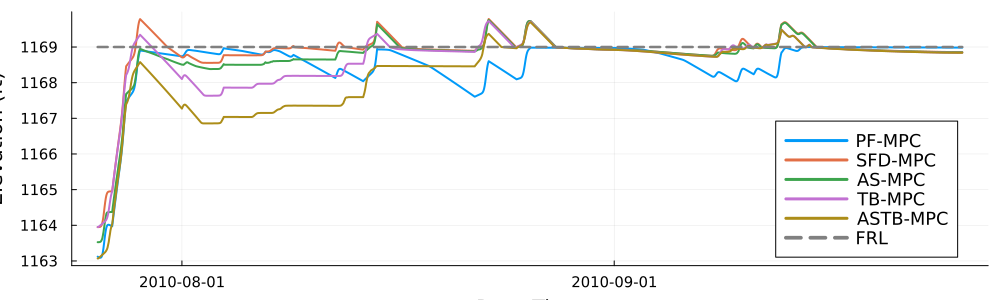

In [5]:

sm = ones(length(TB_MPC))*1169
plot(dr[600:end-120],PF_MPC[600:end-120],lw=2, label="PF-MPC", dpi=500, size=(1000,300))
plot!(tickfontsize=10,labelfontsize=14,titlefontsize=14,legendfontsize=12)
plot!(dr[600:end-120],SFD_MPC[600:end-120],lw=2, label="SFD-MPC")
plot!(dr[600:end-120],AS_MPC[600:end-120],lw=2, label="AS-MPC")
plot!(dr[600:end-120],TB_MPC[600:end-120],lw=2, label="TB-MPC")
plot!(dr[600:end-120],ASTB_MPC[600:end-120],lw=2, label="ASTB-MPC")
plot!(dr[600:end-120],sm[600:end-120],lw=2.5, linestyle=:dash, label="FRL", color="grey")
plot!(xlabel="Date Time",ylabel="Elevation (ft)")

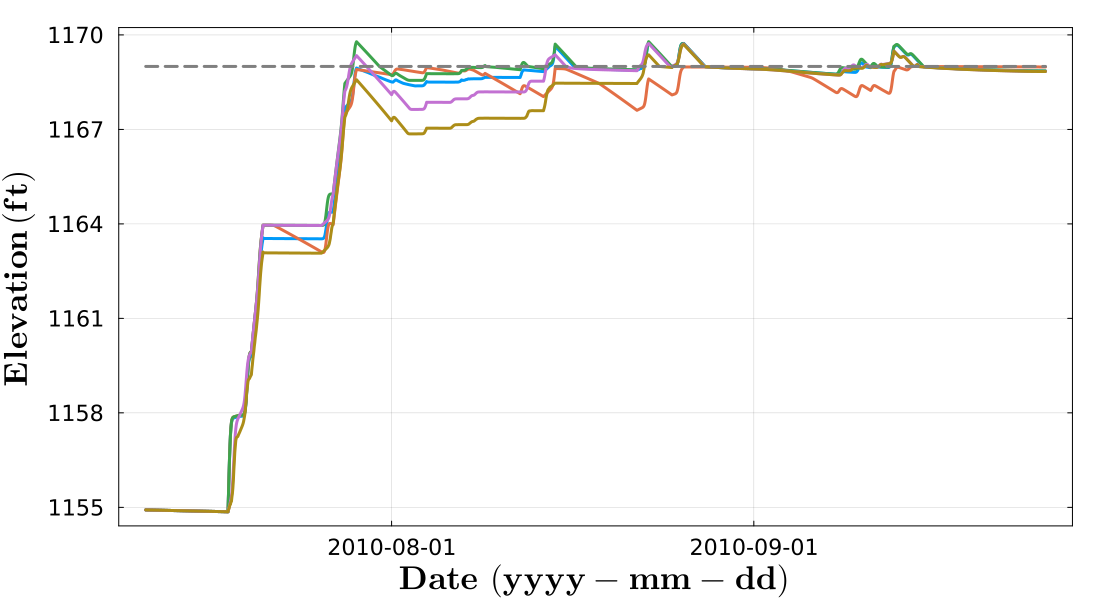

In [11]:

sm = ones(length(TB_MPC))*1169
plot(dr[240:end-120],AS_MPC[240:end-120],lw=3, label="AS-MPC", dpi=500, size=(1100,600))
plot!(titlefontsize=16,tickfontsize=15,labelfontsize=22,legendfontsize=10)

plot!(dr[240:end-120],PF_MPC[240:end-120],lw=3, label="PF-MPC")
plot!(dr[240:end-120],SFD_MPC[240:end-120],lw=3, label="SFD-MPC")
plot!(dr[240:end-120],TB_MPC[240:end-120],lw=3, label="TB-MPC")
plot!(dr[240:end-120],ASTB_MPC[240:end-120],lw=3, label="ASTB-MPC")
plot!(dr[240:end-120],sm[240:end-120],lw=3, linestyle=:dash, label="FRL", color="grey")
plot!(xlabel=L"\textbf{Date\;\;(yyyy-mm-dd)}",ylabel=L"\textbf{Elevation\;(ft)}", margin=5Plots.mm, box = :on, grid = :on, yticks=1155:3:1170, legend=false)

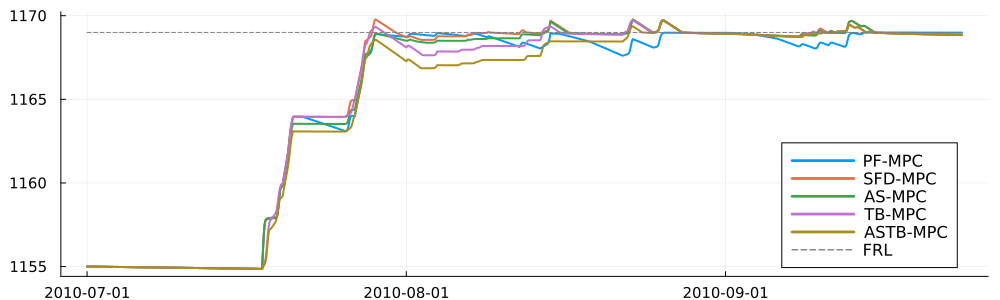

In [9]:

sm = ones(length(TB_MPC))*1169
plot(dr[1:end-168],PF_MPC[1:end-168],lw=2, label="PF-MPC", dpi=500, size=(1000,300))
plot!(tickfontsize=10,labelfontsize=14,titlefontsize=14,legendfontsize=11)
plot!(dr[1:end-168],SFD_MPC[1:end-168],lw=2, label="SFD-MPC")
plot!(dr[1:end-168],AS_MPC[1:end-168],lw=2, label="AS-MPC")
plot!(dr[1:end-168],TB_MPC[1:end-168],lw=2, label="TB-MPC")
plot!(dr[1:end-168],ASTB_MPC[1:end-168],lw=2, label="ASTB-MPC")
plot!(dr[1:end-168],sm[1:end-168],lw=1, linestyle=:dash, label="FRL", color="grey")
# plot!(xlabel="Date Time",ylabel="Elevation (ft)")

In [48]:
f_hr = 0
for i=1:length(TB_MPC)
    if TB_MPC[i]>1169
        f_hr =f_hr+1
    end
end

f_hr1 = 0
for i=1:length(TB_MPC)
    if ASTB_MPC[i]>1169
        f_hr1 =f_hr1+1
    end
end

f_hr2 = 0
for i=1:length(SFD_MPC)
    if SFD_MPC[i]>1169
        f_hr2 =f_hr2+1
    end
end

f_hr3 = 0
for i=1:length(AS_MPC)
    if AS_MPC[i]>1169
        f_hr3 =f_hr3+1
    end
end

f_hr4 = 0
for i=1:length(PF_MPC)
    if PF_MPC[i]>1169
        f_hr4 =f_hr4+1
    end
end
println(f_hr)
println(f_hr1)
println(f_hr2)
println(f_hr3)
println(f_hr4)

305
182
371
262
0


In [55]:
println(maximum(PF_MPC))
println(maximum(SFD_MPC))
println(maximum(AS_MPC))
println(maximum(TB_MPC))
println(maximum(ASTB_MPC))

1168.9987340047446
1169.7858901294776
1169.7573854550758
1169.7267939198343
1169.695444849688


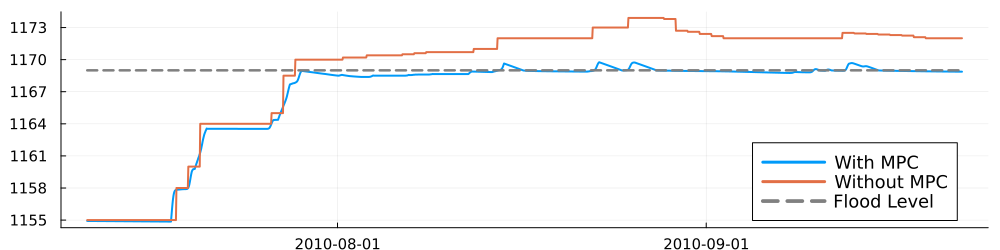

In [100]:

sm = ones(length(TB_MPC))*1169
plot(dr[240:end-120-83],AS_MPC[240:end-120-83],lw=2, label="With MPC", dpi=500, size=(1000,250), legend=:bottomright)
plot!(tickfontsize=10,labelfontsize=14,titlefontsize=14,legendfontsize=12, yticks = 1155:3:1174)

plot!(dr[240:end-120-83],actual_hr_2010[84:end],lw=2, label="Without MPC")
plot!(dr[240:end-120-83],sm[240:end-120-83],lw=2.5, linestyle=:dash, label="Flood Level", color="grey")
# plot!(xlabel="Date Time",ylabel="Elevation (ft)")